<a href="https://colab.research.google.com/github/MariiaKalinina/R/blob/main/Rosatom_new_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Libraries

In [1]:
import numpy as np
import torch
from math import *
from scipy.stats import pearsonr
from scipy import integrate
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline
from numba import njit
import numpy as np
from scipy.integrate import dblquad

import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import matplotlib.colors

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline
csfont = {'fontname':'Times New Roman'}

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Your imports
from mlxtend.plotting import plot_decision_regions

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, QuantileTransformer, FunctionTransformer, MinMaxScaler
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse

from sklearn.model_selection import GridSearchCV, PredefinedSplit

import time
import math
from sklearn.metrics import roc_curve, average_precision_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

### Import data

Import from GitHubRepo

In [ ]:
!pip install GitPython
from git import Repo
!git clone https://github.com/MariiaKalinina/R.git Ros

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.1 MB/s eta 0:00:00
Cloning into 'Ros'...
remote: Enumerating objects: 204, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 204 (delta 76), reused 42 (delta 42), pack-reused 100 (from 1)
Receiving objects: 100% (204/204), 56.93 MiB | 16.39 MiB/s, done.
Resolving deltas: 100% (116/116), done.


In [ ]:
path_to_ser = Path('/content/Ros/Data/Rosatom_dataset.xlsx')
data_initial = pd.read_excel(path_to_ser, sheet_name='Well logging', skiprows=0)
data = data_initial.copy()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Ros/Data/Rosatom_dataset.xlsx'

Import from Google Drive

In [ ]:
!pip install gdown pandas openpyxl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # Mounting at the default mount point

Mounted at /content/drive


In [ ]:
output_file = '/content/drive/My Drive/Rosatom/Rosatom_dataset.xlsx'
path_to_ser = Path(output_file)
data_initial = pd.read_excel(path_to_ser, sheet_name='Well logging', skiprows=0)
data = data_initial.copy()

From sctretch

In [ ]:
path_to_ser = Path('/content/Rosatom_dataset.xlsx')
data_initial = pd.read_excel(path_to_ser, sheet_name='Well logging', skiprows=0)
data = data_initial.copy()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Rosatom_dataset.xlsx'

### Data Processing

In [ ]:
data[:10]

Sample ID Top Depth TC initial Offset Depth_TC  Unnamed: 5  Unnamed: 6  \
0         #         m    W/(m·K)      m        m         NaN         NaN   
1       625     30.52      2.555      0   30.525         NaN         NaN   
2       625     30.52      2.556  0.001   30.526       0.001       0.001   
3       625     30.52       2.52  0.002   30.527         NaN       0.001   
4       625     30.52      2.541  0.003   30.528         NaN       0.001   
5       625     30.52      2.566  0.004   30.529         NaN       0.001   
6       625     30.52      2.527  0.005    30.53         NaN       0.001   
7       625     30.52      2.557  0.006   30.531         NaN       0.001   
8       625     30.52      2.496  0.007   30.532         NaN       0.001   
9       625     30.52      2.495  0.008   30.533         NaN       0.001   

  Unnamed: 7  Unnamed: 8 Глубина_ГК  ... Глубина_Rez    Rez Глубина_КВ  \
0    через 5         NaN          м  ...           м    NaN          м   
1        NaN         NaN        0.1  ...        12.7  35.31       0.04   
2        NaN         0.1        0.2  ...        12.8  28.72       0.14   
3        NaN         NaN        0.3  ...        12.9  28.73       0.24   
4        NaN         NaN        0.4  ...          13  28.70       0.34   
5        NaN         NaN        0.5  ...        13.1  28.68       0.44   
6        NaN       100.0        0.6  ...        13.2  28.64       0.54   
7        NaN         NaN        0.7  ...        13.3  28.71       0.64   
8        NaN         NaN        0.8  ...        13.4  28.60       0.74   
9        NaN         NaN        0.9  ...        13.5  28.59       0.84   

  КВ (c вычета долота)    N/A КВ (без вычета долота)?  Глубина_КС      КС  \
0                  NaN    NaN                     NaN           м    Ом*м   
1                  6.0 -108.0                   120.0        12.7  480.68   
2                  6.4 -107.6                   120.4        12.8  474.61   
3                  6.4 -107.6                   120.4        12.9   416.4   
4                  6.4 -107.6                   120.4          13  452.74   
5                  5.6 -108.4                   119.6        13.1  451.98   
6                  5.6 -108.4                   119.6        13.2  441.43   
7                  5.2 -108.8                   119.2        13.3  511.12   
8                  5.6 -108.4                   119.6        13.4   443.1   
9                  6.0 -108.0                   120.0        13.5  389.29   

   Глубина_Термометрия        Темометрия  
0                    м  Градуссы Цельсия  
1                 0.04              18.8  
2                 0.14              18.8  
3                 0.24              18.8  
4                 0.34             18.72  
5                 0.44             18.72  
6                 0.54             18.68  
7                 0.64              18.6  
8                 0.74             18.56  
9                 0.84             18.48  

[10 rows x 25 columns]

In [ ]:
# data.columns

In [ ]:
data.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], axis=1, inplace=True)

In [ ]:
data.rename(columns={'Глубина': 'Глубина_КС'}, inplace=True)

data.rename(columns={'ГК': 'ГК '}, inplace=True)
data.rename(columns={'Глубина_ГК': 'Глубина_ГК '}, inplace=True)

data.rename(columns={'ГГК-п ': 'ГГпК'}, inplace=True)
data.rename(columns={'Глубина_ГГК-п': 'Глубина_ГГпК'}, inplace=True)

In [ ]:
# Разделение исходных данных на две таблицы - ГИС и НТПК
well_logs = data[['Глубина_ГК ',
       'ГК ', 'Глубина_ГГпК', 'ГГпК', 'Глубина_ПС', 'ПС',
       'Глубина_КС', 'КС']]
well_logs = well_logs.drop(0)
well_logs['Глубина_ПС'] = well_logs['Глубина_ПС'] - 0.04
well_logs['ПС'] = well_logs['ПС']/100
well_logs['ГГпК'] = well_logs['ГГпК']/1000

thermal_logs = data[['Sample ID', 'Top Depth', 'TC initial', 'Offset', 'Depth_TC']]

In [ ]:
# объединение данных ГИС с единой привязкой по глубине
def filter_numeric_range(df, column_name, lower_bound, upper_bound, step):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    filtered_df = filtered_df.dropna()
    filtered_df['Глубина'] = filtered_df[column_name]
    return filtered_df.reset_index(drop=True)


# Filter and convert columns using the function
lower_bound, upper_bound, step = 12.7, 164.1, 0.1
filtered_df_1 = filter_numeric_range(well_logs[['Глубина_ГК ', 'ГК ']], 'Глубина_ГК ', lower_bound, upper_bound, step)
filtered_df_2 = filter_numeric_range(well_logs[['Глубина_ГГпК', 'ГГпК']], 'Глубина_ГГпК', lower_bound, upper_bound, step)
filtered_df_3 = filter_numeric_range(well_logs[['Глубина_ПС', 'ПС']], 'Глубина_ПС', lower_bound, upper_bound, step)
filtered_df_4 = filter_numeric_range(well_logs[['Глубина_КС', 'КС']], 'Глубина_КС', lower_bound, upper_bound, step)



# result = pd.merge(filtered_df_1, filtered_df_4 , on="Глубина", how='inner')
result = pd.merge(filtered_df_1, filtered_df_2, on="Глубина", how='inner')  # Merge filtered_df_1 and filtered_df_4

result = pd.merge(result, filtered_df_3, on="Глубина", how='inner')  # Merge filtered_df_2 with the existing result DataFrame

result = pd.merge(result, filtered_df_4, on="Глубина", how='inner')  # Merge filtered_df_3 with the existing result DataFrame
# # new_df.reset_index(drop=True, inplace=True)

columns_to_drop = [col_name for col_name in well_logs.columns if 'Глубина_' in col_name]
result.drop(columns=columns_to_drop, inplace=True)


well_logs_merged = result[['Глубина', 'ГК ', 'ГГпК', 'ПС', 'КС']]
# объединение данных ГИС с единой привязкой по глубине
well_logs_merged

Глубина    ГК       ГГпК      ПС       КС
0        12.8  17.27     37.18  3.6066   474.61
1        12.9  16.55  37.31333  3.6258    416.4
2        13.0  17.76    36.765  3.7374   452.74
3        13.3  20.77  37.88667  3.7362   511.12
4        13.4  21.58  37.17333  3.8441    443.1
...       ...    ...       ...     ...      ...
1072    163.6  22.32    32.135  4.4133  2747.14
1073    163.8   22.5    33.155  4.0983  2904.53
1074    163.9  21.41    33.695  3.9994  2989.96
1075    164.0  20.49  33.65333  3.8284  3060.61
1076    164.1   20.9  32.99333  3.6754  3224.52

[1077 rows x 5 columns]

### Литология

In [ ]:
path_to_ser = Path(output_file)
# path_to_ser = Path('/content/Rosatom_dataset.xlsx')
data_initial_lithology = pd.read_excel(path_to_ser, sheet_name='Lithology', skiprows=0)
data_lithology = data_initial_lithology.copy()

In [ ]:
lithology = data_lithology[['Кровля', 'Подошва','Литология']].dropna()

In [ ]:
lithology

Кровля  Подошва   Литология
0    10.00    19.00      Гнейсы
1    19.00    21.50    Вогезиты
2    21.50    35.20    Долериты
3    35.20    43.60      Гнейсы
4    43.60    43.95  Спессартит
5    43.95    44.75      Гнейсы
6    44.75    46.31  Спессартит
7    46.31    47.72      Гнейсы
8    47.72    54.92    Долериты
9    54.92    55.87      Гнейсы
10   55.87    56.36    Долериты
11   56.36    76.63      Гнейсы
12   76.63    81.31    Долериты
13   81.31   107.54      Гнейсы
14  107.54   122.75    Долериты
15  122.75   125.81      Гнейсы
16  125.81   130.18    Вогезиты
17  130.18   165.00      Гнейсы

In [ ]:
def lit_func(lithology, merged_data):

  corresponding_lit = pd.DataFrame(columns=['Глубина', 'Литология'])

  for index, row in merged_data.iterrows():
      common_depth = row['Глубина']
      mask = (lithology['Кровля'] <= common_depth) & (lithology['Подошва'] >= common_depth)
      filtered_lithology = lithology[mask]
      # print(common_depth, filtered_lithology )

      # if not filtered_lithology.empty:

      for _, lit_row in filtered_lithology.iterrows():
          new_row = pd.DataFrame({
              'Глубина': [common_depth],
              'Литология': [lit_row['Литология']]
          })
          corresponding_lit = pd.concat([corresponding_lit, new_row], ignore_index=True)

  return corresponding_lit

In [ ]:
result_new = pd.merge(
    lit_func(lithology, well_logs_merged),
    well_logs_merged,
    on='Глубина',
    how='inner'
)

In [ ]:
result_new

Глубина Литология    ГК       ГГпК      ПС       КС
0        12.8    Гнейсы  17.27     37.18  3.6066   474.61
1        12.9    Гнейсы  16.55  37.31333  3.6258    416.4
2        13.0    Гнейсы  17.76    36.765  3.7374   452.74
3        13.3    Гнейсы  20.77  37.88667  3.7362   511.12
4        13.4    Гнейсы  21.58  37.17333  3.8441    443.1
...       ...       ...    ...       ...     ...      ...
1076    163.6    Гнейсы  22.32    32.135  4.4133  2747.14
1077    163.8    Гнейсы   22.5    33.155  4.0983  2904.53
1078    163.9    Гнейсы  21.41    33.695  3.9994  2989.96
1079    164.0    Гнейсы  20.49  33.65333  3.8284  3060.61
1080    164.1    Гнейсы   20.9  32.99333  3.6754  3224.52

[1081 rows x 6 columns]

In [ ]:
result_new.columns

Index(['Глубина', 'Литология', 'ГК ', 'ГГпК', 'ПС', 'КС'], dtype='object')

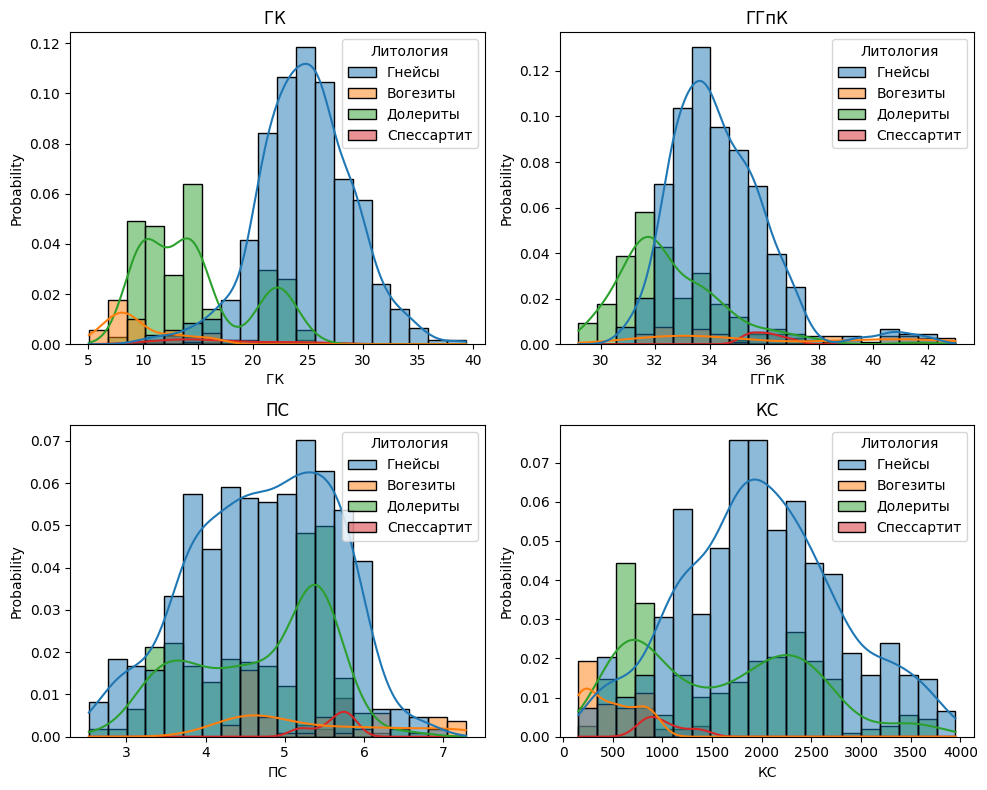

In [ ]:
# Assuming 'data' is your DataFrame and it's already defined

fig = plt.figure(figsize=(10, 8))

parameters_list = [ 'ГК ', 'ГГпК', 'ПС', 'КС']

# Calculate appropriate subplot grid size
rows = 2
cols = (len(parameters_list) + 1) // rows

for index, param in enumerate(parameters_list):
    ax = plt.subplot(rows, cols, index + 1)
    sns.histplot(data=result_new, x=param, hue='Литология', stat="probability", kde=True, bins=20)
    plt.title(f'{param}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

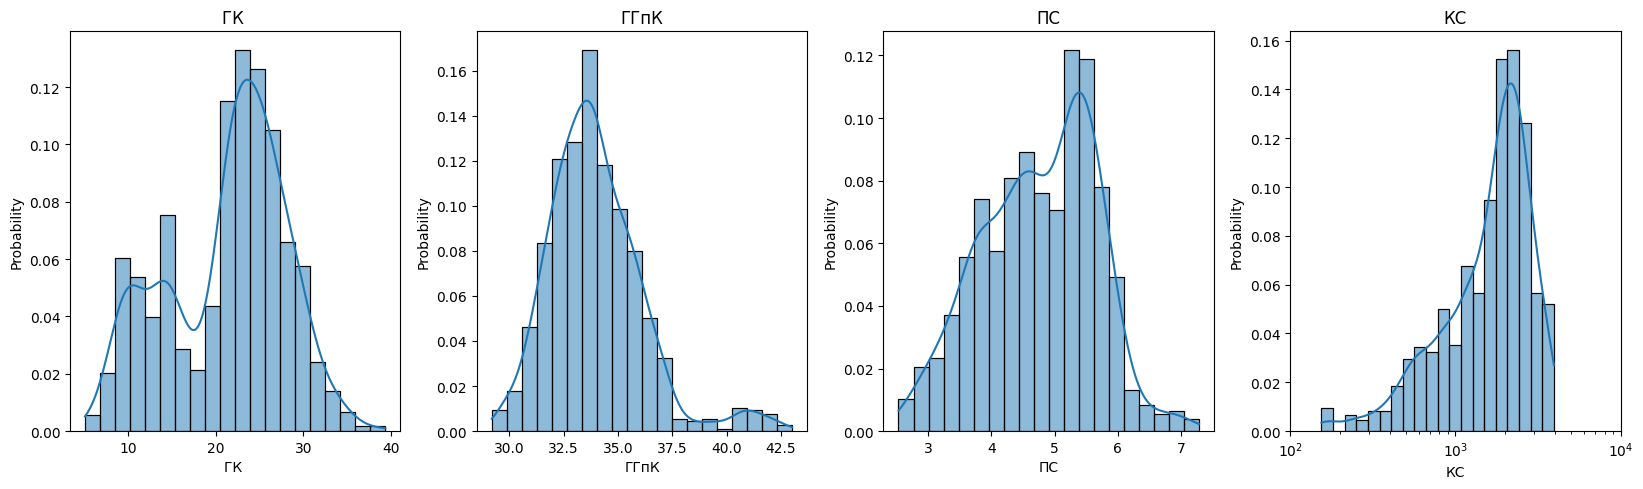

In [ ]:
fig = plt.figure(figsize=(20, 5))


# Calculate appropriate subplot grid size
parameters_list = [col_name for col_name in well_logs.columns if 'Глубина' not in col_name]
rows = 1
cols = (len(parameters_list) + 1) // rows

for index, name_log in enumerate(well_logs_merged.columns):

   if name_log != "Глубина":

    ax = plt.subplot(rows, cols, index + 1)

    if name_log  == "КС":
      sns.histplot(data=well_logs_merged, x=name_log, stat="probability", kde=True, bins=20, log_scale=(True, False))
      plt.title(f'{name_log}')
      ax.set_xlim(100, 10000)
    else:
      sns.histplot(data=well_logs_merged, x=name_log, stat="probability", kde=True, bins=20)
      plt.title(f'{name_log}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

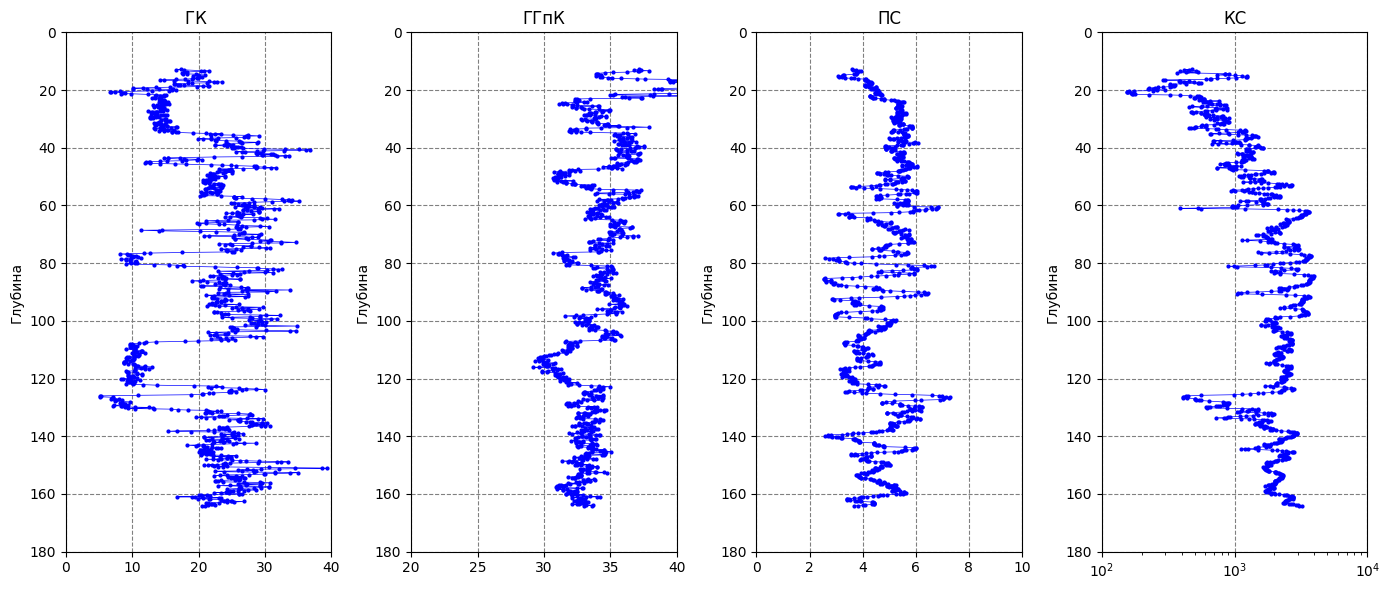

In [ ]:
def initial_plot(ax, x, y, label_name):

    ax.plot(x, y, 'b-', marker='o',
            markersize=2,
            label=label_name, lw=0.5)
    ax.invert_yaxis()
    ax.set_title(f'{label_name}')
    ax.set_xlim((min(x) // 10) * 10, (np.round(max(x), -1) // 10) * 10)

    if x.name == "КС":
        ax.set_xscale('log')
        ax.set_xlim(100, 10000)

parameters_list = [col_name for col_name in well_logs.columns if 'Глубина' not in col_name]
rows = 1
cols = (len(parameters_list)) // rows
fig, axs = plt.subplots(rows, cols, figsize=(14, 6))

for index, name_log in enumerate(well_logs_merged.columns):
    if name_log != "Глубина":
        ax = axs[index-1]
        ax.set_ylabel(f"Глубина")
        ax.set_ylim(0, 180)
        ax.grid(color='gray', linestyle='--')
        initial_plot(ax, well_logs_merged[name_log], well_logs_merged['Глубина'], name_log)

plt.tight_layout()
plt.show()

In [ ]:
unique_lithology_types = result_new['Литология'].unique()
print(unique_lithology_types)

NameError: name 'result_new' is not defined

In [ ]:
lithology_numbers = {0: {'lith':'Гнейсы', 'lith_num':0, 'hatch': '', 'color':'#bebebe'},
                 1: {'lith':'Вогезиты', 'lith_num':1, 'hatch':'', 'color':'#B89230'},
                 2: {'lith':'Долериты', 'lith_num':2, 'hatch':'', 'color':'#C0FDB6'},
                 3: {'lith':'Спессартит', 'lith_num':3, 'hatch':'', 'color':'#CCCC42'}}

In [ ]:
df_lith = pd.DataFrame.from_dict(lithology_numbers, orient='index')
df_lith.reset_index(inplace=True)
df_lith

index        lith  lith_num hatch    color
0      0      Гнейсы         0        #bebebe
1      1    Вогезиты         1        #B89230
2      2    Долериты         2        #C0FDB6
3      3  Спессартит         3        #CCCC42

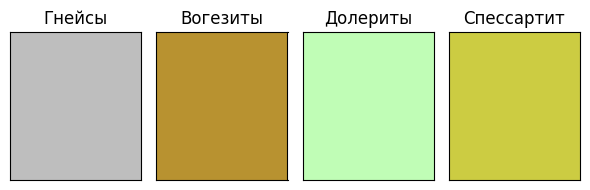

In [ ]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=4,nrows=1, sharex=True, sharey=True,
                         figsize=(6,2), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lithology_numbers.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(lithology_numbers[key]['lith']))

plt.tight_layout()

plt.show()

In [ ]:
lithology_array = []
hatch_array = []
color_array = []

work_layers_initial = result_new

for row_index, row in enumerate(work_layers_initial.itertuples()):

    lithology = work_layers_initial.at[row.Index, 'Литология']
    # layers_name = work_layers_initial.at[row.Index, 'Event_name']
    # print(lithology)

    lit_num = df_lith.loc[df_lith['lith'] == str(lithology), 'index'].iloc[0]
    lithology_array.append(lit_num)


    hatch_val = df_lith.loc[df_lith['lith'] == str(lithology), 'hatch'].iloc[0]
    hatch_array.append(hatch_val)

    color_val = df_lith.loc[df_lith['lith'] == str(lithology), 'color'].iloc[0]
    color_array.append(color_val)

work_layers_initial["Lithology"] = lithology_array
work_layers_initial["Index"] = hatch_array
work_layers_initial["Color"] = color_array
work_layers_initial # для построения графиков с литологией

Глубина Литология    ГК       ГГпК      ПС       КС  Lithology Index  \
0        12.8    Гнейсы  17.27     37.18  3.6066   474.61          0         
1        12.9    Гнейсы  16.55  37.31333  3.6258    416.4          0         
2        13.0    Гнейсы  17.76    36.765  3.7374   452.74          0         
3        13.3    Гнейсы  20.77  37.88667  3.7362   511.12          0         
4        13.4    Гнейсы  21.58  37.17333  3.8441    443.1          0         
...       ...       ...    ...       ...     ...      ...        ...   ...   
1076    163.6    Гнейсы  22.32    32.135  4.4133  2747.14          0         
1077    163.8    Гнейсы   22.5    33.155  4.0983  2904.53          0         
1078    163.9    Гнейсы  21.41    33.695  3.9994  2989.96          0         
1079    164.0    Гнейсы  20.49  33.65333  3.8284  3060.61          0         
1080    164.1    Гнейсы   20.9  32.99333  3.6754  3224.52          0         

        Color  
0     #bebebe  
1     #bebebe  
2     #bebebe  
3     #bebebe  
4     #bebebe  
...       ...  
1076  #bebebe  
1077  #bebebe  
1078  #bebebe  
1079  #bebebe  
1080  #bebebe  

[1081 rows x 9 columns]

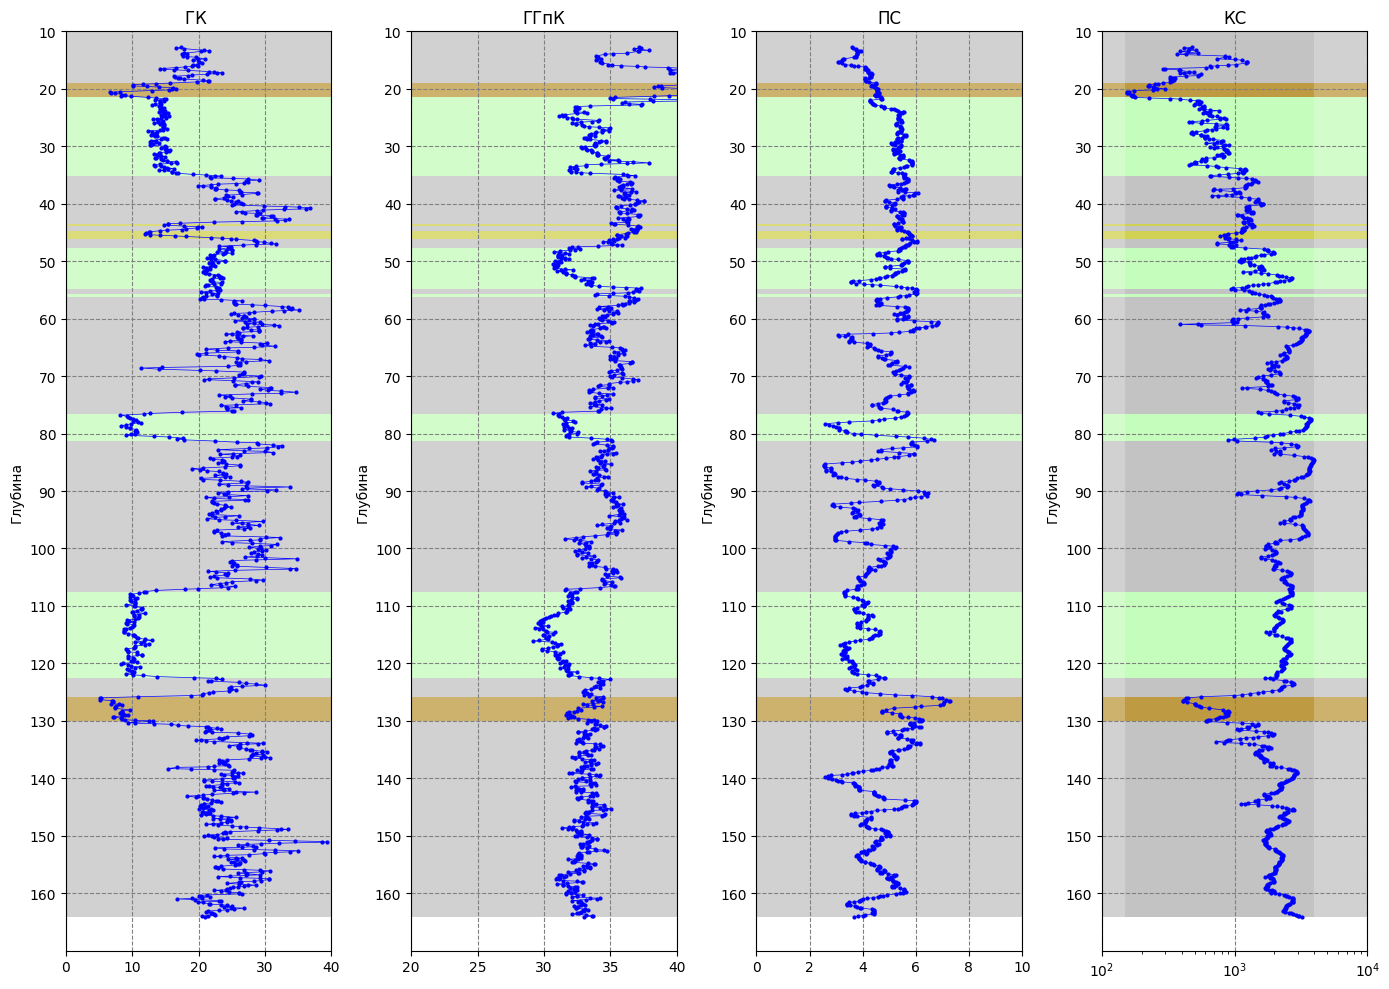

In [ ]:
def initial_plot(ax, x, y, label_name, lithology_data):
    lithology_data.index = range(1, len(lithology_data) + 1)
    ax.plot(x, y, 'b-', marker='o', markersize=2, label=label_name, lw=0.5)
    ax.invert_yaxis()
    ax.set_title(f'{label_name}')
    ax.set_xlim((min(x) // 10) * 10, (np.round(max(x), -1) // 10) * 10)

    depth_start = 0
    for lit, depth in zip(work_layers_initial.index,work_layers_initial['Глубина']):

      key = int(lit)
      color = work_layers_initial.at[lit, 'Color']
      hatch = work_layers_initial.at[lit, 'Index']


      depth_values = [depth_start, depth]
      depth_start = depth

      ax.fill_betweenx(depth_values,
                       (min(x) // 10) * 10, (np.round(max(x)+1, -1) // 10) * 10,
                       facecolor=color, hatch=hatch, alpha=0.7)

      if x.name == "КС":
        ax.fill_betweenx(depth_values, 100, 10000,
                       facecolor=color, hatch=hatch, alpha=0.7)



    if x.name == "КС":
        ax.set_xscale('log')
        ax.set_xlim(100, 10000)


parameters_list = [col_name for col_name in well_logs.columns if 'Глубина' not in col_name]
rows = 1
cols = (len(parameters_list)) // rows
fig, axs = plt.subplots(rows, cols, figsize=(14, 10))

for index, name_log in enumerate(well_logs_merged.columns):
    if name_log != "Глубина":
        ax = axs[index-1]
        ax.set_ylabel(f"Глубина")
        ax.set_ylim(10, 170)
        ax.set_yticks(np.arange(10, 170, 10))
        ax.grid(color='gray', linestyle='--')
        initial_plot(ax, well_logs_merged[name_log], well_logs_merged['Глубина'], name_log, result_new['Литология'])

plt.tight_layout()
plt.show()

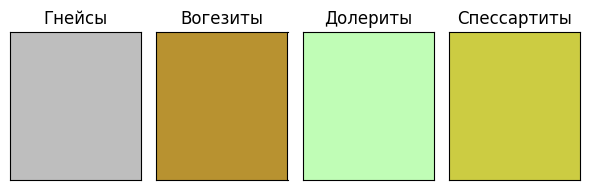

In [ ]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=4,nrows=1, sharex=True, sharey=True,
                         figsize=(6,2), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lithology_numbers.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(lithology_numbers[key]['lith']))

plt.tight_layout()

plt.show()

In [ ]:
# thermal_logs = data[['Sample ID', 'Top Depth', 'TC initial', 'Offset', 'Depth_TC']]
# path_to_ser = Path('/content/Ros/Data/Rosatom_dataset.xlsx')

path_to_ser = Path('/content/Rosatom_dataset.xlsx')

path_to_ser = Path(output_file)
data_initial = pd.read_excel(path_to_ser, sheet_name='Well logging', skiprows=0)
data = data_initial.copy()

thermal_logs = data[['Sample ID', 'Top Depth', 'TC initial', 'Offset', 'Depth_TC']]
thermal_logs = thermal_logs.drop(0)
thermal_logs.drop(['Top Depth', 'Offset'], axis=1, inplace=True)

# # # отфильтровать значения, которые не совпадают с ГИС
# lower_bound, upper_bound, step = 0, 180, 0.1
# thermal_logs = filter_numeric_range(thermal_logs[['Depth_TC', 'TC initial']], 'Depth_TC', lower_bound, upper_bound, step)

In [ ]:
thermal_logs

Sample ID Top Depth TC initial Offset Depth_TC
0             #         m    W/(m·K)      m        m
1           625     30.52      2.555      0   30.525
2           625     30.52      2.556  0.001   30.526
3           625     30.52       2.52  0.002   30.527
4           625     30.52      2.541  0.003   30.528
...         ...       ...        ...    ...      ...
97763         1     164.8      3.023  0.169  164.974
97764         1     164.8      3.151   0.17  164.975
97765         1     164.8      3.183  0.171  164.976
97766         1     164.8      2.959  0.172  164.977
97767         1     164.8      3.152  0.173  164.978

[97768 rows x 5 columns]

### добавление НТПК К ГИС

In [ ]:
# thermal_logs = data[['Sample ID', 'Top Depth', 'TC initial', 'Offset', 'Depth_TC']]
# path_to_ser = Path('/content/Ros/Data/Rosatom_dataset.xlsx')

path_to_ser = Path('/content/Rosatom_dataset.xlsx')

path_to_ser = Path(output_file)
data_initial = pd.read_excel(path_to_ser, sheet_name='Well logging', skiprows=0)
data = data_initial.copy()

thermal_logs = data[['Sample ID', 'Top Depth', 'TC initial', 'Offset', 'Depth_TC']]
thermal_logs = thermal_logs.drop(0)
thermal_logs.drop(['Top Depth', 'Offset'], axis=1, inplace=True)

# # отфильтровать значения, которые не совпадают с ГИС
lower_bound, upper_bound, step = 0, 180, 0.1
thermal_logs = filter_numeric_range(thermal_logs[['Depth_TC', 'TC initial']], 'Depth_TC', lower_bound, upper_bound, step)

In [ ]:
thermal_logs

Depth_TC TC initial  Глубина
0        30.525      2.555   30.525
1        30.526      2.556   30.526
2        30.527       2.52   30.527
3        30.528      2.541   30.528
4        30.529      2.566   30.529
...         ...        ...      ...
97762   164.974      3.023  164.974
97763   164.975      3.151  164.975
97764   164.976      3.183  164.976
97765   164.977      2.959  164.977
97766   164.978      3.152  164.978

[97767 rows x 3 columns]

In [ ]:
# make pf dataframe to merge with well-logging
df = pd.DataFrame(thermal_logs)

# Rounding the 'Глубина' column to one decimal place
df['Глубина'] = df['Глубина'].round(1)

# Group by 'Глубина' and calculate the mean of 'TC initial'
thermal_logs_scaled = df.groupby('Глубина')['TC initial'].agg('mean').reset_index()

thermal_logs_scaled
# thermal_logs_scaled .isnull().sum()

Глубина TC initial
0        30.5    2.55904
1        30.6   2.917139
2        30.7   2.822351
3        36.3   2.851311
4        36.4   2.901524
...       ...        ...
1186    164.6   2.738732
1187    164.7   2.639718
1188    164.8   2.943521
1189    164.9   2.802152
1190    165.0   2.731276

[1191 rows x 2 columns]

In [ ]:
# averagiing in the moving window
thermal_logs_moving = pd.DataFrame()
thermal_logs_moving['TC avg'] = thermal_logs['TC initial'].rolling(window=1000).mean()
thermal_logs_moving['Depth TC avg'] = thermal_logs["Depth_TC"].rolling(window=1000).mean()

thermal_logs_moving.dropna().reset_index(drop=True)

TC avg  Depth TC avg
0      2.802525     35.858153
1      2.802995     35.865221
2      2.803484     35.872289
3      2.803925     35.879357
4      2.804383     35.886425
...         ...           ...
96763  2.904575    164.421599
96764  2.905125    164.422691
96765  2.905704    164.423783
96766  2.906066    164.424875
96767  2.906745    164.425967

[96768 rows x 2 columns]

Сравнение осредение ЕМ и МОЕГО

In [ ]:
path_to_ser = Path(output_file)
data_EM_initial = pd.read_excel(path_to_ser, sheet_name='НТПК_ЕМ', skiprows=0)
data_EM = data_EM_initial.copy()

In [ ]:
data_EM  = data_EM.drop([0, 1])

In [ ]:
data_EM.columns

Index(['Depth of mindow (centre), m', 'Unnamed: 1', 'Window size=30 cm',
       'Unnamed: 3', 'Window size=40 cm', 'Unnamed: 5', 'Window size=50 cm',
       'Unnamed: 7', 'Window size=1  m', 'Unnamed: 9', 'TC original'],
      dtype='object')

In [ ]:
data_EM

Depth of mindow (centre), m Unnamed: 1 Window size=30 cm Unnamed: 3  \
2                          30.525     30.295             2.727       50.2   
3                          30.526     30.296            2.7287       50.5   
4                          30.527     30.297            2.7304       50.5   
5                          30.528     30.298            2.7321       51.2   
6                          30.529     30.299            2.7339       51.5   
...                           ...        ...               ...        ...   
97764                     164.974    164.744            2.8388       51.2   
97765                     164.975    164.745            2.8384       51.2   
97766                     164.976    164.746            2.8379       50.5   
97767                     164.977    164.747            2.8375       50.2   
97768                     164.978    164.748             2.837       49.8   

      Window size=40 cm Unnamed: 5 Window size=50 cm Unnamed: 7  \
2              2.775364       40.6            2.7947       32.5   
3              2.775932       40.6             2.795       32.5   
4              2.776512       40.6            2.7953       32.5   
5              2.777108       40.6            2.7956       32.5   
6              2.777719       40.6            2.7959       32.5   
...                 ...        ...               ...        ...   
97764          2.849762       43.9             2.848       45.1   
97765          2.849794       43.9             2.848       45.1   
97766           2.84979       43.4             2.848       44.9   
97767          2.849746       43.4             2.848       44.7   
97768           2.84969       43.4             2.848       44.3   

      Window size=1  m Unnamed: 9 TC original  
2               2.8221       16.3       2.555  
3               2.8222       16.3       2.556  
4               2.8223       16.3        2.52  
5               2.8223       16.3       2.541  
6               2.8224       16.3       2.566  
...                ...        ...         ...  
97764           2.8068       43.5       3.023  
97765           2.8068       43.5       3.151  
97766           2.8068       43.4       3.183  
97767           2.8068       43.3       2.959  
97768           2.8068       43.1       3.152  

[97767 rows x 11 columns]

In [ ]:
data_EM['Window size=1  m']

2        2.8221
3        2.8222
4        2.8223
5        2.8223
6        2.8224
          ...  
97764    2.8068
97765    2.8068
97766    2.8068
97767    2.8068
97768    2.8068
Name: Window size=1  m, Length: 97767, dtype: object

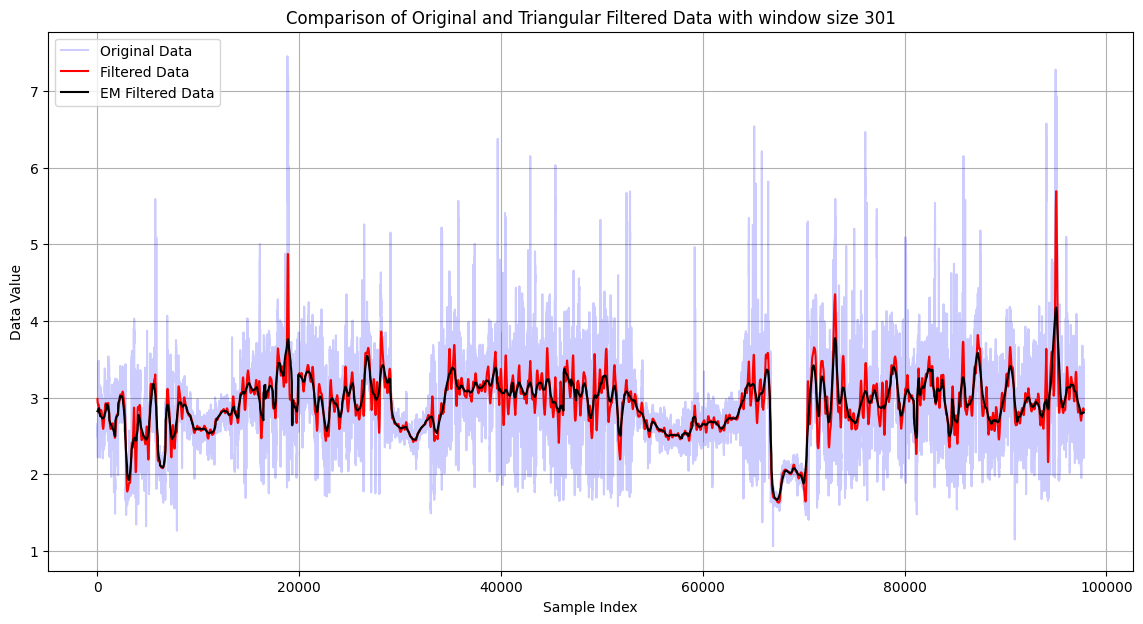

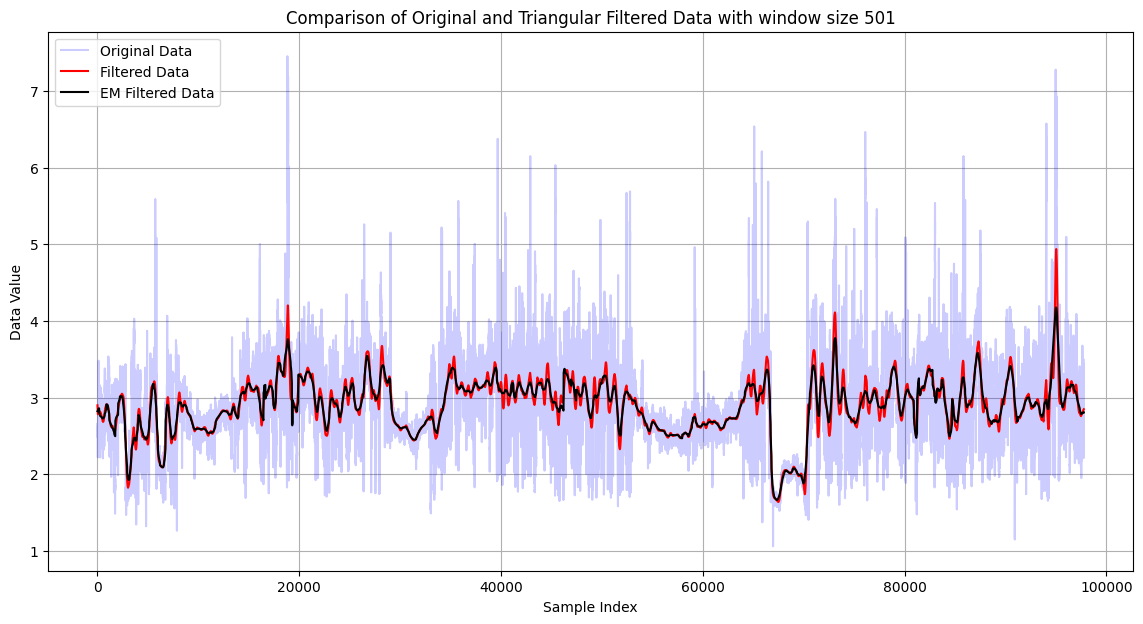

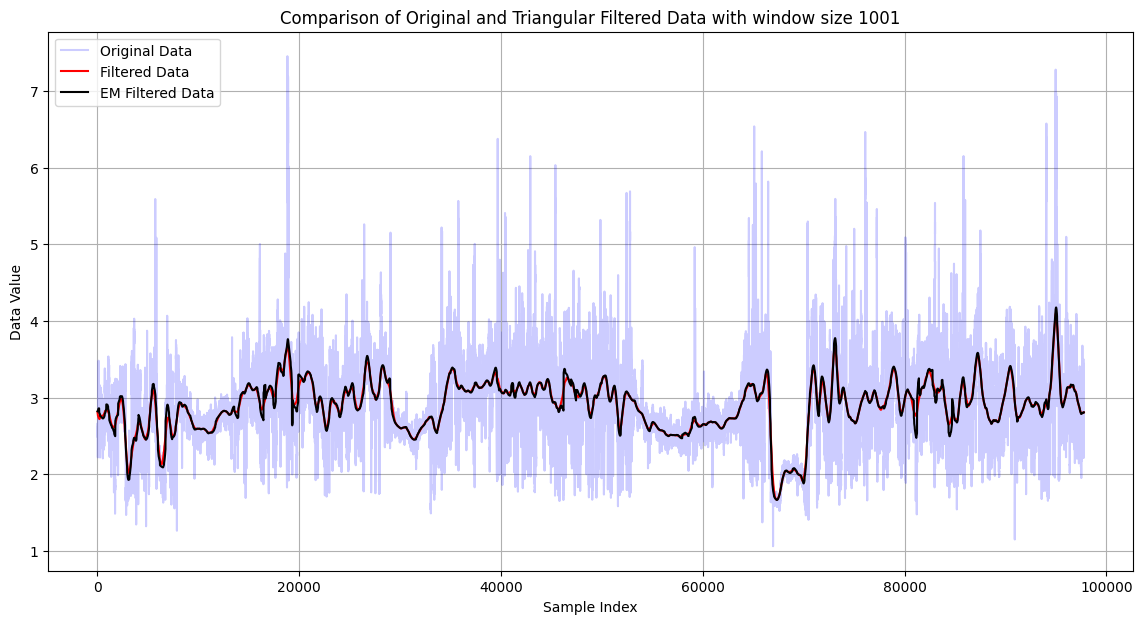

In [ ]:
def triangular_filter(data, window_size):
    """Applies a non-recursive triangular filter to the data"""
    if window_size % 2 == 0:
        raise ValueError("Window size must be odd.")

    half_window = window_size // 2
    filtered_data = np.zeros_like(data)

    for i in range(len(data)):
        start_index = max(0, i - half_window)
        end_index = min(len(data), i + half_window + 1)

        actual_window_length = end_index - start_index
        weights = np.concatenate((np.arange(1, half_window + 2),
                                  np.arange(half_window, 0, -1)))
        weights = weights[:actual_window_length]  # Adjust weights size to match the data segment
        weights = weights / weights.sum()  # Normalize weights

        filtered_data[i] = np.sum(data[start_index:end_index] * weights)

    return filtered_data


data = thermal_logs['TC initial']

window_size = [301, 501, 1001]

for ws in window_size:

  filtered_data = triangular_filter(data, ws)

  # Plotting the results
  plt.figure(figsize=(14, 7))
  plt.plot(data, label='Original Data', color='blue', alpha=0.2)
  plt.plot(filtered_data, label='Filtered Data', color='red')
  plt.plot(data_EM['Window size=1  m'], label='EM Filtered Data', color='black')

  plt.title(f'Comparison of Original and Triangular Filtered Data with window size {ws}')
  plt.xlabel('Sample Index')
  plt.ylabel('Data Value')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
thermal_logs["Depth_TC"].shape

(97767,)

In [ ]:
filtered_tc_triangle = triangular_filter(data, 1001)

In [ ]:
filtered_tc_triangle.shape

(97767,)

In [ ]:
data_tc_filtered = pd.DataFrame(thermal_logs["Depth_TC"])
data_tc_filtered['TC filt tri'] = filtered_tc_triangle
data_tc_filtered

Depth_TC TC filt tri
0        30.525    2.809183
1        30.526    2.808834
2        30.527    2.808649
3        30.528    2.808604
4        30.529    2.808745
...         ...         ...
97762   164.974    2.806873
97763   164.975    2.806968
97764   164.976    2.807056
97765   164.977    2.807137
97766   164.978    2.807213

[97767 rows x 2 columns]

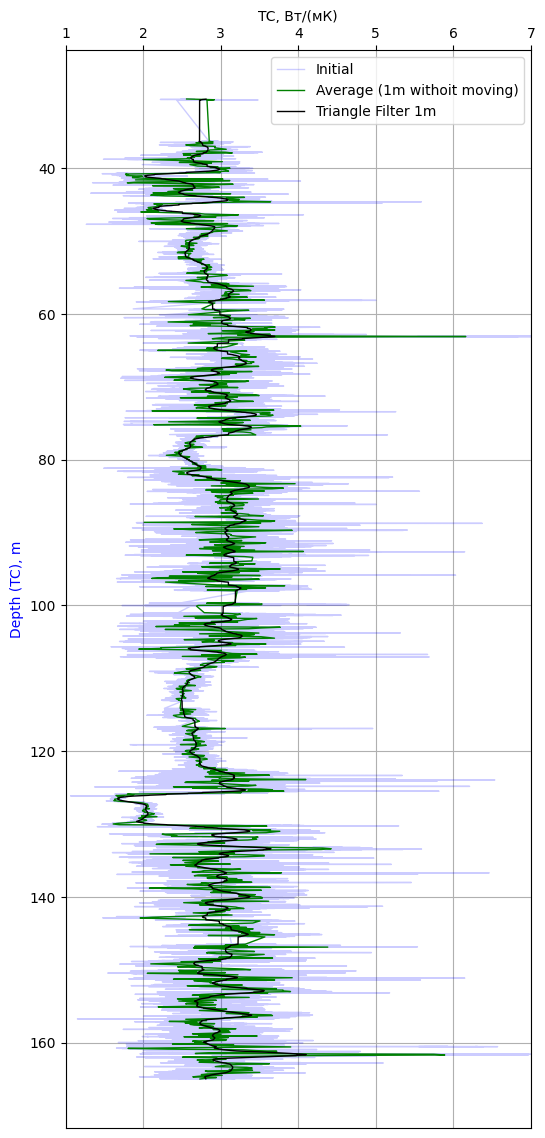

In [ ]:
# averagiing in the moving window
thermal_logs['TC avg'] = thermal_logs['TC initial'].rolling(window=1000).mean()
thermal_logs['Depth TC avg'] = thermal_logs["Depth_TC"].rolling(window=1000).mean()

# thermal_logs_unique = thermal_logs.drop_duplicates(subset=['Depth TC avg'])
# thermal_logs_unique

fig, ax1 = plt.subplots(figsize=(6, 14))

# Inital TC data
x, y = thermal_logs['TC initial'], thermal_logs["Depth_TC"]
ax1.plot(x, y, 'b-', label='Initial', lw=1, alpha=0.2)

# Averaging without moving
x, y = thermal_logs_scaled ['TC initial'], thermal_logs_scaled ['Глубина'] # averaging without moving
ax1.plot(x, y, 'g-', label='Average (1m withoit moving)', lw=1)

# Averaging in moving
x, y = data_tc_filtered['TC filt tri'], data_tc_filtered['Depth_TC']
ax1.plot(x, y, 'k-', label='Triangle Filter 1m', lw=1)

ax1.set_ylabel('Depth (TC), m', color='b')

ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')
ax1.legend()

plt.xlim(1 ,7)
plt.grid()
plt.show()

### Новая обработка

К данным НТПК (сглаженного с использование треугольного фильтра) привязываются интерполированные данные ГИС

In [ ]:
# work_layers_initial_new['Глубина_new'] =np.round(work_layers_initial_new['Глубина'], 3)
# work_layers_initial_new['Глубина_new']

# # Создаем диапазон значений 'Ист глубина'
# source_depths = np.arange(36.525, 164.978, 0.1)  # от 12 до 100 с шагом 10
# source_depths = np.round(source_depths, 3)

# print(len(source_depths))

# # Use isin() with a list-like object
# filtered = work_layers_initial_new[work_layers_initial_new['Глубина_new'].isin(source_depths)]

# # Display the filtered DataFrame
# print(filtered)

In [ ]:
# отфильтровать значения, которые не совпадают с ГИС (интревал 36,525 -164,978)
lower_bound, upper_bound, step = 36.525, 164.978, 0.001
new_data_filtered = filter_numeric_range(data_tc_filtered, 'Depth_TC',
                                    lower_bound, upper_bound, step)
new_data_filtered

Depth_TC TC filt tri  Глубина
0        36.525     2.75276   36.525
1        36.526    2.752708   36.526
2        36.527    2.752665   36.527
3        36.528    2.752687   36.528
4        36.529    2.752713   36.529
...         ...         ...      ...
97442   164.974    2.806873  164.974
97443   164.975    2.806968  164.975
97444   164.976    2.807056  164.976
97445   164.977    2.807137  164.977
97446   164.978    2.807213  164.978

[97447 rows x 3 columns]

Данным НТПК интревал 30.525, 36.525 (не используется при обучении)

In [ ]:
# отфильтровать значения, которые не совпадают с ГИС (интревал 30.525, 36.525) -  не используется при обучении (только для проверки)
lower_bound, upper_bound, step = 30.525, 36.525, 0.001
new_data_filtered_30 = filter_numeric_range(data_tc_filtered, 'Depth_TC',
                                    lower_bound, upper_bound, step)
new_data_filtered_30

Depth_TC TC filt tri  Глубина
0      30.525    2.809183   30.525
1      30.526    2.808834   30.526
2      30.527    2.808649   30.527
3      30.528    2.808604   30.528
4      30.529    2.808745   30.529
..        ...         ...      ...
315    36.520    2.752935   36.520
316    36.521    2.752978   36.521
317    36.522    2.752965   36.522
318    36.523    2.752936   36.523
319    36.524    2.752854   36.524

[320 rows x 3 columns]

Интерполяция НТПК и ГИС

In [ ]:
from scipy.interpolate import interp1d

def interpolation(x, y, new_dataframe, new_depth):

  interp_function = interp1d(x, y,
                            kind='linear',
                            bounds_error=False,
                             fill_value="extrapolate")

  # Interpolate the data to new depth
  interpolated_values = interp_function(new_depths)

  # Create a new DataFrame with the interpolated results
  new_dataframe[x.name] = new_depths
  new_dataframe[y.name] = interpolated_values

  return new_dataframe

К данным НТПК интревал 30.525 - 36.525 (не используется при обучении)

In [ ]:
interpolated_df_30 = pd.DataFrame()
new_dataframe = interpolated_df_30

new_depths = np.arange(30.525, 36.525, 0.001)

interpolation(well_logs_merged['Глубина'], well_logs_merged['ГК '], new_dataframe, new_depths ) # ГК
interpolation(well_logs_merged['Глубина'], well_logs_merged['ГГпК'], new_dataframe, new_depths ) # ГГпК
interpolation(well_logs_merged['Глубина'], well_logs_merged['ПС'], new_dataframe, new_depths ) # ПС
interpolation(well_logs_merged['Глубина'], well_logs_merged['КС'], new_dataframe, new_depths ) # КС
interpolation(new_data_filtered['Depth_TC'], new_data_filtered['TC filt tri'], new_dataframe, new_depths) # НТКП

interpolated_df_30.drop(['Depth_TC'], axis=1, inplace=True)
interpolated_df_30.rename(columns={'TC filt tri': 'TC'}, inplace=True)
interpolated_df_30

Глубина      ГК        ГГпК        ПС         КС        TC
0      30.525  14.9750  33.271247  5.150000   849.8000  3.068912
1      30.526  14.9788  33.274364  5.150000   850.1900  3.068859
2      30.527  14.9826  33.277481  5.150000   850.5800  3.068806
3      30.528  14.9864  33.280598  5.150000   850.9700  3.068754
4      30.529  14.9902  33.283714  5.150000   851.3600  3.068701
...       ...      ...        ...       ...        ...       ...
5995   36.520  25.0180  36.514666  5.408700  1313.5180  2.753024
5996   36.521  24.9909  36.511399  5.407205  1313.0149  2.752971
5997   36.522  24.9638  36.508133  5.405710  1312.5118  2.752918
5998   36.523  24.9367  36.504866  5.404215  1312.0087  2.752866
5999   36.524  24.9096  36.501599  5.402720  1311.5056  2.752813

[6000 rows x 6 columns]

Данным НТПК интревал 36,525 -164,978 (нобучение)

In [ ]:
interpolated_df = pd.DataFrame()
new_dataframe = interpolated_df

new_depths = np.arange(36.525, 164.979, 0.001)

interpolation(well_logs_merged['Глубина'], well_logs_merged['ГК '], new_dataframe, new_depths) # ГК
interpolation(well_logs_merged['Глубина'], well_logs_merged['ГГпК'], new_dataframe, new_depths) # ГГпК
interpolation(well_logs_merged['Глубина'], well_logs_merged['ПС'], new_dataframe, new_depths) # ПС
interpolation(well_logs_merged['Глубина'], well_logs_merged['КС'], new_dataframe, new_depths) # КС
interpolation(new_data_filtered['Depth_TC'], new_data_filtered['TC filt tri'], new_dataframe, new_depths) # НТКП

interpolated_df.drop(['Depth_TC'], axis=1, inplace=True)
interpolated_df.rename(columns={'TC filt tri': 'TC'}, inplace=True)
interpolated_df

Глубина      ГК        ГГпК        ПС         КС        TC
0        36.525  24.8825  36.498333  5.401225  1311.0025  2.752760
1        36.526  24.8554  36.495066  5.399730  1310.4994  2.752708
2        36.527  24.8283  36.491799  5.398235  1309.9963  2.752665
3        36.528  24.8012  36.488532  5.396740  1309.4932  2.752687
4        36.529  24.7741  36.485266  5.395245  1308.9901  2.752713
...         ...      ...        ...       ...        ...       ...
128449  164.974  24.4834  27.224930  2.338180  4657.0934  2.806873
128450  164.975  24.4875  27.218330  2.336650  4658.7325  2.806968
128451  164.976  24.4916  27.211730  2.335120  4660.3716  2.807056
128452  164.977  24.4957  27.205130  2.333590  4662.0107  2.807137
128453  164.978  24.4998  27.198530  2.332060  4663.6498  2.807213

[128454 rows x 6 columns]

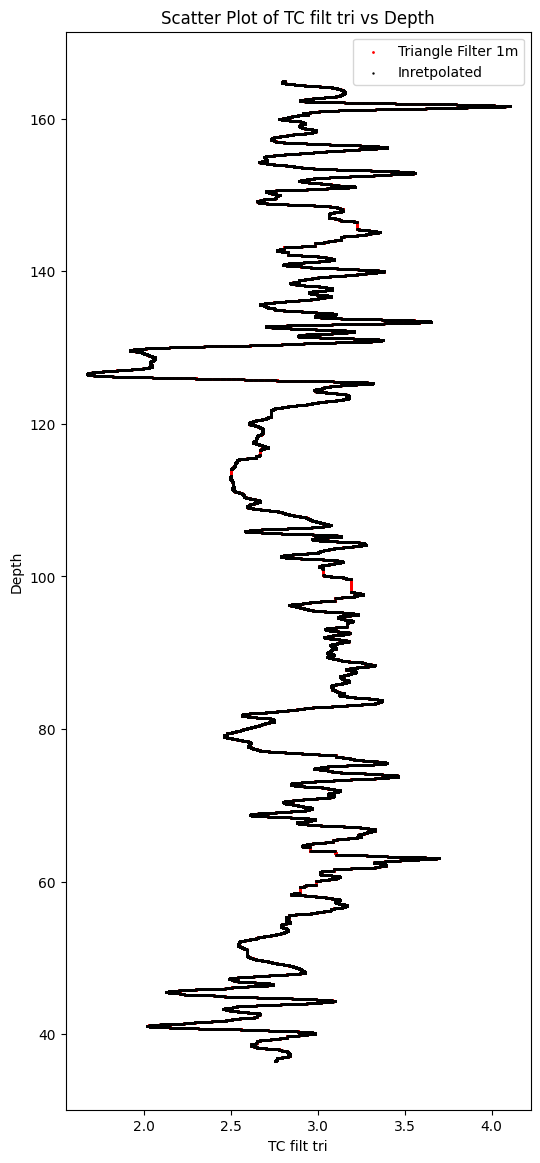

In [ ]:
plt.figure(figsize=(6, 14))

x, y = interpolated_df['TC'], interpolated_df['Глубина']
plt.scatter(x, y, label='Triangle Filter 1m', marker='o', s=1, color='red')  # Use 's' instead of 'markersize'

x, y = new_data_filtered['TC filt tri'], new_data_filtered['Depth_TC']
plt.scatter(x, y, label='Inretpolated', marker='o', s=0.5, color='black')  # Use 's' instead of 'markersize'

# Adding labels and legend
plt.xlabel('TC filt tri')
plt.ylabel('Depth')
plt.title('Scatter Plot of TC filt tri vs Depth')
plt.legend()

# Show the plot
plt.show()

Добавление литологии

In [ ]:
# path_to_ser = Path('/content/Ros/Data/Rosatom_dataset.xlsx')
# path_to_ser = Path('/content/Rosatom_dataset.xlsx')

path_to_ser = Path(output_file)
data_initial_lithology = pd.read_excel(path_to_ser, sheet_name='Lithology', skiprows=0)
data_lithology = data_initial_lithology.copy()

In [ ]:
lithology = data_lithology[['Кровля', 'Подошва','Литология']].dropna()

In [ ]:
interpolated_df_lith = pd.merge(
    lit_func(lithology, interpolated_df),
    interpolated_df,
    on='Глубина',
    how='inner'
)

In [ ]:
interpolated_df_lith

Глубина Литология      ГК        ГГпК        ПС         КС        TC
0        36.525    Гнейсы  24.8825  36.498333  5.401225  1311.0025  2.752760
1        36.526    Гнейсы  24.8554  36.495066  5.399730  1310.4994  2.752708
2        36.527    Гнейсы  24.8283  36.491799  5.398235  1309.9963  2.752665
3        36.528    Гнейсы  24.8012  36.488532  5.396740  1309.4932  2.752687
4        36.529    Гнейсы  24.7741  36.485266  5.395245  1308.9901  2.752713
...         ...       ...      ...        ...       ...        ...       ...
128449  164.974    Гнейсы  24.4834  27.224930  2.338180  4657.0934  2.806873
128450  164.975    Гнейсы  24.4875  27.218330  2.336650  4658.7325  2.806968
128451  164.976    Гнейсы  24.4916  27.211730  2.335120  4660.3716  2.807056
128452  164.977    Гнейсы  24.4957  27.205130  2.333590  4662.0107  2.807137
128453  164.978    Гнейсы  24.4998  27.198530  2.332060  4663.6498  2.807213

[128454 rows x 7 columns]

In [ ]:
interpolated_df_lith.to_excel('output.xlsx', index=False)

In [ ]:
# добавление литологии и цветов

lithology_array = []
hatch_array = []
color_array = []

work_layers_initial_new = interpolated_df_lith

# path_to_ser = Path('/content/output_data.xlsx')
# df = pd.read_excel(path_to_ser, skiprows=0)
# work_layers_initial_new = df.copy()

for row_index, row in enumerate(work_layers_initial_new.itertuples()):

    lithology = work_layers_initial_new.at[row.Index, 'Литология']

    lit_num = df_lith.loc[df_lith['lith'] == str(lithology), 'index'].iloc[0]
    lithology_array.append(lit_num)

    hatch_val = df_lith.loc[df_lith['lith'] == str(lithology), 'hatch'].iloc[0]
    hatch_array.append(hatch_val)

    color_val = df_lith.loc[df_lith['lith'] == str(lithology), 'color'].iloc[0]
    color_array.append(color_val)

work_layers_initial_new["Lithology"] = lithology_array
work_layers_initial_new["Index"] = hatch_array
work_layers_initial_new["Color"] = color_array
work_layers_initial_new # для построения графиков с литологией

Глубина Литология      ГК        ГГпК        ПС         КС        TC  \
0        36.525    Гнейсы  24.8825  36.498333  5.401225  1311.0025  2.752760   
1        36.526    Гнейсы  24.8554  36.495066  5.399730  1310.4994  2.752708   
2        36.527    Гнейсы  24.8283  36.491799  5.398235  1309.9963  2.752665   
3        36.528    Гнейсы  24.8012  36.488532  5.396740  1309.4932  2.752687   
4        36.529    Гнейсы  24.7741  36.485266  5.395245  1308.9901  2.752713   
...         ...       ...      ...        ...       ...        ...       ...   
128449  164.974    Гнейсы  24.4834  27.224930  2.338180  4657.0934  2.806873   
128450  164.975    Гнейсы  24.4875  27.218330  2.336650  4658.7325  2.806968   
128451  164.976    Гнейсы  24.4916  27.211730  2.335120  4660.3716  2.807056   
128452  164.977    Гнейсы  24.4957  27.205130  2.333590  4662.0107  2.807137   
128453  164.978    Гнейсы  24.4998  27.198530  2.332060  4663.6498  2.807213   

        Lithology Index    Color  
0               0        #bebebe  
1               0        #bebebe  
2               0        #bebebe  
3               0        #bebebe  
4               0        #bebebe  
...           ...   ...      ...  
128449          0        #bebebe  
128450          0        #bebebe  
128451          0        #bebebe  
128452          0        #bebebe  
128453          0        #bebebe  

[128454 rows x 10 columns]

In [ ]:
work_layers_initial_new.to_excel('output_data_lith.xlsx', index=False)

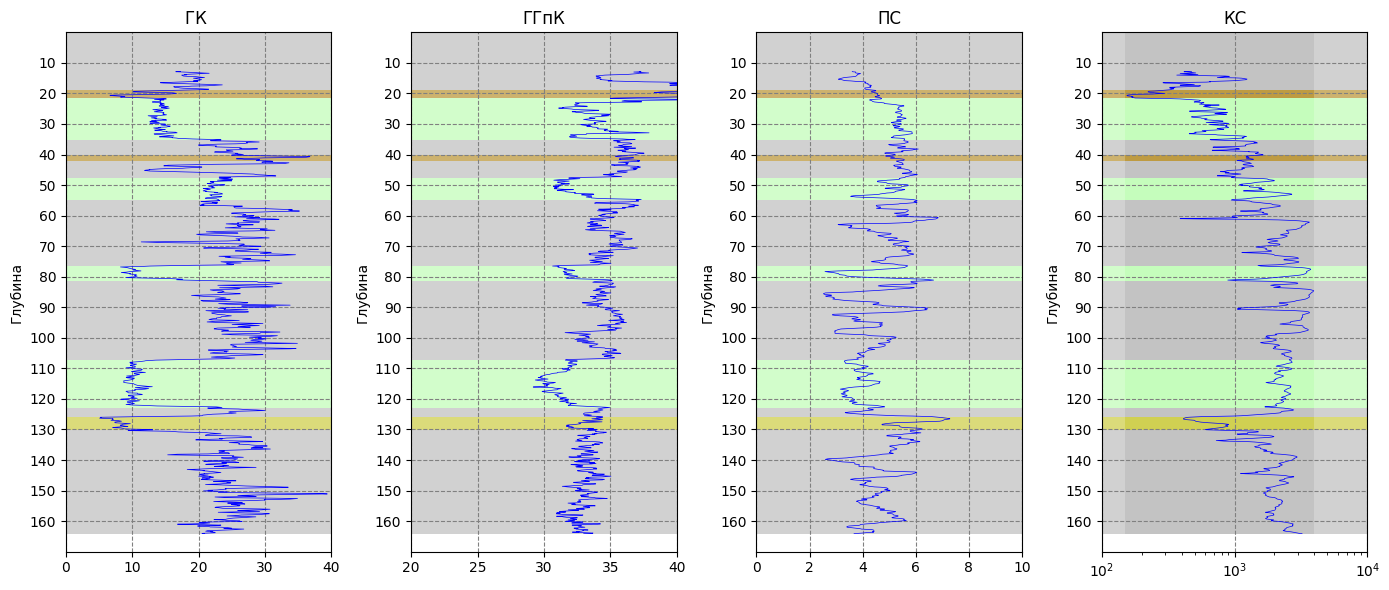

In [ ]:
data = work_layers_initial #0.1m
# data = work_layers_initial_new #0.001m

def initial_plot(ax, x, y, label_name, lithology_data):
    lithology_data.index = range(1, len(lithology_data) + 1)
    ax.plot(x, y, 'b-', markersize=2, label=label_name, lw=0.5)
    ax.invert_yaxis()
    ax.set_title(f'{label_name}')
    ax.set_xlim((min(x) // 10) * 10, (np.round(max(x), -1) // 10) * 10)

    depth_start = 0
    for lit, depth in zip(data.index, data['Глубина']):
        key = int(lit)
        color = data.at[lit, 'Color']
        hatch = data.at[lit, 'Index']

        depth_values = [depth_start, depth]
        depth_start = depth

        ax.fill_betweenx(depth_values,
                         (min(x) // 10) * 10, (np.round(max(x), -1) // 10) * 10,
                         facecolor=color, hatch=hatch, alpha=0.7)

        if x.name == "КС":
            ax.fill_betweenx(depth_values, 100, 10000,
                             facecolor=color, hatch=hatch, alpha=0.7)

    if x.name == "КС":
        ax.set_xscale('log')
        ax.set_xlim(100, 10000)

    if x.name == "НТПК":
        ax.set_xlim(1, 6)

parameters_list = [col_name for col_name in data.keys() if 'Глубина' not in col_name
                   and 'Литология' not in col_name
                   and 'Lithology' not in col_name
                   and 'Index' not in col_name
                   and 'Color' not in col_name]


rows = 1
cols = len(parameters_list)
fig, axs = plt.subplots(rows, cols, figsize=(14, 6))

if cols == 1:
    axs = [axs]  # Make axs iterable if there is only one subplot

for index, name_log in enumerate(parameters_list):
    ax = axs[index]
    ax.set_ylabel("Глубина")
    ax.set_ylim(0, 170)
    ax.set_yticks(np.arange(10, 165, 10))
    ax.grid(color='gray', linestyle='--')
    initial_plot(ax, data[name_log], data['Глубина'], name_log, result_new['Литология'])

plt.tight_layout()
plt.show()

Старая обработка: привязка НТПК к ГИС (0.1м)

In [ ]:
# объединение данных ГИС и НТПК с единой привязкой по глубине (для обучения)

# Filter and convert columns using the function
lower_bound, upper_bound, step = 36.3, 164.1, 0.1
filtered_df_1 = filter_numeric_range(work_layers_initial[['Глубина', 'ГК ', 'ГГпК', 'ПС', 'КС','Литология', 'Lithology', 'Index',
       'Color']], 'Глубина', lower_bound, upper_bound, step)

filtered_df_2 = filter_numeric_range(thermal_logs_scaled [['Глубина', 'TC initial']], 'Глубина', lower_bound, upper_bound, step)


result = pd.merge(filtered_df_1, filtered_df_2, on="Глубина", how='inner')  # Merge filtered_df_1 and filtered_df_4
result.rename(columns={'TC initial': 'НТПК'}, inplace=True)

data_set = result[['Глубина', 'ГК ', 'ГГпК', 'ПС', 'КС', 'Литология', 'НТПК', 'Lithology', 'Index',
       'Color']]
data_set

Глубина    ГК       ГГпК      ПС       КС Литология      НТПК  Lithology  \
0       36.4  26.85     36.62  5.5632  1361.23    Гнейсы  2.901524          0   
1       36.5  25.56     36.58  5.4386  1323.58    Гнейсы  2.679558          0   
2       36.6  22.85  36.25333  5.2891  1273.27    Гнейсы   2.89797          0   
3       36.7   21.9  35.97333  4.9800  1219.27    Гнейсы  2.699128          0   
4       36.9  19.97  35.93333  5.0213  1215.51    Гнейсы  2.608202          0   
..       ...    ...       ...     ...      ...       ...       ...        ...   
824    163.6  22.32    32.135  4.4133  2747.14    Гнейсы  3.297085          0   
825    163.8   22.5    33.155  4.0983  2904.53    Гнейсы  3.409836          0   
826    163.9  21.41    33.695  3.9994  2989.96    Гнейсы   2.80076          0   
827    164.0  20.49  33.65333  3.8284  3060.61    Гнейсы  2.828663          0   
828    164.1   20.9  32.99333  3.6754  3224.52    Гнейсы  3.504393          0   

    Index    Color  
0          #bebebe  
1          #bebebe  
2          #bebebe  
3          #bebebe  
4          #bebebe  
..    ...      ...  
824        #bebebe  
825        #bebebe  
826        #bebebe  
827        #bebebe  
828        #bebebe  

[829 rows x 10 columns]

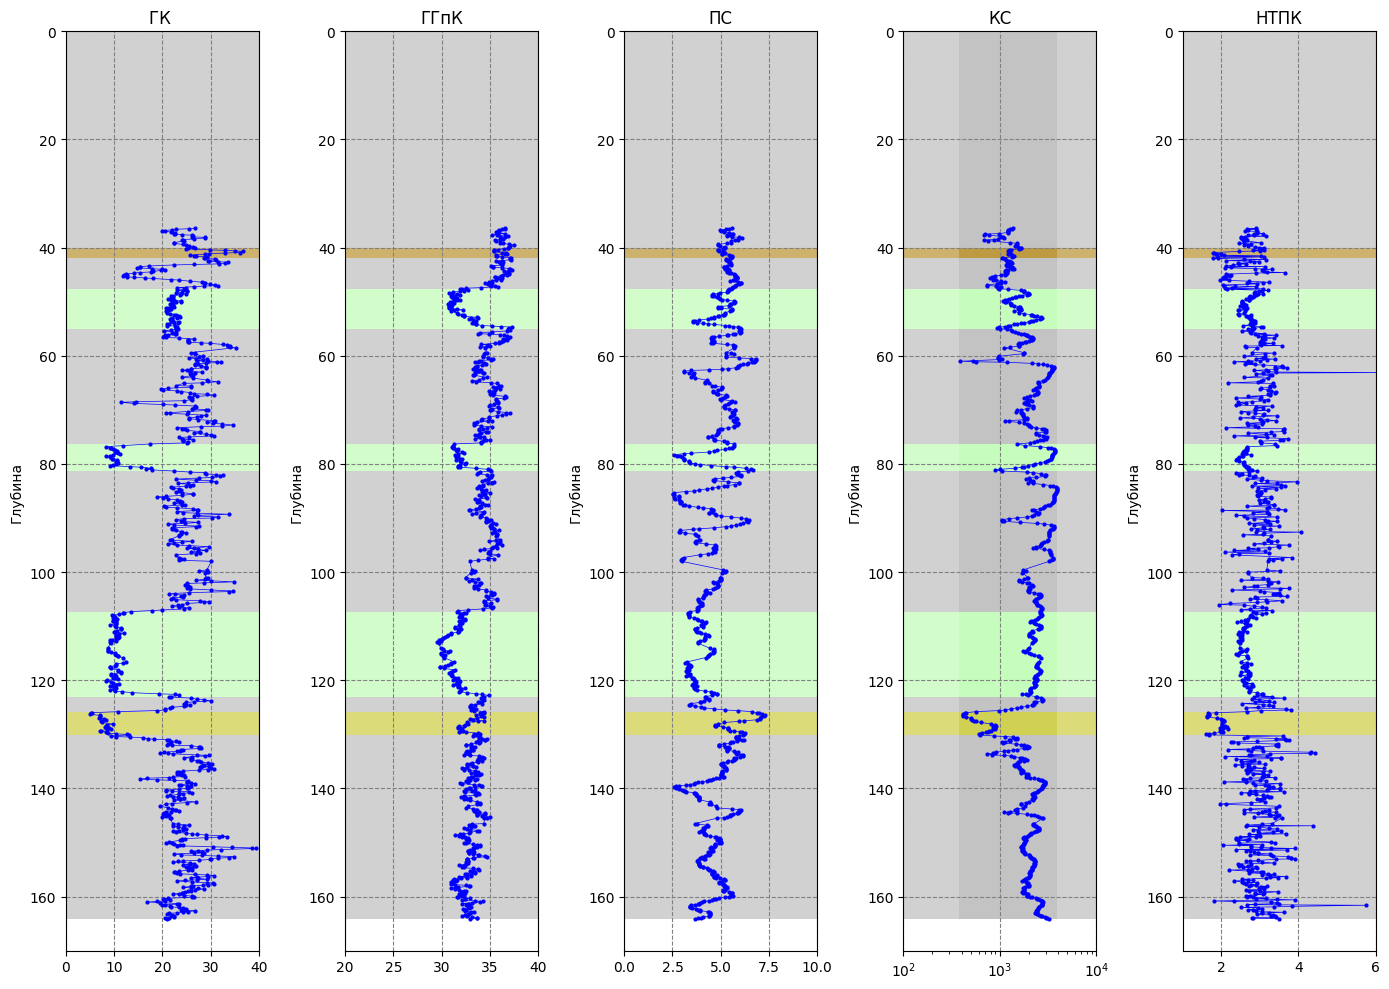

In [ ]:
data = data_set

def initial_plot(ax, x, y, label_name, lithology_data):
    lithology_data.index = range(1, len(lithology_data) + 1)
    ax.plot(x, y, 'b-', marker='o', markersize=2, label=label_name, lw=0.5)
    ax.invert_yaxis()
    ax.set_title(f'{label_name}')
    ax.set_xlim((min(x) // 10) * 10, (np.round(max(x), -1) // 10) * 10)

    depth_start = 0
    for lit, depth in zip(data.index, data['Глубина']):
        key = int(lit)
        color = data.at[lit, 'Color']
        hatch = data.at[lit, 'Index']

        depth_values = [depth_start, depth]
        depth_start = depth

        ax.fill_betweenx(depth_values,
                         (min(x) // 10) * 10, (np.round(max(x), -1) // 10) * 10,
                         facecolor=color, hatch=hatch, alpha=0.7)

        if x.name == "КС":
            ax.fill_betweenx(depth_values, 100, 10000,
                             facecolor=color, hatch=hatch, alpha=0.7)

    if x.name == "КС":
        ax.set_xscale('log')
        ax.set_xlim(100, 10000)

    if x.name == "НТПК":
        ax.set_xlim(1, 6)

parameters_list = [col_name for col_name in data.keys() if 'Глубина' not in col_name
                   and 'Литология' not in col_name
                   and 'Lithology' not in col_name
                   and 'Index' not in col_name
                   and 'Color' not in col_name]

rows = 1
cols = len(parameters_list)
fig, axs = plt.subplots(rows, cols, figsize=(14, 10))

if cols == 1:
    axs = [axs]  # Make axs iterable if there is only one subplot

for index, name_log in enumerate(parameters_list):
    ax = axs[index]
    ax.set_ylabel("Глубина")
    ax.set_ylim(0, 170)
    ax.grid(color='gray', linestyle='--')
    initial_plot(ax, data[name_log], data['Глубина'], name_log, result_new['Литология'])

plt.tight_layout()
plt.show()

### Новая обработка 2.0 (ЕМ)

In [ ]:
# path_to_ser = Path('/content/Rosatom_dataset.xlsx')

# path_to_ser = Path(output_file)
# data_initial = pd.read_excel(path_to_ser, sheet_name='Well logging', skiprows=0)
# data = data_initial.copy()

thermal_logs = data[['Sample ID', 'Top Depth', 'TC initial', 'Offset', 'Depth_TC']]
thermal_logs = thermal_logs.drop(0)
thermal_logs.drop(['Top Depth', 'Offset'], axis=1, inplace=True)

# # объединение данных ГИС с единой привязкой по глубине
# well_logs_merged

In [ ]:
thermal_logs

Sample ID TC initial Depth_TC
1           625      2.555   30.525
2           625      2.556   30.526
3           625       2.52   30.527
4           625      2.541   30.528
5           625      2.566   30.529
...         ...        ...      ...
97763         1      3.023  164.974
97764         1      3.151  164.975
97765         1      3.183  164.976
97766         1      2.959  164.977
97767         1      3.152  164.978

[97767 rows x 3 columns]

In [ ]:
def filter_numeric_range(df, column_name, lower_bound, upper_bound, step):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    filtered_df = filtered_df.dropna()
    filtered_df['Глубина'] = filtered_df[column_name]
    return filtered_df.reset_index(drop=True)

In [ ]:
# отфильтровать значения, которые не совпадают с ГИС (интревал 36,525 -164,978)
lower_bound, upper_bound, step = 36.525, 164.978, 0.001
thermal_logs_filtered = filter_numeric_range(thermal_logs, 'Depth_TC',
                                    lower_bound, upper_bound, step)
thermal_logs_filtered

Sample ID TC initial  Depth_TC  Глубина
0           645       2.94    36.525   36.525
1           645       2.94    36.526   36.526
2           645      2.957    36.527   36.527
3           645       3.01    36.528   36.528
4           645      3.019    36.529   36.529
...         ...        ...       ...      ...
97442         1      3.023   164.974  164.974
97443         1      3.151   164.975  164.975
97444         1      3.183   164.976  164.976
97445         1      2.959   164.977  164.977
97446         1      3.152   164.978  164.978

[97447 rows x 4 columns]

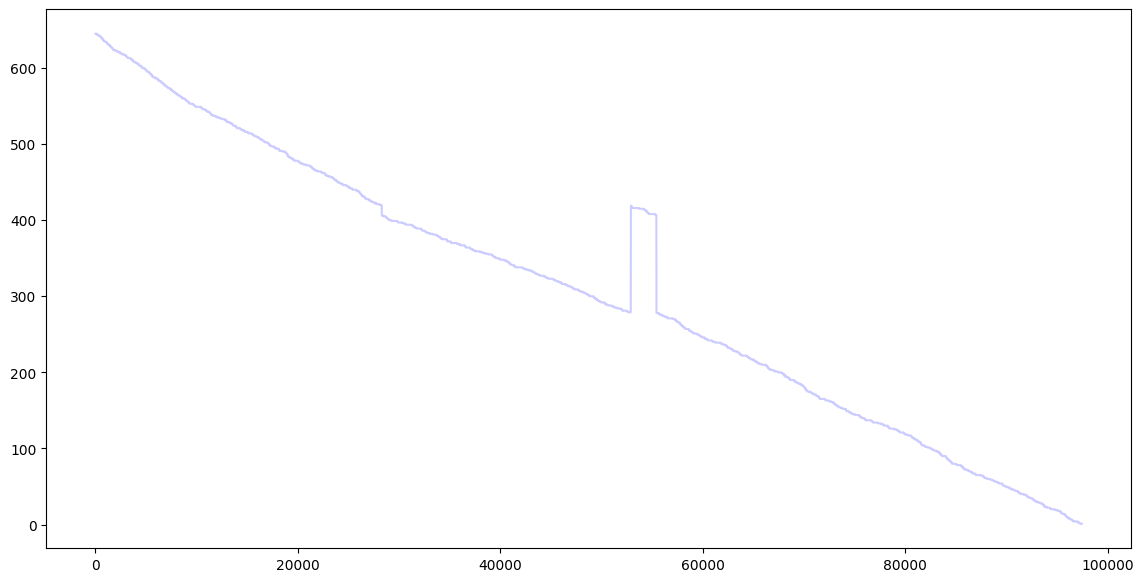

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(thermal_logs_filtered['Sample ID'], label='Original Data', color='blue', alpha=0.2)
# plt.plot(filtered_data, label='Filtered Data', color='red')
# plt.plot(data_EM['Window size=1  m'], label='EM Filtered Data', color='black')

In [ ]:
thermal_logs_filtered.groupby('Sample ID')['Depth_TC'].agg(['min', 'max', 'mean', 'count', 'median'])

min      max      mean  count    median
Sample ID                                             
1.0        164.805  164.978  164.8915    174  164.8915
2.0        164.665  164.776  164.7205    112  164.7205
3.0        164.525  164.646  164.5855    122  164.5855
4.0        164.105  164.501  164.3030    397  164.3030
5.0        163.965  164.093  164.0290    129  164.0290
...            ...      ...       ...    ...       ...
641.0       37.135   37.202   37.1685     68   37.1685
642.0       37.015   37.103   37.0590     89   37.0590
643.0       36.815   36.975   36.8950    161   36.8950
644.0       36.715   36.801   36.7580     87   36.7580
645.0       36.525   36.661   36.5930    137   36.5930

[653 rows x 5 columns]

Данные по ТС не осреднены через треугольный фильтр перед выборкой по образцам!

In [ ]:
data_set_new = thermal_logs_filtered.groupby('Sample ID').agg({
    'TC initial': 'mean',
    'Depth_TC': 'median'
}).reset_index()

# Rename the columns for clarity
data_set_new.columns = ['Sample ID', 'Average TC Initial', 'Median Depth TC']

data_set_new['Median Depth TC'] = data_set_new['Median Depth TC'].astype(float)
data_set_new['Median Depth TC'] = np.round(data_set_new['Median Depth TC'], 3)


data_set_new

Sample ID Average TC Initial  Median Depth TC
0          1.0           2.859563          164.892
1          2.0           2.663473          164.721
2          3.0           2.800189          164.586
3          4.0           2.994791          164.303
4          5.0           3.040047          164.029
..         ...                ...              ...
648      641.0           2.882338           37.169
649      642.0            3.03791           37.059
650      643.0           2.610528           36.895
651      644.0           2.583437           36.758
652      645.0           2.900314           36.593

[653 rows x 3 columns]

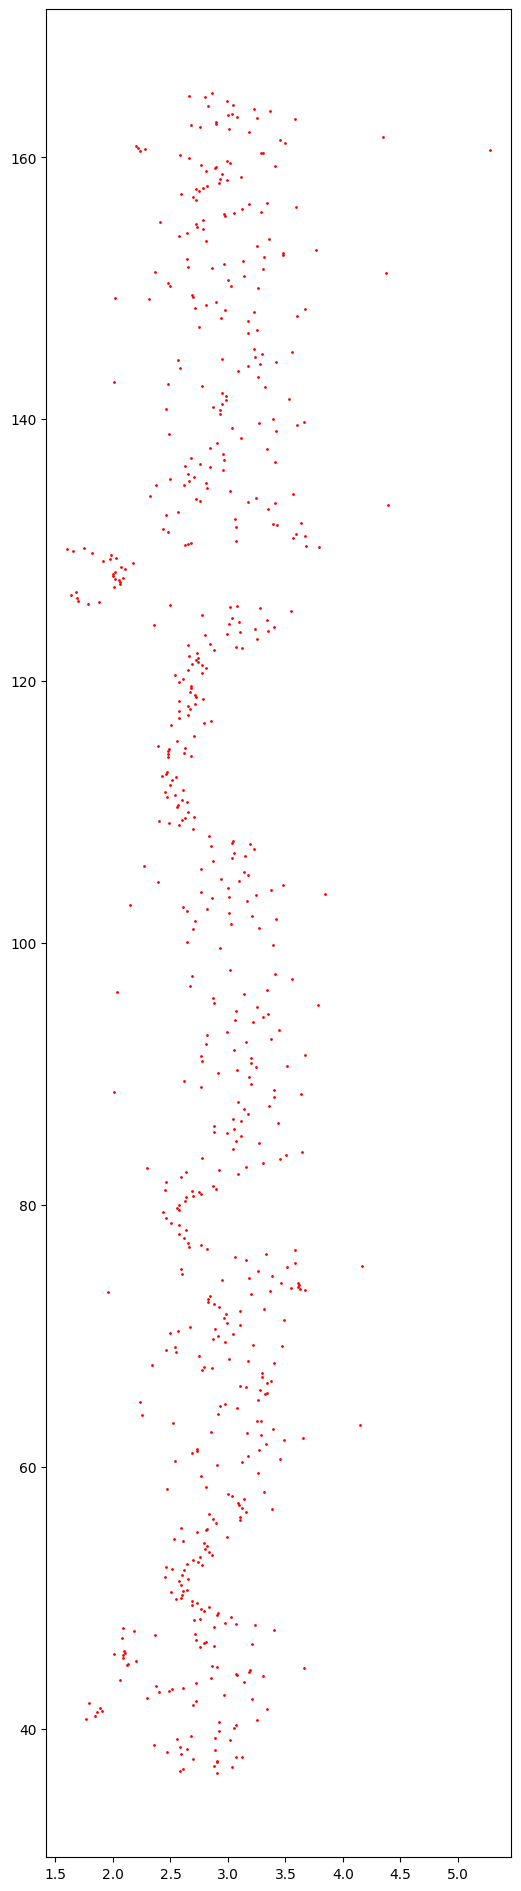

In [ ]:
plt.figure(figsize=(6, 24))
x, y = data_set_new['Average TC Initial'], data_set_new['Median Depth TC']
plt.scatter(x, y, label='Triangle Filter 1m', marker='o', s=1, color='red')  # Use 's' instead of 'markersize'

Данные по ТС усредненны в треугольном фильтре перед выборкой по образцам

In [ ]:
def triangular_filter(data, window_size):
    """Applies a non-recursive triangular filter to the data"""
    if window_size % 2 == 0:
        raise ValueError("Window size must be odd.")

    half_window = window_size // 2
    filtered_data = np.zeros_like(data)

    for i in range(len(data)):
        start_index = max(0, i - half_window)
        end_index = min(len(data), i + half_window + 1)

        actual_window_length = end_index - start_index
        weights = np.concatenate((np.arange(1, half_window + 2),
                                  np.arange(half_window, 0, -1)))
        weights = weights[:actual_window_length]  # Adjust weights size to match the data segment
        weights = weights / weights.sum()  # Normalize weights

        filtered_data[i] = np.sum(data[start_index:end_index] * weights)

    return filtered_data

In [ ]:
data = thermal_logs_filtered['TC initial']
filtered_tc_triangle = triangular_filter(data, 1001)

In [ ]:
data_tc_filtered = pd.DataFrame(thermal_logs_filtered["Depth_TC"])
data_tc_filtered['Sample ID'] = thermal_logs_filtered['Sample ID']
data_tc_filtered['TC filt tri'] = filtered_tc_triangle

In [ ]:
data_tc_filtered.shape

(97447, 3)

Привязка усредненого ТС к образцам (выбор одного значения ТС для образца)

In [ ]:
data_set_new_filtered = data_tc_filtered.groupby('Sample ID').agg({
    'TC filt tri': 'mean',
    'Depth_TC': 'median'
}).reset_index()

# Rename the columns for clarity
data_set_new_filtered.columns = ['Sample ID', 'Average TC Initial', 'Median Depth TC']

data_set_new_filtered ['Median Depth TC'] = data_set_new_filtered ['Median Depth TC'].astype(float)
data_set_new_filtered ['Median Depth TC'] = np.round(data_set_new_filtered ['Median Depth TC'], 3)

data_set_new_filtered_by_depth = data_set_new_filtered.sort_values('Median Depth TC')

data_set_new_filtered

Sample ID Average TC Initial  Median Depth TC
0          1.0           2.802618          164.892
1          2.0           2.795487          164.721
2          3.0           2.826592          164.586
3          4.0           2.960388          164.303
4          5.0           3.095736          164.029
..         ...                ...              ...
648      641.0           2.833165           37.169
649      642.0           2.833945           37.059
650      643.0           2.837545           36.895
651      644.0           2.823722           36.758
652      645.0           2.804297           36.593

[653 rows x 3 columns]

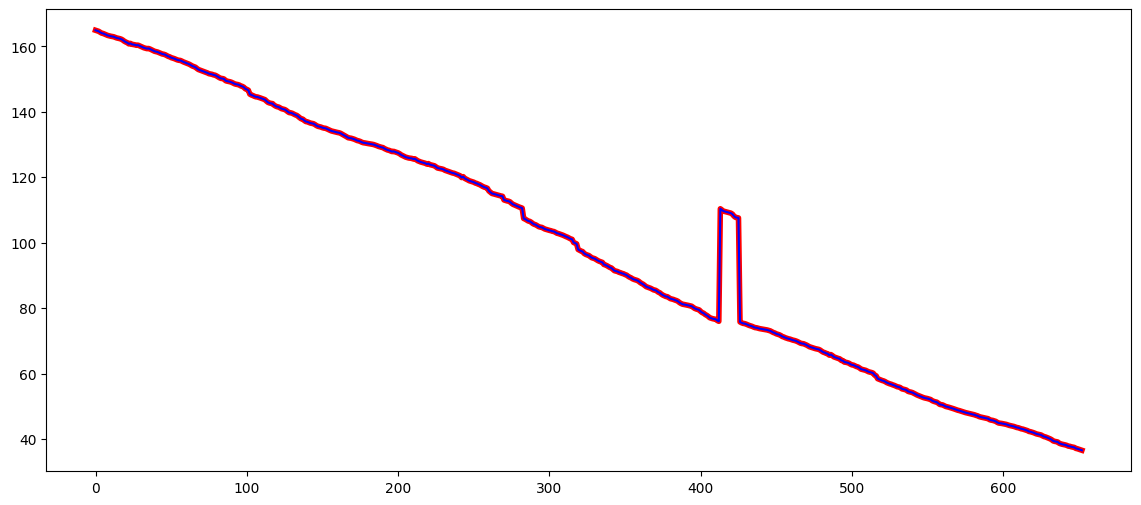

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(data_set_new_filtered ['Median Depth TC'], label='Original Data', color='red', lw=4)
plt.plot(data_set_new['Median Depth TC'], label='Original Data', color='blue')

# plt.plot(filtered_data, label='Filtered Data', color='red')
# plt.plot(data_EM['Window size=1  m'], label='EM Filtered Data', color='black')

In [ ]:
data_set_new_filtered_by_depth[(data_set_new_filtered_by_depth['Median Depth TC'] > 109) & \
                               (data_set_new_filtered_by_depth['Median Depth TC'] < 110)]

Sample ID Average TC Initial  Median Depth TC
420      414.0           2.600482          109.032
419      413.0           2.592294          109.175
418      412.0           2.597782          109.288
417      411.0           2.608333          109.421
416      410.0           2.623011          109.534
415      409.0           2.641378          109.656

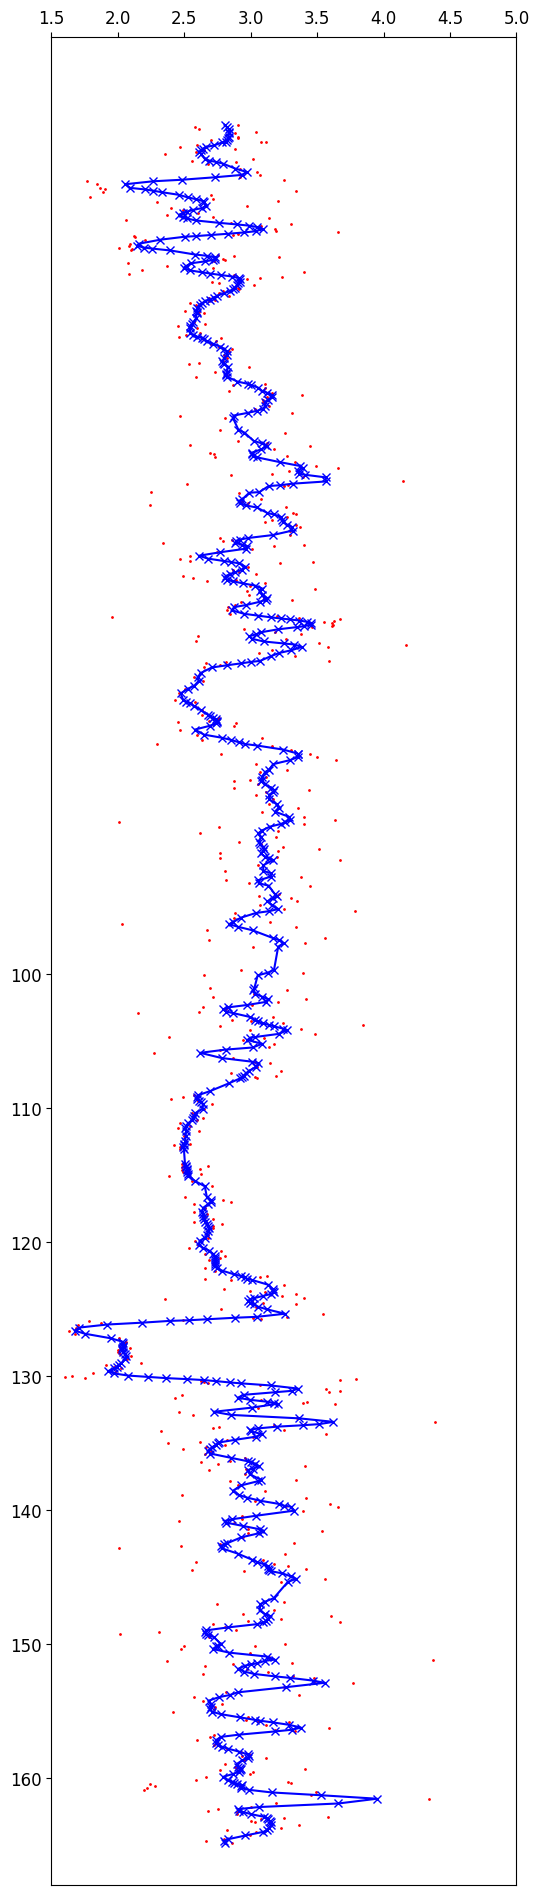

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 24))

x, y = data_set_new['Average TC Initial'], data_set_new['Median Depth TC']
ax1.scatter(x, y, label='Not Filter before', marker='o', s=1, color='red')  # Use 's' instead of 'markersize'

x, y = data_set_new_filtered_by_depth['Average TC Initial'], data_set_new_filtered_by_depth['Median Depth TC']
ax1.plot(x, y, label='Not Filter before', marker='x', color='blue')  # Use 's' instead of 'markersize'
# ax1.scatter(x, y, label='Not Filter before', marker='x', color='blue')  # Use 's' instead of 'markersize'


# Set axis limits and ticks
ax1.set_xlim(1.5, 5)
ax1.set_ylim(30, 168)
ax1.set_yticks(np.arange(100, 165, 10))
ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top

# Increase font size for tick labels
ax1.tick_params(axis='both', which='major', labelsize=12)

Добавление данных ГИС

In [ ]:
from scipy.interpolate import interp1d

def interpolation(x, y, new_dataframe, new_depth):

  interp_function = interp1d(x, y,
                            kind='linear',
                            bounds_error=False,
                             fill_value="extrapolate")

  # Interpolate the data to new depth
  interpolated_values = interp_function(new_depths)

  # Create a new DataFrame with the interpolated results
  new_dataframe[x.name] = new_depths
  new_dataframe[y.name] = interpolated_values

  return new_dataframe

Данным НТПК интревал 36,525 -164,978 (нобучение)

In [ ]:
# well_logs_merged - объединенные данные ГИС с единой привязкой по глубине

interpolated_df = pd.DataFrame()
new_dataframe = interpolated_df

new_depths = np.arange(36.525, 164.979, 0.001)

interpolation(well_logs_merged['Глубина'], well_logs_merged['ГК '], new_dataframe, new_depths) # ГК
interpolation(well_logs_merged['Глубина'], well_logs_merged['ГГпК'], new_dataframe, new_depths) # ГГпК
interpolation(well_logs_merged['Глубина'], well_logs_merged['ПС'], new_dataframe, new_depths) # ПС
interpolation(well_logs_merged['Глубина'], well_logs_merged['КС'], new_dataframe, new_depths) # КС
# interpolation(new_data_filtered['Depth_TC'], new_data_filtered['TC filt tri'], new_dataframe, new_depths) # НТКП

# interpolated_df.drop(['Depth_TC'], axis=1, inplace=True)
interpolated_df.rename(columns={'Глубина': 'Median Depth TC'}, inplace=True)
interpolated_df['Median Depth TC'] = interpolated_df['Median Depth TC'].astype(float)
interpolated_df['Median Depth TC'] = np.round(interpolated_df['Median Depth TC'], 3)

interpolated_df

Median Depth TC      ГК        ГГпК        ПС         КС
0                36.525  24.8825  36.498333  5.401225  1311.0025
1                36.526  24.8554  36.495066  5.399730  1310.4994
2                36.527  24.8283  36.491799  5.398235  1309.9963
3                36.528  24.8012  36.488532  5.396740  1309.4932
4                36.529  24.7741  36.485266  5.395245  1308.9901
...                 ...      ...        ...       ...        ...
128449          164.974  24.4834  27.224930  2.338180  4657.0934
128450          164.975  24.4875  27.218330  2.336650  4658.7325
128451          164.976  24.4916  27.211730  2.335120  4660.3716
128452          164.977  24.4957  27.205130  2.333590  4662.0107
128453          164.978  24.4998  27.198530  2.332060  4663.6498

[128454 rows x 5 columns]

In [ ]:
data_set_new_filtered.columns

Index(['Sample ID', 'Average TC Initial', 'Median Depth TC'], dtype='object')

merged_data - целевая информация (ГИС увязан к НТПК для каждого образца)

In [ ]:
merged_data = pd.merge(data_set_new_filtered, interpolated_df, on='Median Depth TC')
merged_data['Average TC Initial']=merged_data['Average TC Initial'].astype(float)

merged_data .rename(columns={'Median Depth TC':'Глубина'}, inplace=True)
merged_data .rename(columns={'Average TC Initial':'НТПК'}, inplace=True)

In [ ]:
merged_data

Sample ID      НТПК  Глубина       ГК        ГГпК        ПС         КС
0          1.0  2.802618  164.892  24.14720  27.766130  2.463640  4522.6872
1          2.0  2.795487  164.721  23.44610  28.894730  2.725270  4242.4011
2          3.0  2.826592  164.586  22.89260  29.785730  2.931820  4021.1226
3          4.0  2.960388  164.303  21.73230  31.653530  3.364810  3557.2573
4          5.0  3.095736  164.029  20.60890  33.461930  3.784030  3108.1439
..         ...       ...      ...       ...        ...       ...        ...
648      641.0  2.833165   37.169  22.40650  35.762602  5.337446  1208.9019
649      642.0  2.833945   37.059  21.32800  35.704735  5.163772  1211.4057
650      643.0  2.837545   36.895  20.01825  35.934330  5.020267  1215.6040
651      644.0  2.823722   36.758  21.34030  35.961730  4.991977  1218.1796
652      645.0  2.804297   36.593  23.03970  36.276197  5.299565  1276.7917

[653 rows x 7 columns]

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sample ID  653 non-null    float64
 1   НТПК       653 non-null    float64
 2   Глубина    653 non-null    float64
 3   ГК         653 non-null    float64
 4   ГГпК       653 non-null    float64
 5   ПС         653 non-null    float64
 6   КС         653 non-null    float64
dtypes: float64(7)
memory usage: 35.8 KB


Добавление литологии

In [ ]:
# path_to_ser = Path('/content/Ros/Data/Rosatom_dataset.xlsx')
# path_to_ser = Path('/content/Rosatom_dataset.xlsx')


path_to_ser = Path(output_file)
data_initial_lithology = pd.read_excel(path_to_ser, sheet_name='Lithology', skiprows=0)
data_lithology = data_initial_lithology.copy()

In [ ]:
lithology = data_lithology[['Кровля', 'Подошва','Литология']].dropna()

In [ ]:
interpolated_df_lith = pd.merge(
    lit_func(lithology, merged_data),
    merged_data,
    on='Глубина',
    how='inner'
)

In [ ]:
interpolated_df_lith

Глубина Литология  Sample ID      НТПК       ГК        ГГпК        ПС  \
0    164.892    Гнейсы        1.0  2.802618  24.14720  27.766130  2.463640   
1    164.721    Гнейсы        2.0  2.795487  23.44610  28.894730  2.725270   
2    164.586    Гнейсы        3.0  2.826592  22.89260  29.785730  2.931820   
3    164.303    Гнейсы        4.0  2.960388  21.73230  31.653530  3.364810   
4    164.029    Гнейсы        5.0  3.095736  20.60890  33.461930  3.784030   
..       ...       ...        ...       ...       ...        ...       ...   
648   37.169    Гнейсы      641.0  2.833165  22.40650  35.762602  5.337446   
649   37.059    Гнейсы      642.0  2.833945  21.32800  35.704735  5.163772   
650   36.895    Гнейсы      643.0  2.837545  20.01825  35.934330  5.020267   
651   36.758    Гнейсы      644.0  2.823722  21.34030  35.961730  4.991977   
652   36.593    Гнейсы      645.0  2.804297  23.03970  36.276197  5.299565   

            КС  
0    4522.6872  
1    4242.4011  
2    4021.1226  
3    3557.2573  
4    3108.1439  
..         ...  
648  1208.9019  
649  1211.4057  
650  1215.6040  
651  1218.1796  
652  1276.7917  

[653 rows x 8 columns]

In [ ]:
interpolated_df_lith.to_excel('output_new.xlsx', index=False)

In [ ]:
unique_lithology_types = interpolated_df_lith['Литология'].unique()
print(unique_lithology_types)

['Гнейсы' 'Вогезиты' 'Долериты' 'Спессартит']


In [ ]:
lithology_numbers = {0: {'lith':'Гнейсы', 'lith_num':0, 'hatch': '', 'color':'#bebebe'},
                 1: {'lith':'Вогезиты', 'lith_num':1, 'hatch':'', 'color':'#B89230'},
                 2: {'lith':'Долериты', 'lith_num':2, 'hatch':'', 'color':'#C0FDB6'},
                 3: {'lith':'Спессартит', 'lith_num':3, 'hatch':'', 'color':'#CCCC42'}}

In [ ]:
df_lith = pd.DataFrame.from_dict(lithology_numbers, orient='index')
df_lith.reset_index(inplace=True)
df_lith

index        lith  lith_num hatch    color
0      0      Гнейсы         0        #bebebe
1      1    Вогезиты         1        #B89230
2      2    Долериты         2        #C0FDB6
3      3  Спессартит         3        #CCCC42

In [ ]:
# добавление литологии и цветов

lithology_array = []
hatch_array = []
color_array = []

work_layers_initial_new = interpolated_df_lith

# path_to_ser = Path('/content/output_data.xlsx')
# df = pd.read_excel(path_to_ser, skiprows=0)
# work_layers_initial_new = df.copy()

for row_index, row in enumerate(work_layers_initial_new.itertuples()):

    lithology = work_layers_initial_new.at[row.Index, 'Литология']

    lit_num = df_lith.loc[df_lith['lith'] == str(lithology), 'index'].iloc[0]
    lithology_array.append(lit_num)

    hatch_val = df_lith.loc[df_lith['lith'] == str(lithology), 'hatch'].iloc[0]
    hatch_array.append(hatch_val)

    color_val = df_lith.loc[df_lith['lith'] == str(lithology), 'color'].iloc[0]
    color_array.append(color_val)

work_layers_initial_new["Lithology"] = lithology_array
work_layers_initial_new["Index"] = hatch_array
work_layers_initial_new["Color"] = color_array
work_layers_initial_new # для построения графиков с литологией

Глубина Литология  Sample ID      НТПК       ГК        ГГпК        ПС  \
0    164.892    Гнейсы        1.0  2.802618  24.14720  27.766130  2.463640   
1    164.721    Гнейсы        2.0  2.795487  23.44610  28.894730  2.725270   
2    164.586    Гнейсы        3.0  2.826592  22.89260  29.785730  2.931820   
3    164.303    Гнейсы        4.0  2.960388  21.73230  31.653530  3.364810   
4    164.029    Гнейсы        5.0  3.095736  20.60890  33.461930  3.784030   
..       ...       ...        ...       ...       ...        ...       ...   
648   37.169    Гнейсы      641.0  2.833165  22.40650  35.762602  5.337446   
649   37.059    Гнейсы      642.0  2.833945  21.32800  35.704735  5.163772   
650   36.895    Гнейсы      643.0  2.837545  20.01825  35.934330  5.020267   
651   36.758    Гнейсы      644.0  2.823722  21.34030  35.961730  4.991977   
652   36.593    Гнейсы      645.0  2.804297  23.03970  36.276197  5.299565   

            КС  Lithology Index    Color  
0    4522.6872          0        #bebebe  
1    4242.4011          0        #bebebe  
2    4021.1226          0        #bebebe  
3    3557.2573          0        #bebebe  
4    3108.1439          0        #bebebe  
..         ...        ...   ...      ...  
648  1208.9019          0        #bebebe  
649  1211.4057          0        #bebebe  
650  1215.6040          0        #bebebe  
651  1218.1796          0        #bebebe  
652  1276.7917          0        #bebebe  

[653 rows x 11 columns]

In [ ]:
work_layers_initial_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Глубина    653 non-null    float64
 1   Литология  653 non-null    object 
 2   Sample ID  653 non-null    float64
 3   НТПК       653 non-null    float64
 4   ГК         653 non-null    float64
 5   ГГпК       653 non-null    float64
 6   ПС         653 non-null    float64
 7   КС         653 non-null    float64
 8   Lithology  653 non-null    int64  
 9   Index      653 non-null    object 
 10  Color      653 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 56.2+ KB


In [ ]:
work_layers_initial_new.to_excel('output_data_lith.xlsx', index=False)

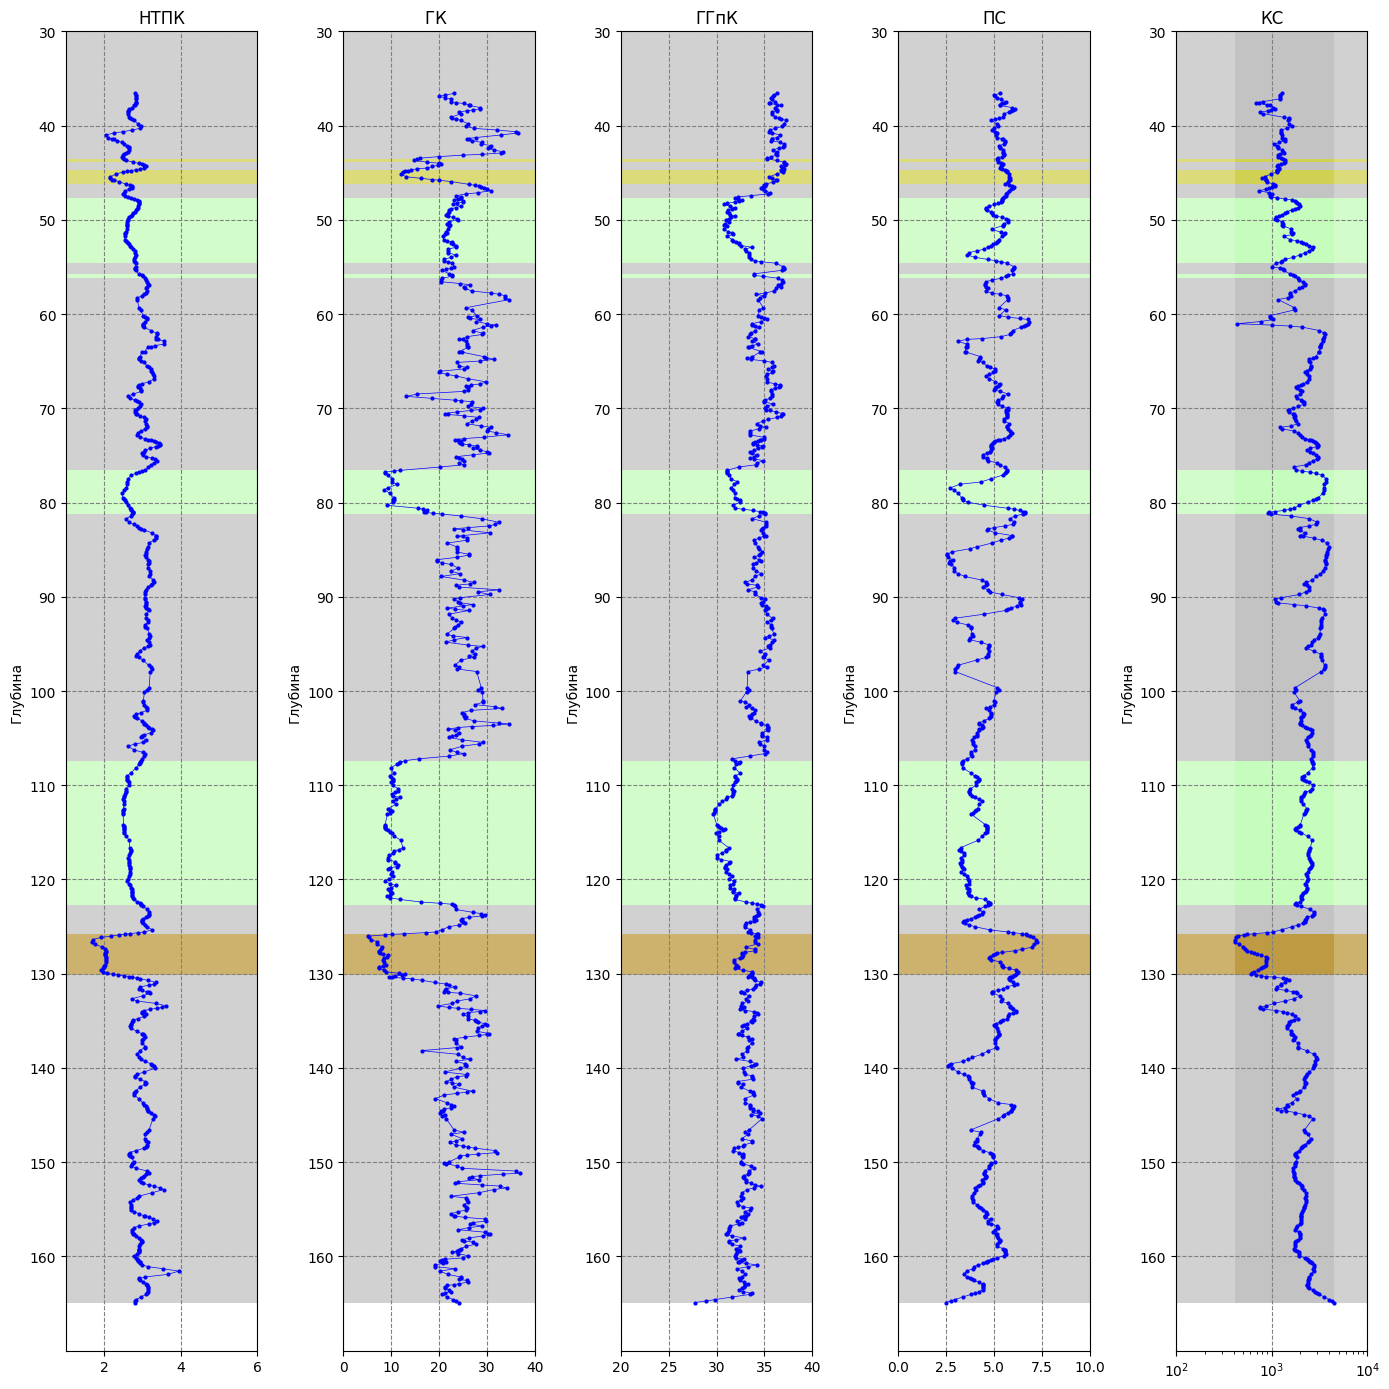

In [ ]:
data = work_layers_initial_new.sort_values('Глубина')
# data = work_layers_initial_new #0.001m

def initial_plot(ax, x, y, label_name, lithology_data):

    lithology_data.index = range(1, len(lithology_data) + 1)
    ax.plot(x, y, 'b-', marker='o', markersize=2, label=label_name, lw=0.5)
    ax.invert_yaxis()
    ax.set_title(f'{label_name}')
    ax.set_xlim((min(x) // 10) * 10, (np.round(max(x), -1) // 10) * 10)

    depth_start = 0
    for lit, depth in zip(data.index, data['Глубина']):
        key = int(lit)
        color = data.at[lit, 'Color']
        hatch = data.at[lit, 'Index']

        depth_values = [depth_start, depth]
        depth_start = depth

        ax.fill_betweenx(depth_values,
                         (min(x) // 10) * 10, (np.round(max(x), -1) // 10) * 10,
                         facecolor=color, hatch=hatch, alpha=0.7)

        if x.name == "КС":
            ax.fill_betweenx(depth_values, 100, 10000,
                             facecolor=color, hatch=hatch, alpha=0.7)

        if x.name == "НТПК":
          ax.set_xlim(1, 6)
          ax.fill_betweenx(depth_values, 1,6,
                           facecolor=color, hatch=hatch, alpha=0.7)

    if x.name == "КС":
        ax.set_xscale('log')
        ax.set_xlim(100, 10000)


parametrs_list = ['Average TC Initial', 'ГК ',
       'ГГпК', 'ПС']
parameters_list = [col_name for col_name in data.keys() if 'Глубина' not in col_name
                   and 'Литология' not in col_name
                   and 'Sample ID' not in col_name
                   and 'Lithology' not in col_name
                   and 'Index' not in col_name
                   and 'Color' not in col_name]


rows = 1
cols = len(parameters_list)
fig, axs = plt.subplots(rows, cols, figsize=(14, 14))

if cols == 1:
    axs = [axs]  # Make axs iterable if there is only one subplot

for index, name_log in enumerate(parameters_list):
    ax = axs[index]
    ax.set_ylabel("Глубина")
    ax.set_ylim(30, 170)
    ax.set_yticks(np.arange(30, 165, 10))
    ax.grid(color='gray', linestyle='--')

    initial_plot(ax, data[name_log], data['Глубина'], name_log, data['Литология'])

plt.tight_layout()
plt.show()

Добавление литологии

## Regression analysis 0.1m

0.1m (привязка НТПК к ГИС)

In [ ]:
# data = work_layers_initial_new.sort_values('Глубина')
data_set = work_layers_initial_new.copy()

0.1m
Pearson correlation coefficient (R): 0.517
Pearson correlation coefficient (R): 0.178
Pearson correlation coefficient (R): 0.231
Pearson correlation coefficient (R): 0.476


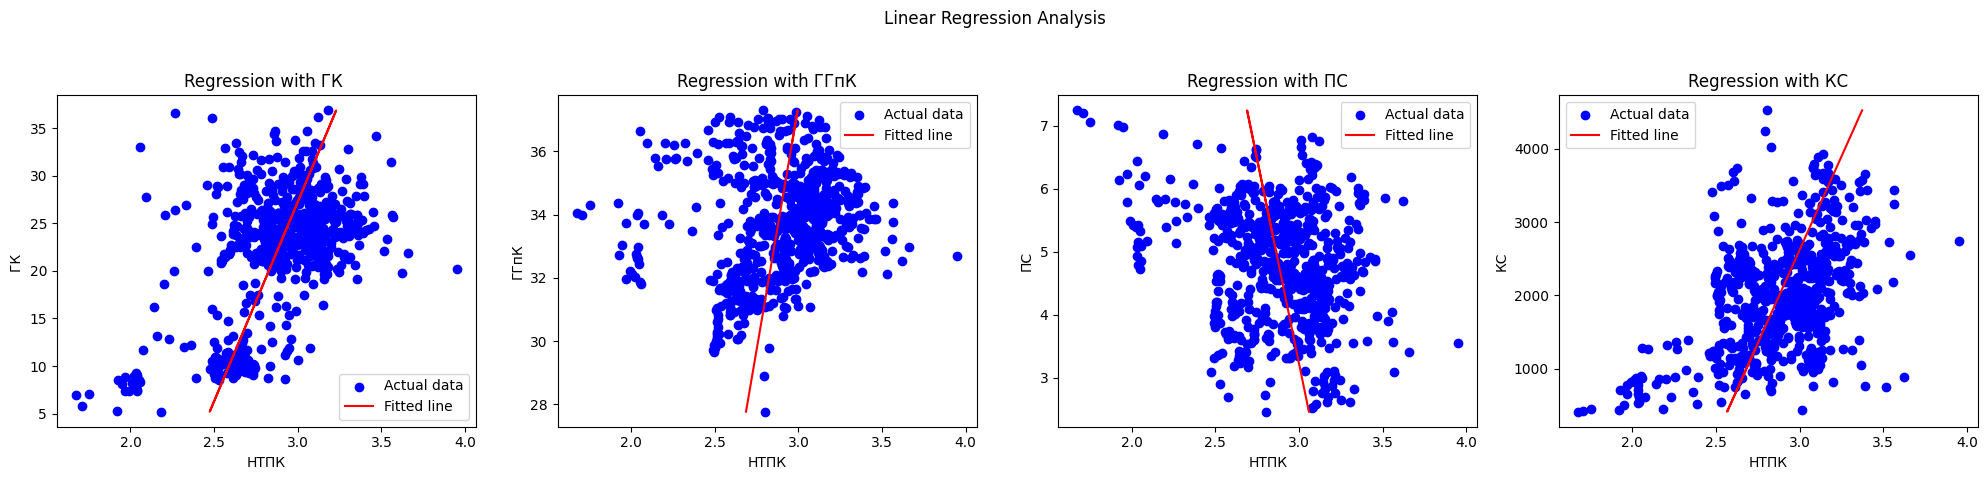

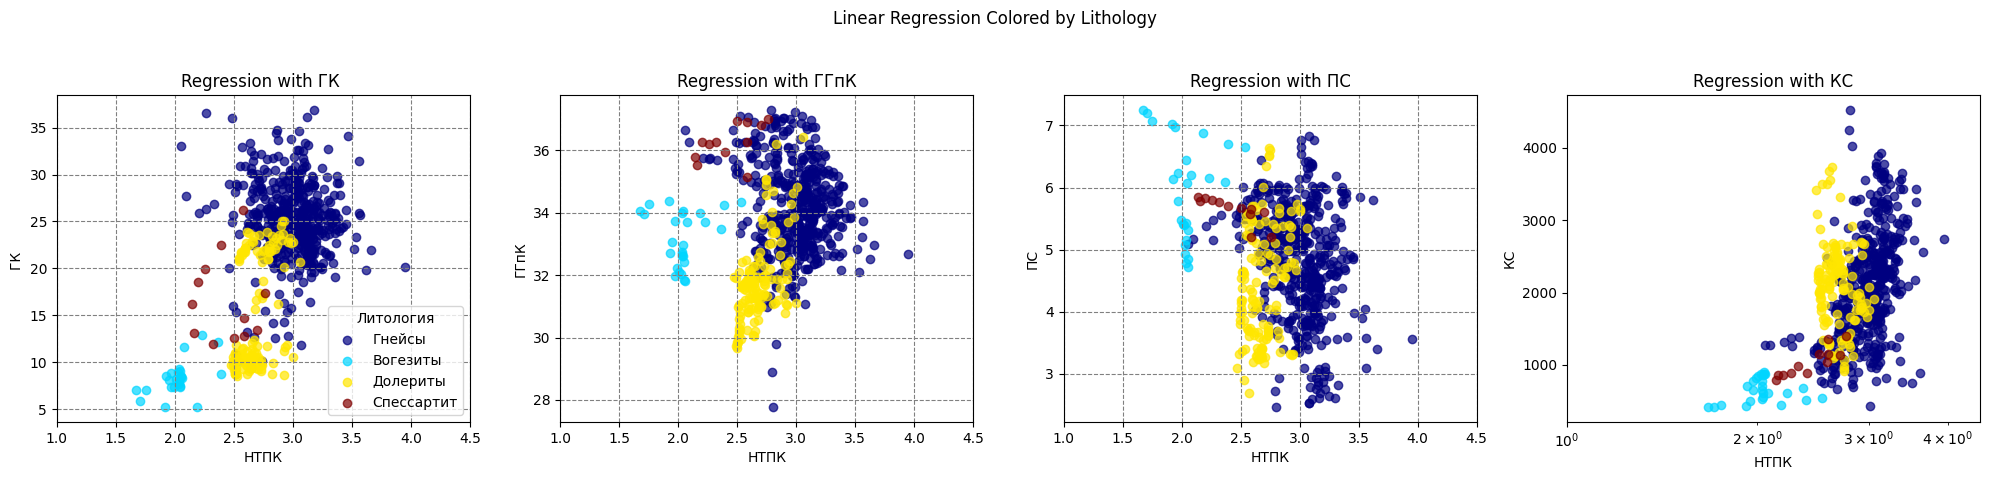

In [ ]:
from sklearn.linear_model import LinearRegression

# data_set  = work_layers_initial_new #0.001m

X_reg = data_set[['ГК ', 'ГГпК', 'ПС', 'КС']]
y_reg = data_set['НТПК']

# without lithology
model = LinearRegression()

print('0.1m')
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))  # Adjust size as needed
fig.suptitle('Linear Regression Analysis')

columns = ['ГК ', 'ГГпК', 'ПС', 'КС']

for i, col in enumerate(columns):
    X_col = X_reg[[col]].values.reshape(-1, 1)
    model.fit(X_col, y_reg)
    y_pred = model.predict(X_col)
    corr, _ = pearsonr(y_reg, y_pred)
    print(f'Pearson correlation coefficient (R): {corr:.3f}')

    axes[i].scatter(y_reg, X_reg[col], color='blue', label='Actual data')
    axes[i].plot(y_pred, X_reg[col], color='red', label='Fitted line')

    # axes[i].scatter(X_reg[col], y, color='blue', label='Actual data')
    # axes[i].plot(X_reg[col], y_pred, color='red', label='Fitted line')
    axes[i].set_title(f'Regression with {col}')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('НТПК')
    axes[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# with lithology
unique_categories = data_set['Литология'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_categories)))
color_map = dict(zip(unique_categories, colors))

model = LinearRegression()

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle('Linear Regression Colored by Lithology')

columns = ['ГК ', 'ГГпК', 'ПС', 'КС']

for i, col in enumerate(columns):
    X_col = X_reg[[col]].values.reshape(-1, 1)
    model.fit(X_col, y_reg)

    y_pred = model.predict(X_col)

    point_colors = data_set['Литология'].map(color_map)

    for category in unique_categories:
        idx = data_set['Литология'] == category
        axes[i].scatter(y_reg[idx], X_reg[col][idx], color=color_map[category], label=category if i == 0 else "", alpha=0.7)

        if col == "КС":
          axes[i].set_xscale('log')
          axes[i].set_xlim(100, 10000)

        else:
          axes[i].grid(color='gray', linestyle='--')


    axes[i].set_title(f'Regression with {col}')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('НТПК')
    axes[i].set_xlim(1, 4.5)

    if i == 0:
        axes[i].legend(title='Литология')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

0.001m (привязка ГИС к НТПК)

In [ ]:
work_layers_initial_new.columns

Index(['Глубина', 'Литология', 'ГК ', 'ГГпК', 'ПС', 'КС', 'TC', 'Lithology',
       'Index', 'Color'],
      dtype='object')

0.1m
Pearson correlation coefficient (R): 0.527
Pearson correlation coefficient (R): 0.226
Pearson correlation coefficient (R): 0.228
Pearson correlation coefficient (R): 0.434


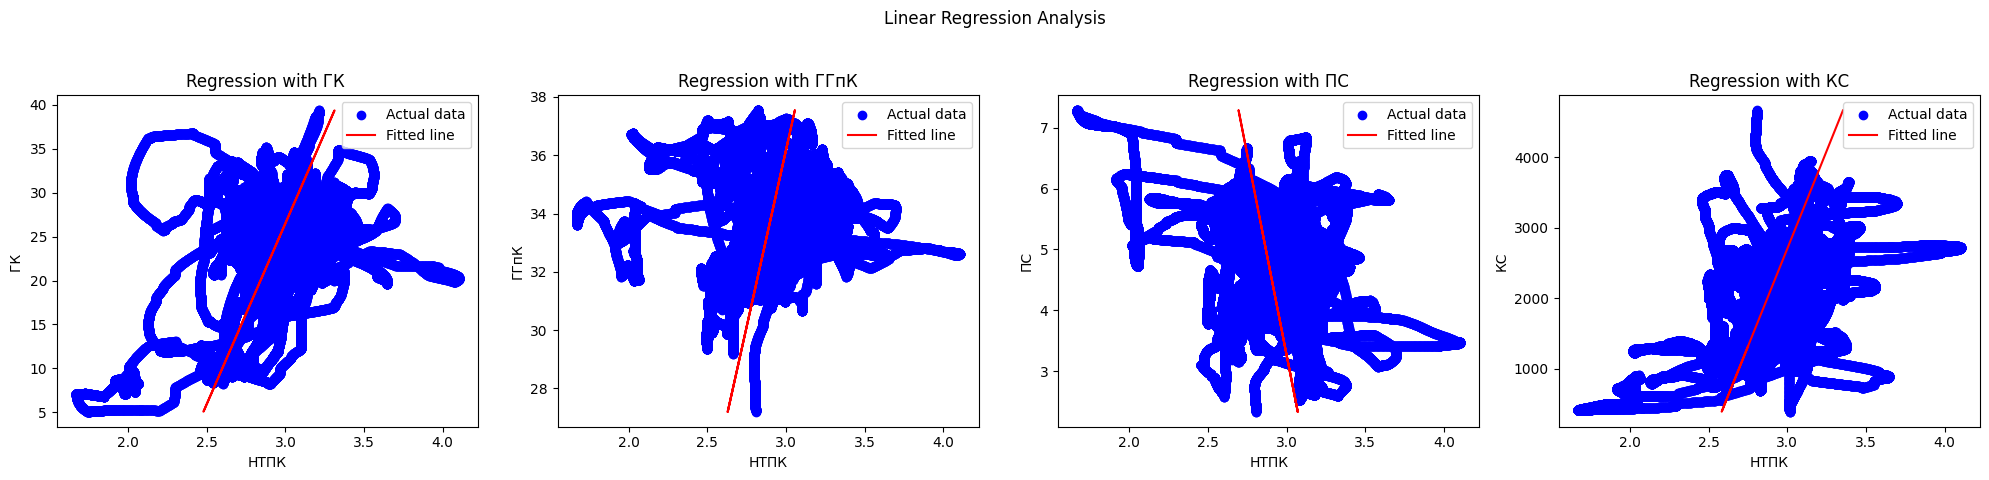

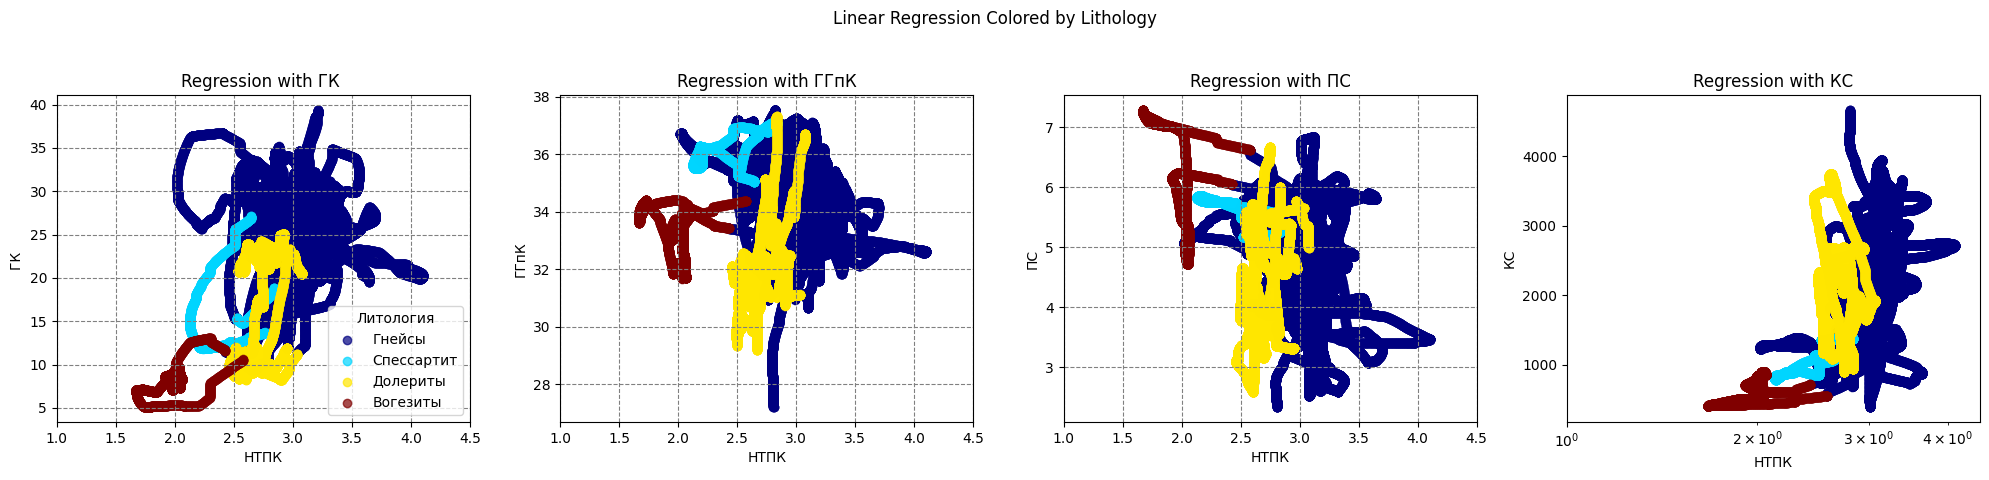

In [ ]:
from sklearn.linear_model import LinearRegression

data_set  = work_layers_initial_new #0.001m

X_reg = data_set[['ГК ', 'ГГпК', 'ПС', 'КС']]
y_reg = data_set['TC']

# without lithology
model = LinearRegression()

print('0.1m')
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))  # Adjust size as needed
fig.suptitle('Linear Regression Analysis')

columns = ['ГК ', 'ГГпК', 'ПС', 'КС']

for i, col in enumerate(columns):
    X_col = X_reg[[col]].values.reshape(-1, 1)
    model.fit(X_col, y_reg)
    y_pred = model.predict(X_col)
    corr, _ = pearsonr(y_reg, y_pred)
    print(f'Pearson correlation coefficient (R): {corr:.3f}')

    axes[i].scatter(y_reg, X_reg[col], color='blue', label='Actual data')
    axes[i].plot(y_pred, X_reg[col], color='red', label='Fitted line')

    # axes[i].scatter(X_reg[col], y, color='blue', label='Actual data')
    # axes[i].plot(X_reg[col], y_pred, color='red', label='Fitted line')
    axes[i].set_title(f'Regression with {col}')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('НТПК')
    axes[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# with lithology
unique_categories = data_set['Литология'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_categories)))
color_map = dict(zip(unique_categories, colors))

model = LinearRegression()

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle('Linear Regression Colored by Lithology')

columns = ['ГК ', 'ГГпК', 'ПС', 'КС']

for i, col in enumerate(columns):
    X_col = X_reg[[col]].values.reshape(-1, 1)
    model.fit(X_col, y_reg)

    y_pred = model.predict(X_col)

    point_colors = data_set['Литология'].map(color_map)

    for category in unique_categories:
        idx = data_set['Литология'] == category
        axes[i].scatter(y_reg[idx], X_reg[col][idx], color=color_map[category], label=category if i == 0 else "", alpha=0.7)

        if col == "КС":
          axes[i].set_xscale('log')
          axes[i].set_xlim(100, 10000)

        else:
          axes[i].grid(color='gray', linestyle='--')


    axes[i].set_title(f'Regression with {col}')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('НТПК')
    axes[i].set_xlim(1, 4.5)

    if i == 0:
        axes[i].legend(title='Литология')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Data set preparation fot training (ГК, ГГКп, ПС, КС)

In [5]:
### read data from sctreth

path_to_ser = Path('/content/output_new.xlsx')
data_initial = pd.read_excel(path_to_ser, skiprows=0)
work_layers_initial_new = data_initial.copy()

In [6]:
work_layers_initial_new

Глубина Литология  Sample ID      НТПК       ГК        ГГпК        ПС  \
0    164.892    Гнейсы        1.0  2.802618  24.14720  27.766130  2.463640   
1    164.721    Гнейсы        2.0  2.795487  23.44610  28.894730  2.725270   
2    164.586    Гнейсы        3.0  2.826592  22.89260  29.785730  2.931820   
3    164.303    Гнейсы        4.0  2.960388  21.73230  31.653530  3.364810   
4    164.029    Гнейсы        5.0  3.095736  20.60890  33.461930  3.784030   
..       ...       ...        ...       ...       ...        ...       ...   
648   37.169    Гнейсы      641.0  2.833165  22.40650  35.762602  5.337446   
649   37.059    Гнейсы      642.0  2.833945  21.32800  35.704735  5.163772   
650   36.895    Гнейсы      643.0  2.837545  20.01825  35.934330  5.020267   
651   36.758    Гнейсы      644.0  2.823722  21.34030  35.961730  4.991977   
652   36.593    Гнейсы      645.0  2.804297  23.03970  36.276197  5.299565   

            КС  
0    4522.6872  
1    4242.4011  
2    4021.1226  
3    3557.2573  
4    3108.1439  
..         ...  
648  1208.9019  
649  1211.4057  
650  1215.6040  
651  1218.1796  
652  1276.7917  

[653 rows x 8 columns]

In [7]:
# dataset = data_set[['ГК ', 'ГГпК', 'ПС', 'КС', 'Литология', 'НТПК']]

dataset = work_layers_initial_new[['ГК ', 'ГГпК', 'ПС', 'КС', 'Литология', 'НТПК']]
X = dataset[['ГК ', 'ГГпК', 'ПС', 'КС', 'Литология']]
y = dataset['НТПК']
n = len(X)

Label encoding and normalization

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
categorical_clmn = X.select_dtypes(include='object').columns
# Apply Label Encoding to each categorical column
for col in categorical_clmn:
    X[col] = LabelEncoder().fit_transform(X[col])

<Axes: >

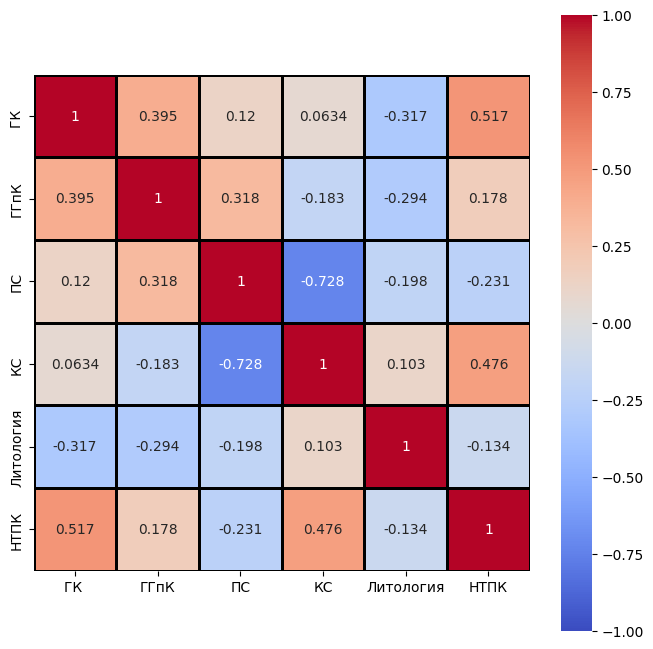

In [10]:
fig, ax = plt.subplots(figsize=(8,8))

categorical_clmn = dataset.select_dtypes(include='object').columns
# Apply Label Encoding to each categorical column
for col in categorical_clmn:
    dataset[col] = LabelEncoder().fit_transform(dataset[col])

sns.heatmap(dataset.corr(),fmt = '.3g', square=True, annot = True,
            vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',
            linewidths=1, linecolor='black')

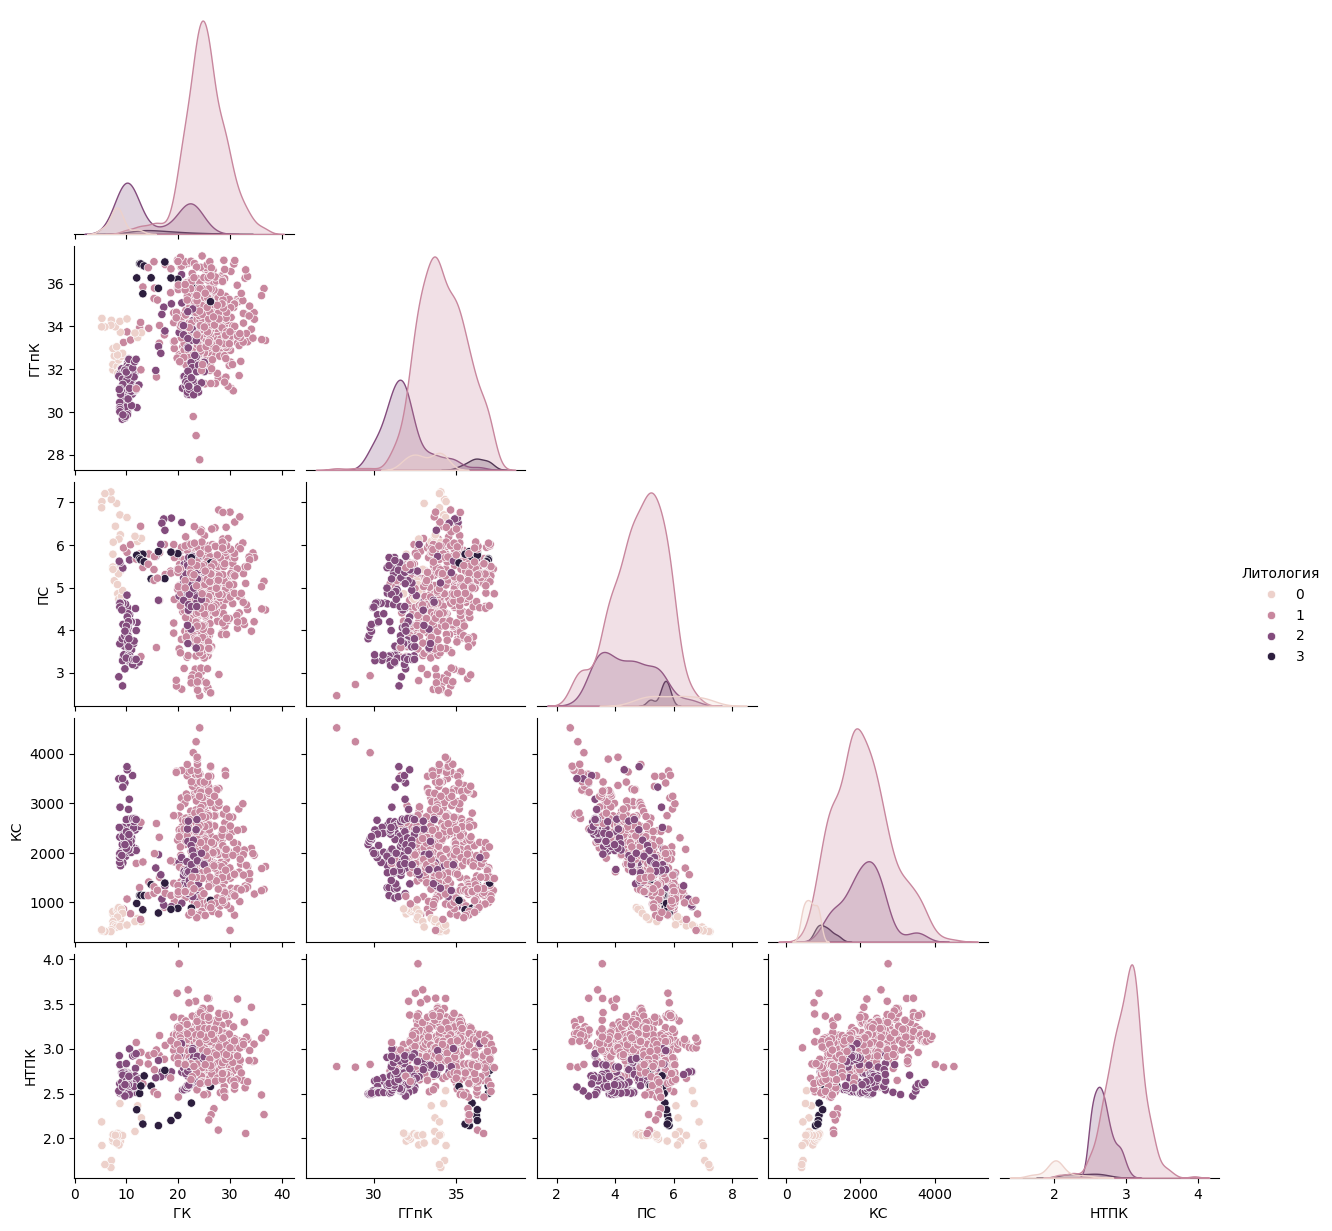

In [11]:
sns.pairplot(data=dataset,hue='Литология', corner=True)

In [ ]:
# dataset.dtypes

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Select numerical columns (float64 and int64 types)
numerical_columns = ['ГК ', 'ГГпК', 'ПС', 'КС']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

print(X)

          ГК       ГГпК        ПС        КС  Литология
0    0.598506  0.000000  0.000000  1.000000          1
1    0.576350  0.118475  0.054727  0.931806          1
2    0.558858  0.212008  0.097932  0.877968          1
3    0.522190  0.408080  0.188503  0.765108          1
4    0.486688  0.597917  0.276194  0.655838          1
..        ...       ...       ...       ...        ...
648  0.543496  0.839430  0.601132  0.193747          1
649  0.509413  0.833356  0.564803  0.194356          1
650  0.468023  0.857457  0.534785  0.195378          1
651  0.509802  0.860334  0.528868  0.196005          1
652  0.563507  0.893345  0.593208  0.210265          1

[653 rows x 5 columns]


In [22]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=int(n*0.2), random_state=0xC0FFEE)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=int(n*0.2), random_state=0xC0FFEE)

In [23]:
X.shape, X_val.shape, X_test.shape, X_train.shape,

((653, 5), (130, 5), (130, 5), (393, 5))

 Examining the feature distributions in the training and test datasets to ensure they are similar is crucial for building models that generalize well. Differences in distributions can lead to models that perform well on training data but poorly on test data. Here are some methods to compare feature distributions.






*   KS Statistic:
  
    Definition: This is the maximum difference between the cumulative distribution functions (CDFs) of the two samples.

    Interpretation: A smaller KS statistic suggests that the distributions of the feature between the two datasets are more similar. A larger value indicates greater disparity


*   P-value:
    
    Definition: The p-value indicates the probability of observing the test results under the null hypothesis, which in this case is that the distributions of the two datasets are the same.
    
    Interpretation:
    * High P-value (typically > 0.05): There is not enough evidence to reject the null hypothesis. This suggests that the distributions of the feature in the two datasets are statistically similar.
    
    * Low P-value (typically < 0.05): There is enough evidence to reject the null hypothesis. This suggests that the distributions of the feature in the two datasets are statistically different.

*   Practical Application
    * **Similar Distributions:** If most features have low KS statistics and high p-values, you can proceed with the analysis, assuming that the training and testing datasets are drawn from similar distributions.
    
    * **Dissimilar Distributions:** If several features show high KS statistics and low p-values, this might indicate potential issues such as sample bias or non-representative training data. This could affect the model's performance and its ability to generalize to new data.




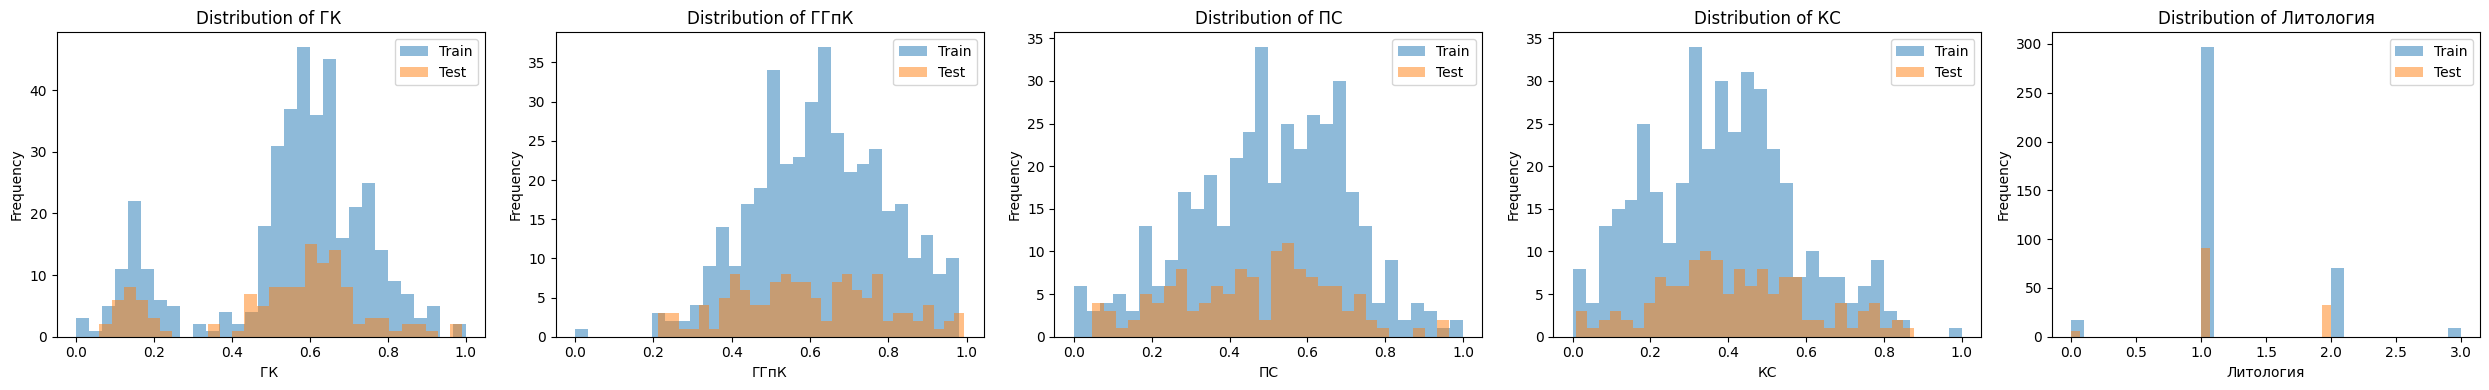

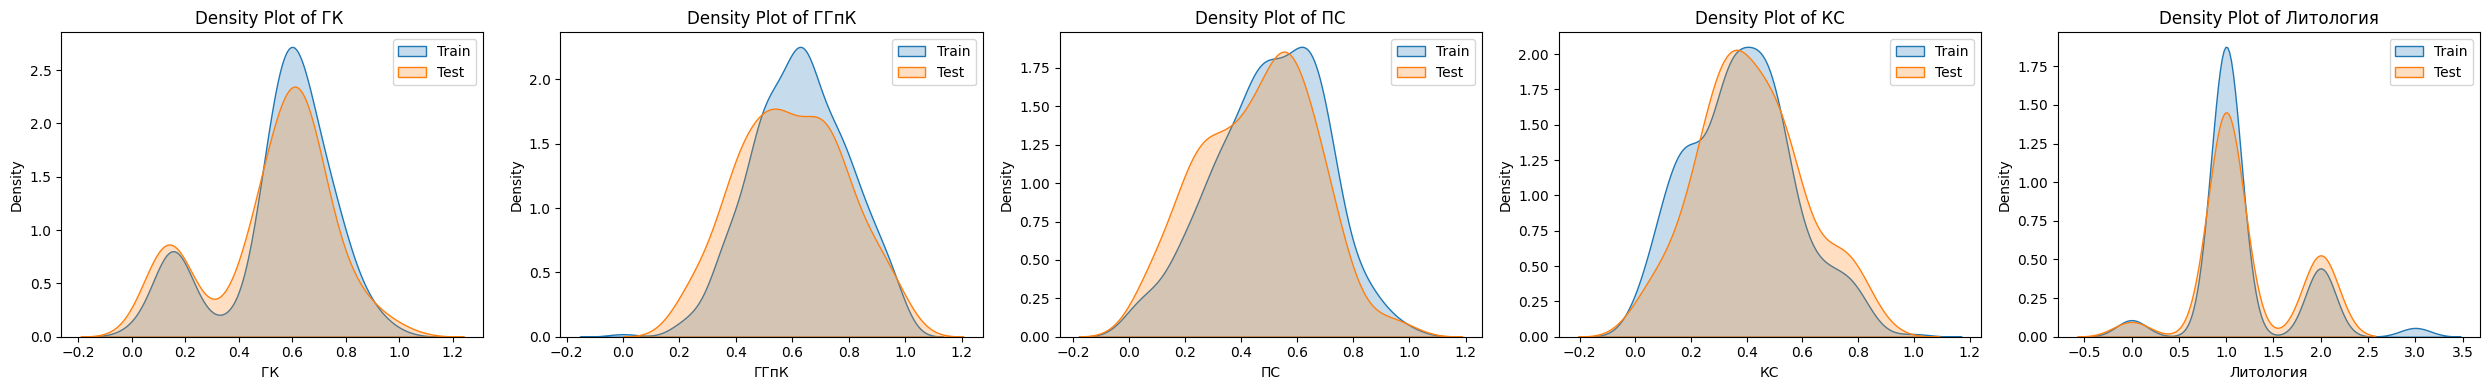

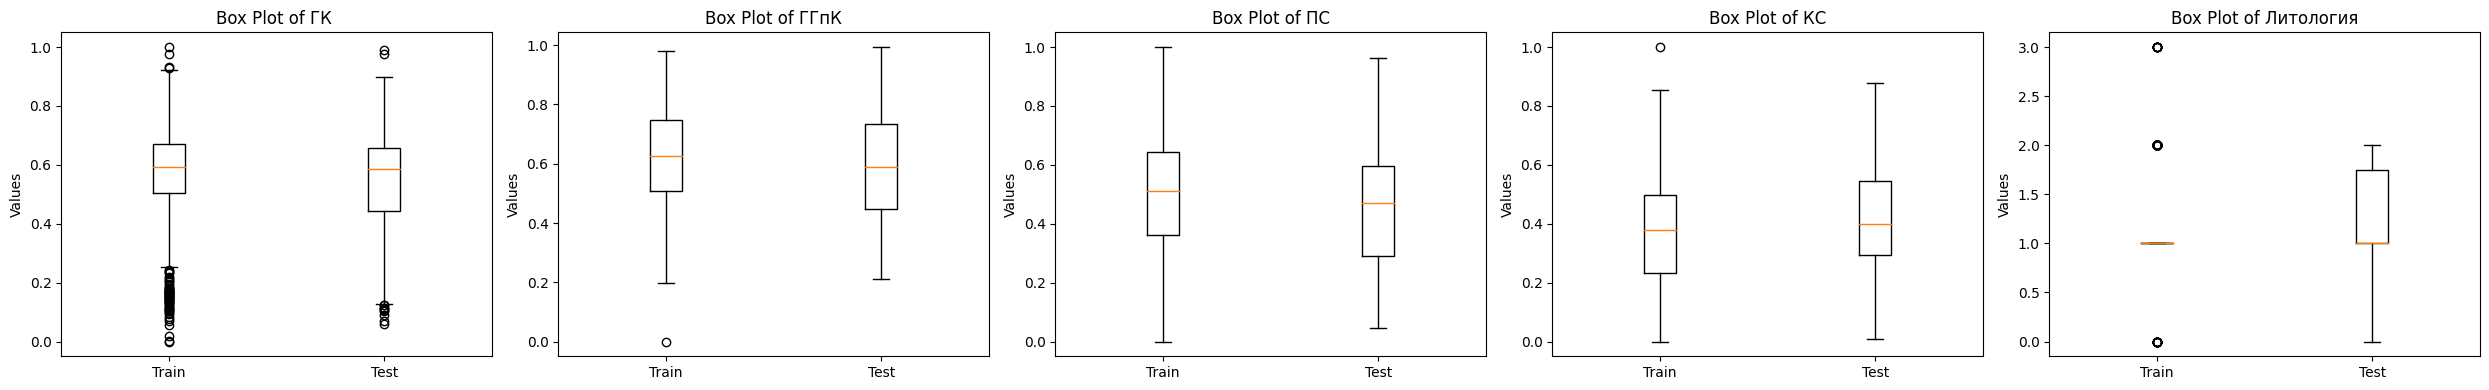

Feature: ГК , KS Statistic: 0.0998, P-value: 0.2629
Feature: ГГпК, KS Statistic: 0.1169, P-value: 0.1261
Feature: ПС, KS Statistic: 0.1201, P-value: 0.1080
Feature: КС, KS Statistic: 0.1059, P-value: 0.2047
Feature: Литология, KS Statistic: 0.0528, P-value: 0.9305
Training Data Summary Statistics:
               ГК         ГГпК          ПС          КС   Литология
count  393.000000  393.000000  393.000000  393.000000  393.000000
mean     0.552478    0.627763    0.500473    0.381478    1.180662
std      0.207380    0.169245    0.196773    0.188909    0.530145
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.503456    0.509698    0.362728    0.233863    1.000000
50%      0.593918    0.627580    0.511365    0.377390    1.000000
75%      0.672101    0.748852    0.644905    0.497565    1.000000
max      1.000000    0.980205    1.000000    1.000000    3.000000

Testing Data Summary Statistics:
               ГК         ГГпК          ПС          КС   Литология
count

In [24]:
# Assuming X_train and X_test are your training and testing datasets respectively
features = X_train.columns

# Visual Inspection with Histograms
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(5 * len(features), 4))
for i, feature in enumerate(features):
    axes[i].hist(X_train[feature], bins=30, alpha=0.5, label='Train')
    axes[i].hist(X_test[feature], bins=30, alpha=0.5, label='Test')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
plt.tight_layout()
plt.show()

# Density Plots
# Density plots can also be used to compare the distributions more smoothly than histograms.
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(5 * len(features), 4))
for i, feature in enumerate(features):
    sns.kdeplot(X_train[feature], ax=axes[i], label='Train', fill=True)
    sns.kdeplot(X_test[feature], ax=axes[i], label='Test', fill=True)
    axes[i].set_title(f'Density Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].legend()
plt.tight_layout()
plt.show()

# Box Plots
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(5 * len(features), 4))
for i, feature in enumerate(features):
    axes[i].boxplot([X_train[feature], X_test[feature]], labels=['Train', 'Test'])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_ylabel('Values')
plt.tight_layout()
plt.show()

# KS Statistic:
# Definition: This is the maximum difference between the cumulative distribution functions (CDFs) of the two samples.
# Interpretation: A smaller KS statistic suggests that the distributions of the feature between the two datasets are more similar. A larger value indicates greater disparity.

# P-value:
# Definition: The p-value indicates the probability of observing the test results under the null hypothesis, which in this case is that the distributions of the two datasets are the same.
# Interpretation:
# High P-value (typically > 0.05): There is not enough evidence to reject the null hypothesis. This suggests that the distributions of the feature in the two datasets are statistically similar.
# Low P-value (typically < 0.05): There is enough evidence to reject the null hypothesis. This suggests that the distributions of the feature in the two datasets are statistically different.


# Practical Application
# Similar Distributions: If most features have low KS statistics and high p-values, you can proceed with the analysis, assuming that the training and testing datasets are drawn from similar distributions.
# Dissimilar Distributions: If several features show high KS statistics and low p-values, this might indicate potential issues such as sample bias or non-representative training data. This could affect the model's performance and its ability to generalize to new data.


# Statistical Tests
from scipy.stats import ks_2samp
for feature in features:
    stat, p_value = ks_2samp(X_train[feature], X_test[feature])
    print(f'Feature: {feature}, KS Statistic: {stat:.4f}, P-value: {p_value:.4f}')

# Summary Statistics
summary_train = X_train.describe()
summary_test = X_test.describe()
print("Training Data Summary Statistics:\n", summary_train)
print("\nTesting Data Summary Statistics:\n", summary_test)

Conclusion: All features show high p-values and relatively low KS statistics, suggesting that the distributions of these features in the training and testing datasets are statistically similar. This indicates good consistency and reliability for model training, as it suggests that the model's performance on the training data may generalize well to the testing data

In [16]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [52]:
# Assuming X_train, y_train, X_val, y_val, X_test, y_test are defined

RMSE_validation, RMSE_test, RMSE_train = [], [], []
R2_validation, R2_test, R2_train = [], [], []
MAE_validation, MAE_test, MAE_train = [], [], []
model_name = []

    #  GaussianProcess
# Define the kernel with hyperparameters as variables
kernel = RBF(length_scale=1.0)

# List of models to evaluate
models_list = [
    # RandomForestRegressor(random_state=0xC0FFEE),
    # ExtraTreesRegressor(random_state=0xC0FFEE),
    # xgb.XGBRegressor(random_state=0xC0FFEE),
    # LinearRegression(),
    # Ridge(),
    # KNeighborsRegressor(),
    # DecisionTreeRegressor(),
    # GradientBoostingRegressor(random_state=0xC0FFEE),  # Added Gradient Boosting
    CatBoostRegressor(silent=True, random_state=0xC0FFEE),  # Added CatBoost
    GaussianProcessRegressor(random_state=0xC0FFEE, kernel=kernel),
    # AdaBoostRegressor(random_state=0xC0FFEE),
    MLPRegressor(random_state=0xC0FFEE)  # Added MLPRegressor
]

# # Parameter grids for each model
# p_g1 = { #RandomForest
#     'n_estimators': np.arange(1, 100, 20),
#     'min_samples_split': np.arange(2, 51, 10),
#     'min_samples_leaf': np.arange(1, 51, 10),
#     'max_depth': np.arange(1,10, 1)
# }

# p_g2 = { #ExtraTrees
#     'n_estimators': np.arange(1, 100, 20),
#     'min_samples_split': np.arange(2, 51, 10),
#     'min_samples_leaf': np.arange(1, 51, 10),
#     'max_depth': np.arange(1, 10, 1),
#     'max_features': np.arange(2, 6, 1)
# }

# p_g3 = {
#     'n_estimators': np.arange(2, 200, 40),
#     "learning_rate": np.logspace(-3, 0, 4)
# }

# p_g4 = {  # Linear Regression has no hyperparameters to tune
# }

# p_g5 = {  # Ridge Regression parameters
#     'alpha': np.logspace(-3, 3, 7),  # Regularization strength
# }

# p_g6 = {  # KNeighbors Regressor parameters
#     'n_neighbors': np.arange(1, 21, 1),   # Number of neighbors
#     'weights': ['uniform', 'distance'], # Weight function used in prediction
# }

# p_g7 = {  # Decision Tree Regressor parameters
#     'max_depth': [None] + list(np.arange(1, 11)),   # Maximum depth of the tree
#     'min_samples_split': np.arange(2, 21),           # Minimum number of samples required to split an internal node
# }

# p_g8 = {  # Gradient Boosting parameters
#     'n_estimators': np.arange(1, 100, 20),          # Number of boosting stages to be run
#     'learning_rate': np.logspace(-4, 0, 5),                # Step size shrinkage used in update to prevents overfitting
#     'max_depth': np.arange(1, 10, 2),
#     'min_samples_split': np.arange(2, 51, 10),
#     'min_samples_leaf': np.arange(1, 51, 10)
# }

p_g9 = {  # CatBoost parameters (basic)
    'iterations': np.arange(10, 200, 40),              # Number of boosting iterations
    'learning_rate': np.logspace(-4, 0, 5),                     # Learning rate for boosting steps
    'depth': np.arange(2, 12, 2),                                  # Depth of the tree
}

p_g10 = {  # GaussianProcess
    'alpha': np.logspace(-2, 0, 4),
    'kernel__length_scale': np.logspace(-3, 3, 3)
}

# p_g11 = { # AdaBoost
#     'n_estimators': np.arange(1, 120, 20),  # Number of boosting stages to be run
#     'learning_rate': np.logspace(-4, 0, 5),  # Step size shrinkage used in update to prevents overfitting
# }

p_g12 = { # MLPRegressor
        'activation': ['relu', 'sigmoid', 'tanh'],
        'learning_rate': ['adaptive', 'constant', 'invscaling'],
        'solver': ['adam', 'sgd'],
        'alpha': np.logspace(-5, 0, 6)
    }
# params_list = [p_g1, p_g2, p_g3, p_g4, p_g5, p_g6, p_g7, p_g8, p_g9, p_g10, p_g11, p_g12]
params_list = [
    p_g9,
    p_g10,
    p_g12]

In [ ]:
# Model training and evaluation loop
for reg, grid in zip(models_list, params_list):

    print(f"Evaluating {type(reg).__name__}")
    print(grid)

    model_name.append(type(reg).__name__)
    gs = GridSearchCV(reg, param_grid=grid, n_jobs=-1, cv=5,
                       scoring='neg_mean_squared_error')
    gs.fit(X_train, y_train)

    print(f'{type(reg).__name__}: Best Params: {gs.best_params_}')

# Check if the model is GaussianProcessRegressor
    if isinstance(reg, GaussianProcessRegressor):
        # Extract the best length scale
        best_length_scale = gs.best_params_['kernel__length_scale']
        # Create a new kernel with the best length scale
        kernel = RBF(length_scale=best_length_scale)
        # Create a new GaussianProcessRegressor with the updated kernel
        best_reg = GaussianProcessRegressor(kernel=kernel, random_state=0xC0FFEE)
    else:
        # For other models, use the best parameters directly
        best_reg = reg.__class__(**gs.best_params_)

    # Evaluate using cross-validation on the training set
    cv_results = gs.cv_results_
    best_score = np.min(cv_results['mean_test_score'])

    print(f'Cross-validated MSE: {-best_score:.2f}')

    best_reg.fit(X_train, y_train)

    y_pred_val = best_reg.predict(X_val)
    y_pred_train = best_reg.predict(X_train)
    y_pred_test = best_reg.predict(X_test)

    # Validation metrics
    print('Validation MSE:', round(mean_squared_error(y_pred_val, y_val), 2))
    print('Validation R^2:', round(r2_score(y_val, y_pred_val), 2))
    print('Validation MAE:', round(mean_absolute_error(y_val, y_pred_val), 2))

    RMSE_validation.append(round(mean_squared_error(y_pred_val, y_val), 2))
    R2_validation.append(round(r2_score(y_val, y_pred_val), 2))
    MAE_validation.append(round(mean_absolute_error(y_val, y_pred_val), 2))

    # Training metrics
    print('Train MSE:', round(mean_squared_error(y_pred_train, y_train), 2))
    print('Train R^2:', round(r2_score(y_train, y_pred_train), 2))
    print('Train MAE:', round(mean_absolute_error(y_train, y_pred_train), 2))

    RMSE_train.append(round(mean_squared_error(y_pred_train, y_train), 2))
    R2_train.append(round(r2_score(y_train, y_pred_train), 2))
    MAE_train.append(round(mean_absolute_error(y_train, y_pred_train), 2))

    # Test metrics
    print('Test MSE:', round(mean_squared_error(y_pred_test, y_test), 2))
    print('Test R^2:', round(r2_score(y_test, y_pred_test), 2))
    print('Train MAE:', round(mean_absolute_error(y_test, y_pred_test), 2))

    RMSE_test.append(round(mean_squared_error(y_pred_test, y_test), 2))
    R2_test.append(round(r2_score(y_test, y_pred_test), 2))
    MAE_test.append(round(mean_absolute_error(y_test, y_pred_test), 2))

    print(' ')

Evaluating CatBoostRegressor
{'iterations': array([ 10,  50,  90, 130, 170]), 'learning_rate': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]), 'depth': array([ 2,  4,  6,  8, 10])}


In [ ]:
# Assuming X_train, y_train, X_val, y_val, X_test, y_test are defined

RMSE_validation, RMSE_test, RMSE_train = [], [], []
R2_validation, R2_test, R2_train = [], [], []
MAE_validation, MAE_test, MAE_train = [], [], []
model_name = []

# List of models to evaluate
models_list = [

    CatBoostRegressor(silent=True, random_state=0xC0FFEE)  # Added CatBoost
]


p_g9 = {  # CatBoost parameters (basic)
    'iterations': [50, 100, 150, 200],              # Number of boosting iterations
    'learning_rate': np.logspace(-4, 0, 5),                     # Learning rate for boosting steps
    'depth': np.arange(2, 12, 2),                                  # Depth of the tree
}

params_list = [p_g9]

# Model training and evaluation loop
for reg, grid in zip(models_list, params_list):

    print(grid)

    model_name.append(type(reg).__name__)
    gs = GridSearchCV(reg, param_grid=grid, n_jobs=-1, cv=5,
                       scoring='neg_mean_squared_error')

    gs.fit(X_train, y_train)

    best_reg = reg.__class__(**gs.best_params_)

    print(f'{type(reg).__name__}: Best Params: {gs.best_params_}')

    # Evaluate using cross-validation on the training set
    cv_results = gs.cv_results_
    best_score = np.min(cv_results['mean_test_score'])

    print(f'Cross-validated MSE: {-best_score:.2f}')

    best_reg.fit(X_train, y_train)

    y_pred_val = best_reg.predict(X_val)
    y_pred_train = best_reg.predict(X_train)
    y_pred_test = best_reg.predict(X_test)

    # Validation metrics
    print('Validation MSE:', round(mean_squared_error(y_pred_val, y_val), 2))
    print('Validation R^2:', round(r2_score(y_val, y_pred_val), 2))
    print('Validation MAE:', round(mean_absolute_error(y_val, y_pred_val), 2))

    RMSE_validation.append(round(mean_squared_error(y_pred_val, y_val), 2))
    R2_validation.append(round(r2_score(y_val, y_pred_val), 2))
    MAE_validation.append(round(mean_absolute_error(y_val, y_pred_val), 2))

    # Training metrics
    print('Train MSE:', round(mean_squared_error(y_pred_train, y_train), 2))
    print('Train R^2:', round(r2_score(y_train, y_pred_train), 2))
    print('Train MAE:', round(mean_absolute_error(y_train, y_pred_train), 2))

    RMSE_train.append(round(mean_squared_error(y_pred_train, y_train), 2))
    R2_train.append(round(r2_score(y_train, y_pred_train), 2))
    MAE_train.append(round(mean_absolute_error(y_train, y_pred_train), 2))

    # Test metrics
    print('Test MSE:', round(mean_squared_error(y_pred_test, y_test), 2))
    print('Test R^2:', round(r2_score(y_test, y_pred_test), 2))

    RMSE_test.append(round(mean_squared_error(y_pred_test, y_test), 2))
    R2_test.append(round(r2_score(y_test, y_pred_test), 2))
    MAE_test.append(round(mean_absolute_error(y_test, y_pred_test), 2))

    print(' ')

{'iterations': [50, 100, 150, 200], 'learning_rate': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]), 'depth': array([ 2,  4,  6,  8, 10])}
CatBoostRegressor: Best Params: {'depth': 10, 'iterations': 200, 'learning_rate': 0.1}
Cross-validated MSE: 0.09
0:	learn: 0.2890739	total: 16.6ms	remaining: 3.3s
1:	learn: 0.2746807	total: 28.3ms	remaining: 2.8s
2:	learn: 0.2622577	total: 40.1ms	remaining: 2.64s
3:	learn: 0.2511197	total: 43.6ms	remaining: 2.13s
4:	learn: 0.2394735	total: 54.9ms	remaining: 2.14s
5:	learn: 0.2303367	total: 66.2ms	remaining: 2.14s
6:	learn: 0.2200246	total: 77.6ms	remaining: 2.14s
7:	learn: 0.2116530	total: 88.9ms	remaining: 2.13s
8:	learn: 0.2039928	total: 101ms	remaining: 2.14s
9:	learn: 0.1968865	total: 104ms	remaining: 1.98s
10:	learn: 0.1905581	total: 116ms	remaining: 1.99s
11:	learn: 0.1846536	total: 127ms	remaining: 1.99s
12:	learn: 0.1816340	total: 128ms	remaining: 1.84s
13:	learn: 0.1769970	total: 139ms	remaining: 1.85s
14:	learn: 0.1727392	total: 150ms	rem

In [27]:
evaluation = pd.DataFrame({
    'Model': model_name,
    'Validation RMSE': RMSE_validation,
    'Validation R^2': R2_validation,
    'Validation MAE': MAE_validation,
    'Train RMSE': RMSE_train,
    'Train R^2': R2_train,
    'Train MAE': MAE_train,
    'Test RMSE': RMSE_test,
    'Test R^2': R2_test,
    'Test MAE': MAE_test
})

print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

ValueError: All arrays must be of the same length

In [ ]:
# Assuming X_train, y_train, X_val, y_val, X_test, y_test are defined

RMSE_validation, RMSE_test, RMSE_train = [], [], []
R2_validation, R2_test, R2_train = [], [], []
MAE_validation, MAE_test, MAE_train = [], [], []
model_name = []

# List of models to evaluate
models_list = [
    RandomForestRegressor(random_state=0xC0FFEE),
    ExtraTreesRegressor(random_state=0xC0FFEE),
    xgb.XGBRegressor(random_state=0xC0FFEE),
    LinearRegression(),
    Ridge(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(random_state=0xC0FFEE),  # Added Gradient Boosting
    CatBoostRegressor(silent=True, random_state=0xC0FFEE),  # Added CatBoost
]

# Parameter grids for each model
p_g1 = {
    'n_estimators': np.arange(2, 200, 20),
    'min_samples_split': np.arange(2, 20, 2)
}

p_g2 = p_g1  # Same as p_g1 for simplicity

p_g3 = {
    'n_estimators': np.arange(2, 200, 20),
    "learning_rate": np.linspace(0.005, 1, 10)
}

p_g4 = {  # Linear Regression has no hyperparameters to tune
}

p_g5 = {  # Ridge Regression parameters
    'alpha': np.logspace(-3, 3, 7),  # Regularization strength
}

p_g6 = {  # KNeighbors Regressor parameters
    'n_neighbors': np.arange(1, 21),   # Number of neighbors
    'weights': ['uniform', 'distance'], # Weight function used in prediction
}

p_g7 = {  # Decision Tree Regressor parameters
    'max_depth': [None] + list(np.arange(1, 11)),   # Maximum depth of the tree
    'min_samples_split': np.arange(2, 21),           # Minimum number of samples required to split an internal node
}

p_g8 = {  # Gradient Boosting parameters
    'n_estimators': np.arange(50, 301, 50),          # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2, 0.5],                # Step size shrinkage used in update to prevents overfitting
    'max_depth': np.arange(2, 12, 2),                           # Maximum depth of the individual regression estimators
}

p_g9 = {  # CatBoost parameters (basic)
    'iterations': [50, 100, 150, 200],              # Number of boosting iterations
    'learning_rate': np.logspace(-3, 0, 5),                     # Learning rate for boosting steps
    'depth': np.arange(2, 12, 2),                                  # Depth of the tree
}

params_list = [p_g1, p_g2, p_g3, p_g4, p_g5, p_g6, p_g7, p_g8, p_g9]

# Model training and evaluation loop
for reg, grid in zip(models_list, params_list):
    model_name.append(type(reg).__name__)
    gs = GridSearchCV(reg, param_grid=grid, n_jobs=-1, cv=5,
                       scoring='neg_mean_squared_error')

    gs.fit(X_train, y_train)

    best_reg = reg.__class__(**gs.best_params_)

    print(f'{type(reg).__name__}: Best Params: {gs.best_params_}')

    # Evaluate using cross-validation on the training set
    cv_results = gs.cv_results_
    best_score = np.min(cv_results['mean_test_score'])

    print(f'Cross-validated MSE: {-best_score:.2f}')

    best_reg.fit(X_train, y_train)

    y_pred_val = best_reg.predict(X_val)
    y_pred_train = best_reg.predict(X_train)
    y_pred_test = best_reg.predict(X_test)

    # Validation metrics
    print('Validation MSE:', round(mean_squared_error(y_pred_val, y_val), 2))
    print('Validation R^2:', round(r2_score(y_val, y_pred_val), 2))
    print('Validation MAE:', round(mean_absolute_error(y_val, y_pred_val), 2))

    RMSE_validation.append(round(mean_squared_error(y_pred_val, y_val), 2))
    R2_validation.append(round(r2_score(y_val, y_pred_val), 2))
    MAE_validation.append(round(mean_absolute_error(y_val, y_pred_val), 2))

    # Training metrics
    print('Train MSE:', round(mean_squared_error(y_pred_train, y_train), 2))
    print('Train R^2:', round(r2_score(y_train, y_pred_train), 2))
    print('Train MAE:', round(mean_absolute_error(y_train, y_pred_train), 2))

    RMSE_train.append(round(mean_squared_error(y_pred_train, y_train), 2))
    R2_train.append(round(r2_score(y_train, y_pred_train), 2))
    MAE_train.append(round(mean_absolute_error(y_train, y_pred_train), 2))

    # Test metrics
    print('Test MSE:', round(mean_squared_error(y_pred_test, y_test), 2))
    print('Test R^2:', round(r2_score(y_test, y_pred_test), 2))

    RMSE_test.append(round(mean_squared_error(y_pred_test, y_test), 2))
    R2_test.append(round(r2_score(y_test, y_pred_test), 2))
    MAE_test.append(round(mean_absolute_error(y_test, y_pred_test), 2))

    print(' ')

In [ ]:
evaluation = pd.DataFrame({
    'Model': model_name,
    'Validation RMSE': RMSE_validation,
    'Validation R^2': R2_validation,
    'Validation MAE': MAE_validation,
    'Train RMSE': RMSE_train,
    'Train R^2': R2_train,
    'Train MAE': MAE_train,
    'Test RMSE': RMSE_test,
    'Test R^2': R2_test,
    'Test MAE': MAE_test
})

print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


Model  Validation RMSE  Validation R^2  Validation MAE  \
0      RandomForestRegressor             0.00            1.00            0.00   
1        ExtraTreesRegressor             0.00            1.00            0.00   
2               XGBRegressor             0.00            0.99            0.02   
3           LinearRegression             0.05            0.52            0.16   
4                      Ridge             0.05            0.52            0.16   
5        KNeighborsRegressor             0.00            1.00            0.00   
6      DecisionTreeRegressor             0.00            1.00            0.00   
7  GradientBoostingRegressor             0.02            0.82            0.10   
8          CatBoostRegressor             0.00            0.99            0.03   

   Train RMSE  Train R^2  Train MAE  Test RMSE  Test R^2  Test MAE  
0        0.00       1.00       0.00       0.00      1.00      0.00  
1        0.00       1.00       0.00       0.00      1.00      0.00  
2        0.00       0.99       0.02       0.00      0.99      0.02  
3        0.05       0.51       0.16       0.05      0.52      0.16  
4        0.05       0.51       0.16       0.05      0.52      0.16  
5        0.00       1.00       0.00       0.00      1.00      0.00  
6        0.00       1.00       0.00       0.00      1.00      0.00  
7        0.02       0.82       0.10       0.02      0.82      0.10  
8        0.00       0.99       0.03       0.00      0.99      0.03

In [ ]:
# evaluation_plot = evaluation.copy()

# evaluation_plot.set_index('Model', inplace=True)

# metrics = ['Validation RMSE', 'Validation R^2', 'Validation MAE',
#            'Train RMSE', 'Train R^2', 'Train MAE',
#            'Test RMSE', 'Test R^2', 'Test MAE']

# fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
# axes = axes.flatten()

# for i, metric in enumerate(metrics):
#     evaluation_plot[metric].plot(ax=axes[i], kind='line', marker='o', linestyle='-')
#     axes[i].set_title(metric)
#     axes[i].set_xlabel('Model')
#     axes[i].set_ylabel(metric)
#     axes[i].tick_params(axis='x', rotation=45)  # Rotate model names for better readability

# plt.tight_layout()
# plt.show()

## Data set preparation fot trainingc (ГК, ГГКп, КС)

In [ ]:
data_set.columns

Index(['Глубина', 'ГК ', 'ГГпК', 'ПС', 'КС', 'Литология', 'НТПК', 'Lithology',
       'Index', 'Color'],
      dtype='object')

In [ ]:
data_set

Глубина    ГК       ГГпК      ПС       КС Литология      НТПК  Lithology  \
0       36.4  26.85     36620  556.32  1361.23    Гнейсы  2.901524      30000   
1       36.5  25.56     36580  543.86  1323.58    Гнейсы  2.679558      30000   
2       36.6  22.85  36253.33  528.91  1273.27    Гнейсы   2.89797      30000   
3       36.7   21.9  35973.33  498.00  1219.27    Гнейсы  2.699128      30000   
4       36.9  19.97  35933.33  502.13  1215.51    Гнейсы  2.608202      30000   
..       ...    ...       ...     ...      ...       ...       ...        ...   
824    163.6  22.32     32135  441.33  2747.14    Гнейсы  3.297085      30000   
825    163.8   22.5     33155  409.83  2904.53    Гнейсы  3.409836      30000   
826    163.9  21.41     33695  399.94  2989.96    Гнейсы   2.80076      30000   
827    164.0  20.49  33653.33  382.84  3060.61    Гнейсы  2.828663      30000   
828    164.1   20.9  32993.33  367.54  3224.52    Гнейсы  3.504393      30000   

    Index    Color  
0      ..  #ffff00  
1      ..  #ffff00  
2      ..  #ffff00  
3      ..  #ffff00  
4      ..  #ffff00  
..    ...      ...  
824    ..  #ffff00  
825    ..  #ffff00  
826    ..  #ffff00  
827    ..  #ffff00  
828    ..  #ffff00  

[829 rows x 10 columns]

In [ ]:
dataset = data_set[['ГК ', 'ГГпК', 'КС', 'Литология', 'НТПК']]
X = data_set[['ГК ', 'ГГпК', 'КС', 'Литология']]
y = data_set['НТПК']
n = len(X)

Label encoding and normalization

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_clmn = X.select_dtypes(include='object').columns
# Apply Label Encoding to each categorical column
for col in categorical_clmn:
    X[col] = LabelEncoder().fit_transform(X[col])

<Axes: >

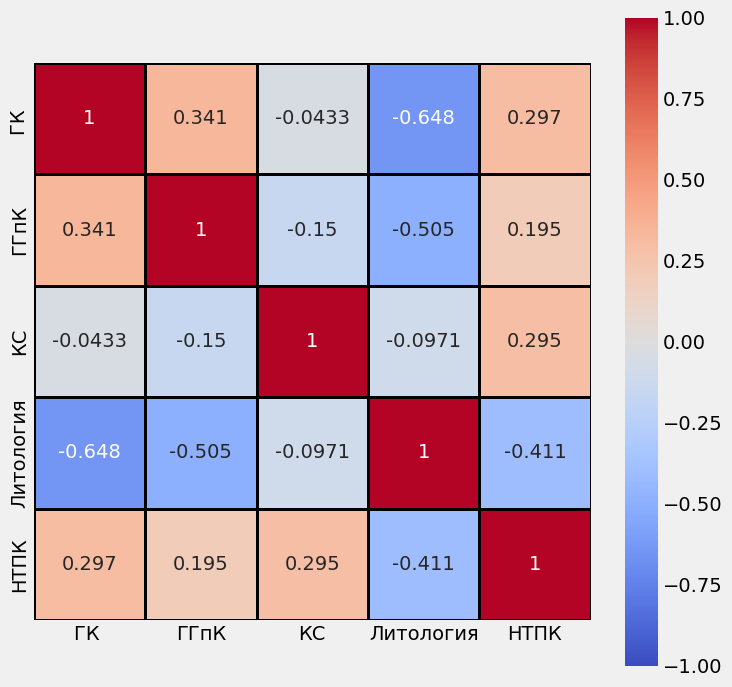

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

categorical_clmn = dataset.select_dtypes(include='object').columns
# Apply Label Encoding to each categorical column
for col in categorical_clmn:
    dataset[col] = LabelEncoder().fit_transform(dataset[col])

sns.heatmap(dataset.corr(),fmt = '.3g', square=True, annot = True,
            vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',
            linewidths=1, linecolor='black')

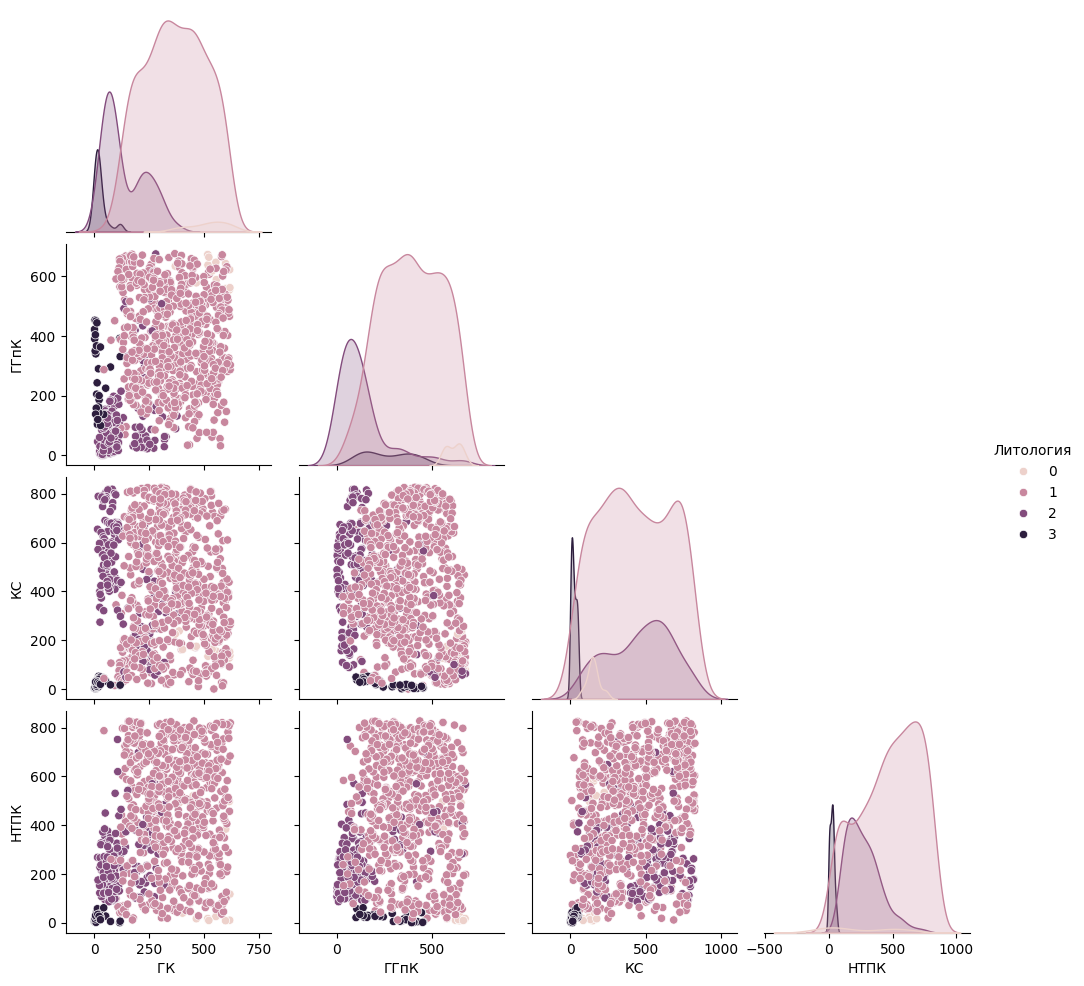

In [ ]:
sns.pairplot(data=dataset,hue='Литология', corner=True)

In [ ]:
# dataset.dtypes

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Select numerical columns (float64 and int64 types)
numerical_columns = ['ГК ', 'ГГпК', 'КС']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

print(X)

          ГК       ГГпК        КС  Литология
0    0.743134  0.948225  0.205562          1
1    0.639742  0.945266  0.194680          1
2    0.439418  0.917160  0.175333          1
3    0.361874  0.893491  0.152358          1
4    0.258481  0.887574  0.149940          1
..        ...       ...       ...        ...
824  0.397415  0.226331  0.846433          1
825  0.413570  0.406805  0.875453          1
826  0.327948  0.520710  0.889964          1
827  0.276252  0.511834  0.897219          1
828  0.297254  0.377219  0.912938          1

[829 rows x 4 columns]


In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=int(n*0.2), random_state=0xC0FFEE)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=int(n*0.1), random_state=0xC0FFEE)

In [ ]:
X.shape, X_val.shape, X_test.shape, X_train.shape,

((829, 4), (82, 4), (165, 4), (582, 4))

 Examining the feature distributions in the training and test datasets to ensure they are similar is crucial for building models that generalize well. Differences in distributions can lead to models that perform well on training data but poorly on test data. Here are some methods to compare feature distributions.






*   KS Statistic:
  
    Definition: This is the maximum difference between the cumulative distribution functions (CDFs) of the two samples.

    Interpretation: A smaller KS statistic suggests that the distributions of the feature between the two datasets are more similar. A larger value indicates greater disparity


*   P-value:
    
    Definition: The p-value indicates the probability of observing the test results under the null hypothesis, which in this case is that the distributions of the two datasets are the same.
    
    Interpretation:
    * High P-value (typically > 0.05): There is not enough evidence to reject the null hypothesis. This suggests that the distributions of the feature in the two datasets are statistically similar.
    
    * Low P-value (typically < 0.05): There is enough evidence to reject the null hypothesis. This suggests that the distributions of the feature in the two datasets are statistically different.

*   Practical Application
    * **Similar Distributions:** If most features have low KS statistics and high p-values, you can proceed with the analysis, assuming that the training and testing datasets are drawn from similar distributions.
    
    * **Dissimilar Distributions:** If several features show high KS statistics and low p-values, this might indicate potential issues such as sample bias or non-representative training data. This could affect the model's performance and its ability to generalize to new data.




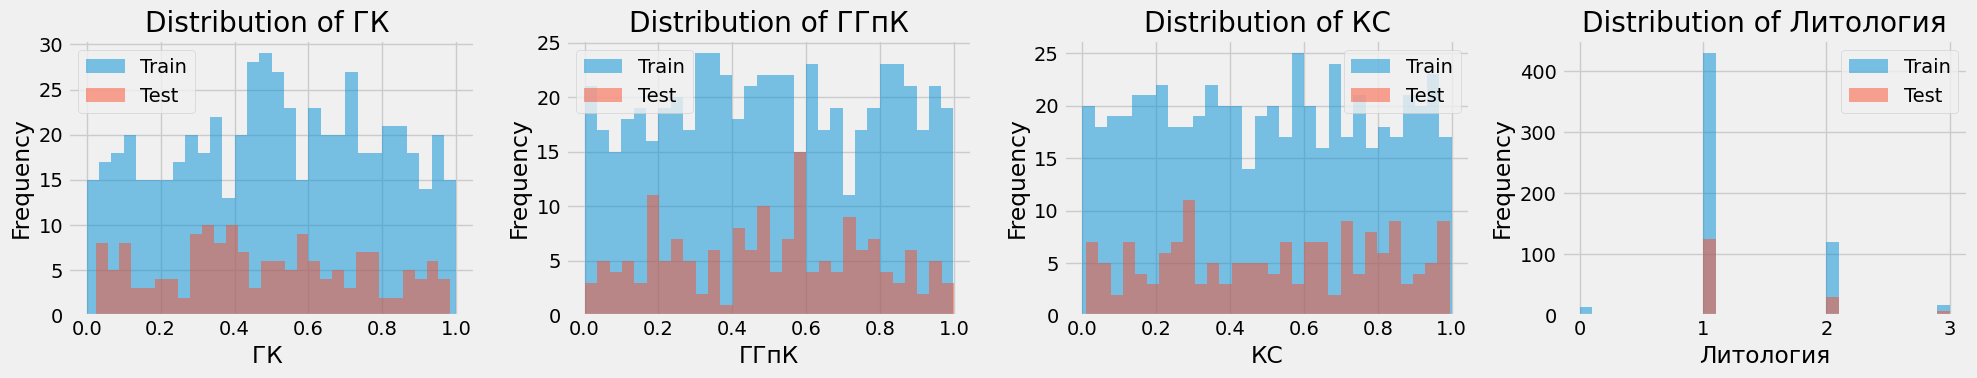

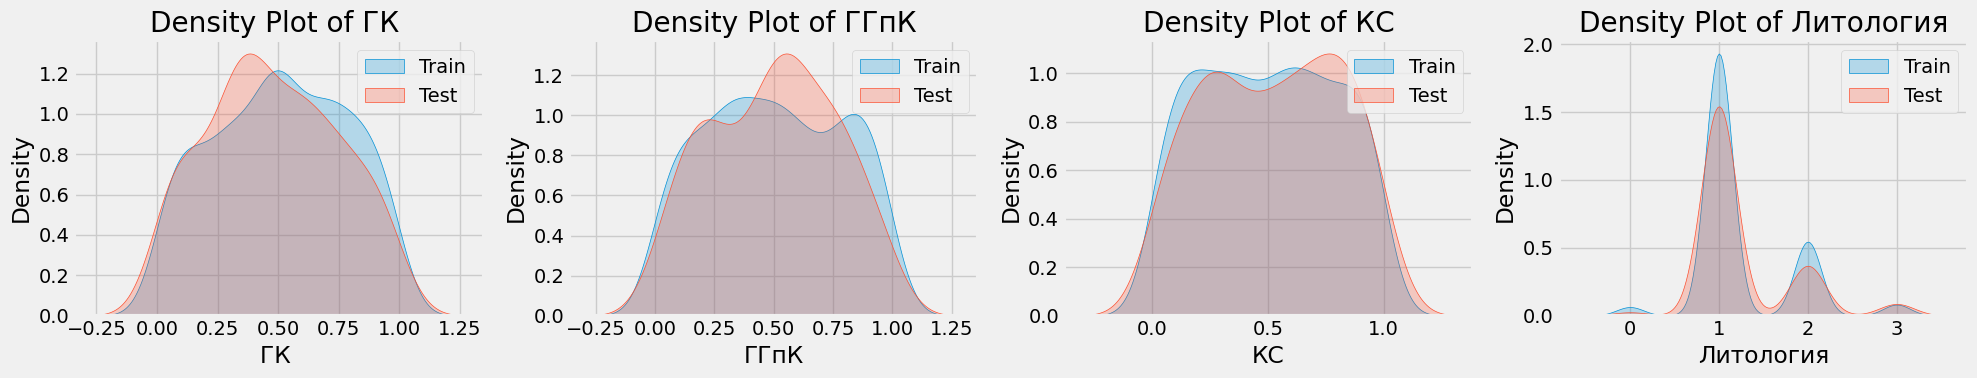

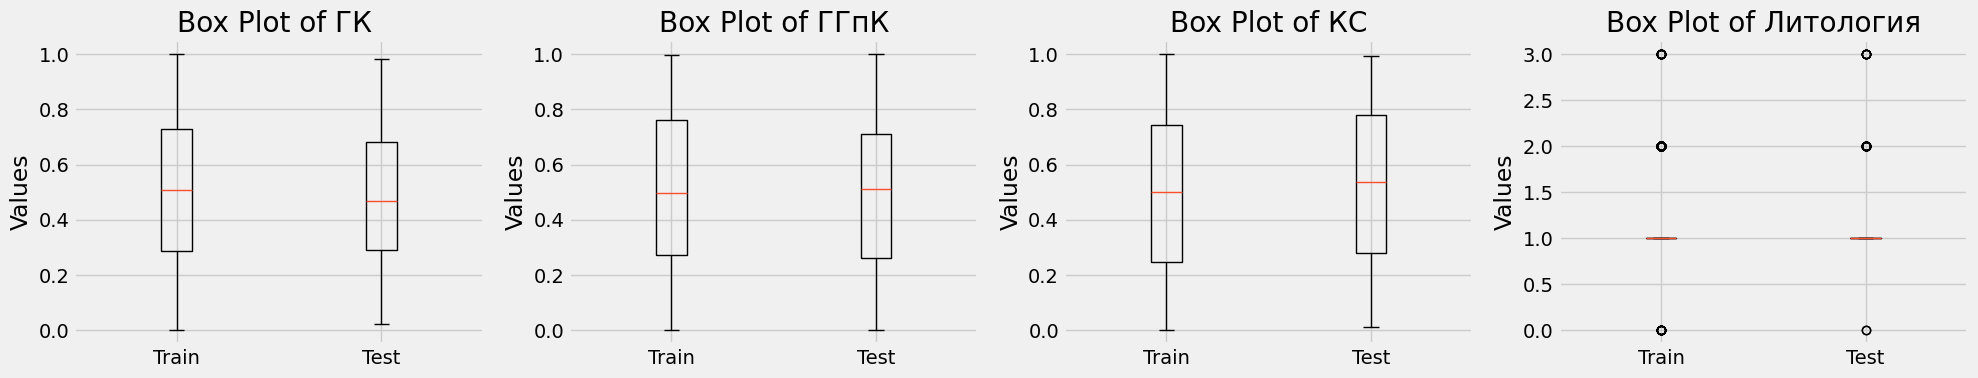

Feature: ГК , KS Statistic: 0.0992, P-value: 0.1476
Feature: ГГпК, KS Statistic: 0.0771, P-value: 0.4052
Feature: КС, KS Statistic: 0.0562, P-value: 0.7861
Feature: Литология, KS Statistic: 0.0146, P-value: 1.0000
Training Data Summary Statistics:
               ГК         ГГпК          КС   Литология
count  582.000000  582.000000  582.000000  582.000000
mean     0.509729    0.503248    0.498471    1.245704
std      0.274583    0.285564    0.289053    0.543882
min      0.000000    0.000000    0.000000    0.000000
25%      0.288368    0.271450    0.246070    1.000000
50%      0.509693    0.497041    0.502418    1.000000
75%      0.729806    0.761834    0.744559    1.000000
max      1.000000    0.998521    1.000000    3.000000

Testing Data Summary Statistics:
               ГК         ГГпК          КС   Литология
count  165.000000  165.000000  165.000000  165.000000
mean     0.479248    0.497857    0.519527    1.254545
std      0.266670    0.263375    0.289578    0.548329
min      0.024

In [ ]:
# Assuming X_train and X_test are your training and testing datasets respectively
features = X_train.columns

# Visual Inspection with Histograms
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(5 * len(features), 4))
for i, feature in enumerate(features):
    axes[i].hist(X_train[feature], bins=30, alpha=0.5, label='Train')
    axes[i].hist(X_test[feature], bins=30, alpha=0.5, label='Test')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
plt.tight_layout()
plt.show()

# Density Plots
# Density plots can also be used to compare the distributions more smoothly than histograms.
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(5 * len(features), 4))
for i, feature in enumerate(features):
    sns.kdeplot(X_train[feature], ax=axes[i], label='Train', fill=True)
    sns.kdeplot(X_test[feature], ax=axes[i], label='Test', fill=True)
    axes[i].set_title(f'Density Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].legend()
plt.tight_layout()
plt.show()

# Box Plots
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(5 * len(features), 4))
for i, feature in enumerate(features):
    axes[i].boxplot([X_train[feature], X_test[feature]], labels=['Train', 'Test'])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_ylabel('Values')
plt.tight_layout()
plt.show()

# KS Statistic:
# Definition: This is the maximum difference between the cumulative distribution functions (CDFs) of the two samples.
# Interpretation: A smaller KS statistic suggests that the distributions of the feature between the two datasets are more similar. A larger value indicates greater disparity.

# P-value:
# Definition: The p-value indicates the probability of observing the test results under the null hypothesis, which in this case is that the distributions of the two datasets are the same.
# Interpretation:
# High P-value (typically > 0.05): There is not enough evidence to reject the null hypothesis. This suggests that the distributions of the feature in the two datasets are statistically similar.
# Low P-value (typically < 0.05): There is enough evidence to reject the null hypothesis. This suggests that the distributions of the feature in the two datasets are statistically different.


# Practical Application
# Similar Distributions: If most features have low KS statistics and high p-values, you can proceed with the analysis, assuming that the training and testing datasets are drawn from similar distributions.
# Dissimilar Distributions: If several features show high KS statistics and low p-values, this might indicate potential issues such as sample bias or non-representative training data. This could affect the model's performance and its ability to generalize to new data.


# Statistical Tests
from scipy.stats import ks_2samp
for feature in features:
    stat, p_value = ks_2samp(X_train[feature], X_test[feature])
    print(f'Feature: {feature}, KS Statistic: {stat:.4f}, P-value: {p_value:.4f}')

# Summary Statistics
summary_train = X_train.describe()
summary_test = X_test.describe()
print("Training Data Summary Statistics:\n", summary_train)
print("\nTesting Data Summary Statistics:\n", summary_test)

Conclusion: All features show high p-values and relatively low KS statistics, suggesting that the distributions of these features in the training and testing datasets are statistically similar. This indicates good consistency and reliability for model training, as it suggests that the model's performance on the training data may generalize well to the testing data

In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming X_train, y_train, X_val, y_val, X_test, y_test are defined

RMSE_validation, RMSE_test, RMSE_train = [], [], []
R2_validation, R2_test, R2_train = [], [], []
MAE_validation, MAE_test, MAE_train = [], [], []
model_name = []

# List of models to evaluate
models_list = [
    RandomForestRegressor(random_state=0xC0FFEE),
    ExtraTreesRegressor(random_state=0xC0FFEE),
    xgb.XGBRegressor(random_state=0xC0FFEE),
    LinearRegression(),
    Ridge(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(random_state=0xC0FFEE),  # Added Gradient Boosting
    CatBoostRegressor(silent=True, random_state=0xC0FFEE),  # Added CatBoost
]

# Parameter grids for each model
p_g1 = {
    'n_estimators': np.arange(2, 200, 20),
    'min_samples_split': np.arange(2, 20, 2)
}

p_g2 = p_g1  # Same as p_g1 for simplicity

p_g3 = {
    'n_estimators': np.arange(2, 200, 20),
    "learning_rate": np.linspace(0.005, 1, 10)
}

p_g4 = {  # Linear Regression has no hyperparameters to tune
}

p_g5 = {  # Ridge Regression parameters
    'alpha': np.logspace(-3, 3, 7),  # Regularization strength
}

p_g6 = {  # KNeighbors Regressor parameters
    'n_neighbors': np.arange(1, 21),   # Number of neighbors
    'weights': ['uniform', 'distance'], # Weight function used in prediction
}

p_g7 = {  # Decision Tree Regressor parameters
    'max_depth': [None] + list(np.arange(1, 11)),   # Maximum depth of the tree
    'min_samples_split': np.arange(2, 21),           # Minimum number of samples required to split an internal node
}

p_g8 = {  # Gradient Boosting parameters
    'n_estimators': np.arange(50, 301, 50),          # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2, 0.5],                # Step size shrinkage used in update to prevents overfitting
    'max_depth': np.arange(2, 12, 2),                           # Maximum depth of the individual regression estimators
}

p_g9 = {  # CatBoost parameters (basic)
    'iterations': [50, 100, 150, 200],              # Number of boosting iterations
    'learning_rate': np.logspace(-3, 0, 5),                     # Learning rate for boosting steps
    'depth': np.arange(2, 12, 2),                                  # Depth of the tree
}

params_list = [p_g1, p_g2, p_g3, p_g4, p_g5, p_g6, p_g7, p_g8, p_g9]

# Model training and evaluation loop
for reg, grid in zip(models_list, params_list):
    model_name.append(type(reg).__name__)
    gs = GridSearchCV(reg, param_grid=grid, n_jobs=-1, cv=5,
                       scoring='neg_mean_squared_error')

    gs.fit(X_train, y_train)

    best_reg = reg.__class__(**gs.best_params_)

    print(f'{type(reg).__name__}: Best Params: {gs.best_params_}')

    # Evaluate using cross-validation on the training set
    cv_results = gs.cv_results_
    best_score = np.min(cv_results['mean_test_score'])

    print(f'Cross-validated MSE: {-best_score:.2f}')

    best_reg.fit(X_train, y_train)

    y_pred_val = best_reg.predict(X_val)
    y_pred_train = best_reg.predict(X_train)
    y_pred_test = best_reg.predict(X_test)

    # Validation metrics
    print('Validation MSE:', round(mean_squared_error(y_pred_val, y_val), 2))
    print('Validation R^2:', round(r2_score(y_val, y_pred_val), 2))
    print('Validation MAE:', round(mean_absolute_error(y_val, y_pred_val), 2))

    RMSE_validation.append(round(mean_squared_error(y_pred_val, y_val), 2))
    R2_validation.append(round(r2_score(y_val, y_pred_val), 2))
    MAE_validation.append(round(mean_absolute_error(y_val, y_pred_val), 2))

    # Training metrics
    print('Train MSE:', round(mean_squared_error(y_pred_train, y_train), 2))
    print('Train R^2:', round(r2_score(y_train, y_pred_train), 2))
    print('Train MAE:', round(mean_absolute_error(y_train, y_pred_train), 2))

    RMSE_train.append(round(mean_squared_error(y_pred_train, y_train), 2))
    R2_train.append(round(r2_score(y_train, y_pred_train), 2))
    MAE_train.append(round(mean_absolute_error(y_train, y_pred_train), 2))

    # Test metrics
    print('Test MSE:', round(mean_squared_error(y_pred_test, y_test), 2))
    print('Test R^2:', round(r2_score(y_test, y_pred_test), 2))

    RMSE_test.append(round(mean_squared_error(y_pred_test, y_test), 2))
    R2_test.append(round(r2_score(y_test, y_pred_test), 2))
    MAE_test.append(round(mean_absolute_error(y_test, y_pred_test), 2))

    print(' ')

RandomForestRegressor: Best Params: {'min_samples_split': 10, 'n_estimators': 102}
Cross-validated MSE: 0.21
Validation MSE: 0.11
Validation R^2: 0.38
Validation MAE: 0.23
Train MSE: 0.05
Train R^2: 0.73
Train MAE: 0.17
Test MSE: 0.2
Test R^2: 0.24
 
ExtraTreesRegressor: Best Params: {'min_samples_split': 12, 'n_estimators': 122}
Cross-validated MSE: 0.19
Validation MSE: 0.07
Validation R^2: 0.59
Validation MAE: 0.2
Train MSE: 0.07
Train R^2: 0.65
Train MAE: 0.19
Test MSE: 0.2
Test R^2: 0.23
 
XGBRegressor: Best Params: {'learning_rate': 0.11555555555555556, 'n_estimators': 22}
Cross-validated MSE: 0.21
Validation MSE: 0.1
Validation R^2: 0.44
Validation MAE: 0.24
Train MSE: 0.07
Train R^2: 0.68
Train MAE: 0.19
Test MSE: 0.19
Test R^2: 0.26
 
LinearRegression: Best Params: {}
Cross-validated MSE: 0.17
Validation MSE: 0.12
Validation R^2: 0.34
Validation MAE: 0.27
Train MSE: 0.16
Train R^2: 0.21
Train MAE: 0.3
Test MSE: 0.19
Test R^2: 0.26
 
Ridge: Best Params: {'alpha': 1.0}
Cross-vali

In [ ]:
evaluation = pd.DataFrame({
    'Model': model_name,
    'Validation RMSE': RMSE_validation,
    'Validation R^2': R2_validation,
    'Validation MAE': MAE_validation,
    'Train RMSE': RMSE_train,
    'Train R^2': R2_train,
    'Train MAE': MAE_train,
    'Test RMSE': RMSE_test,
    'Test R^2': R2_test,
    'Test MAE': MAE_test
})

print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


Model  Validation RMSE  Validation R^2  Validation MAE  \
0      RandomForestRegressor             0.11            0.38            0.23   
1        ExtraTreesRegressor             0.07            0.59            0.20   
2               XGBRegressor             0.10            0.44            0.24   
3           LinearRegression             0.12            0.34            0.27   
4                      Ridge             0.12            0.34            0.27   
5        KNeighborsRegressor             0.08            0.57            0.21   
6      DecisionTreeRegressor             0.13            0.27            0.27   
7  GradientBoostingRegressor             0.10            0.47            0.23   
8          CatBoostRegressor             0.09            0.51            0.23   

   Train RMSE  Train R^2  Train MAE  Test RMSE  Test R^2  Test MAE  
0        0.05       0.73       0.17       0.20      0.24      0.31  
1        0.07       0.65       0.19       0.20      0.23      0.31  
2        0.07       0.68       0.19       0.19      0.26      0.31  
3        0.16       0.21       0.30       0.19      0.26      0.30  
4        0.16       0.21       0.30       0.19      0.26      0.30  
5        0.00       1.00       0.00       0.19      0.27      0.30  
6        0.13       0.38       0.26       0.20      0.25      0.31  
7        0.09       0.57       0.23       0.20      0.23      0.31  
8        0.10       0.54       0.23       0.20      0.25      0.30

# Feature importance

1.   (by Random Forest - XGB)
2.   List item



In [ ]:
# CatBoostRegressor: Best Params: {'depth': 8, 'iterations': 100, 'learning_rate': 1.0}

КС: 22.86139421491926
Литология: 22.035006514781397
ГК : 20.987674877540982
ГГпК: 17.683141977928113
ПС: 16.432782414830235


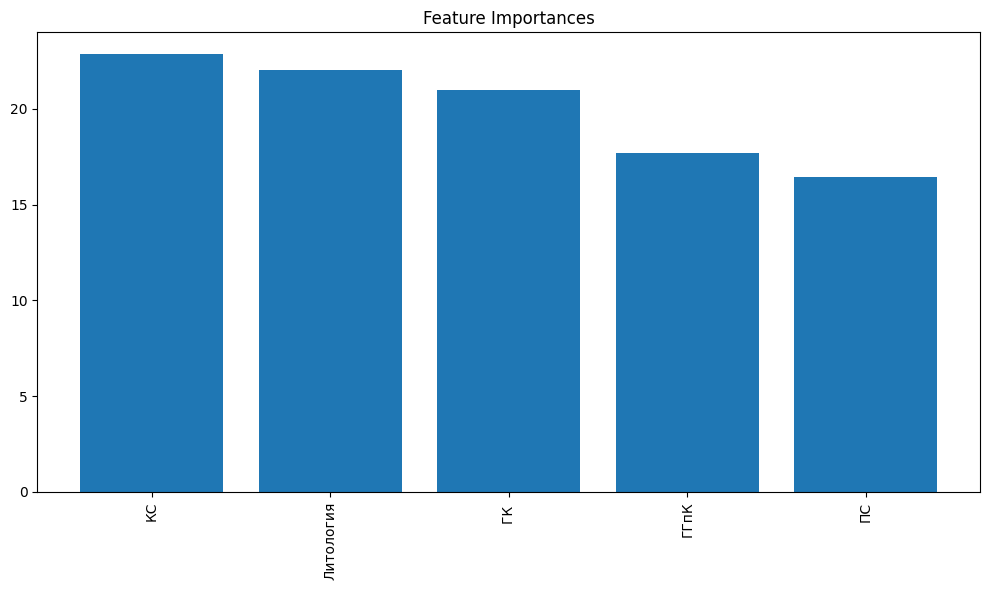

In [ ]:
from catboost import CatBoostRegressor, Pool

# Initialize the CatBoostRegressor with specified best parameters
model = CatBoostRegressor(silent=True, random_state=0xC0FFEE, depth=10, iterations=200, learning_rate=0.1)

# Fit model
model.fit(X_train, y_train)

# Get feature importance
feature_importances = model.get_feature_importance(type='PredictionValuesChange')
feature_names = X_train.columns

# Print feature importances
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print(f"{name}: {score}")

# Sorting the feature importances
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

Test R^2: 0.37


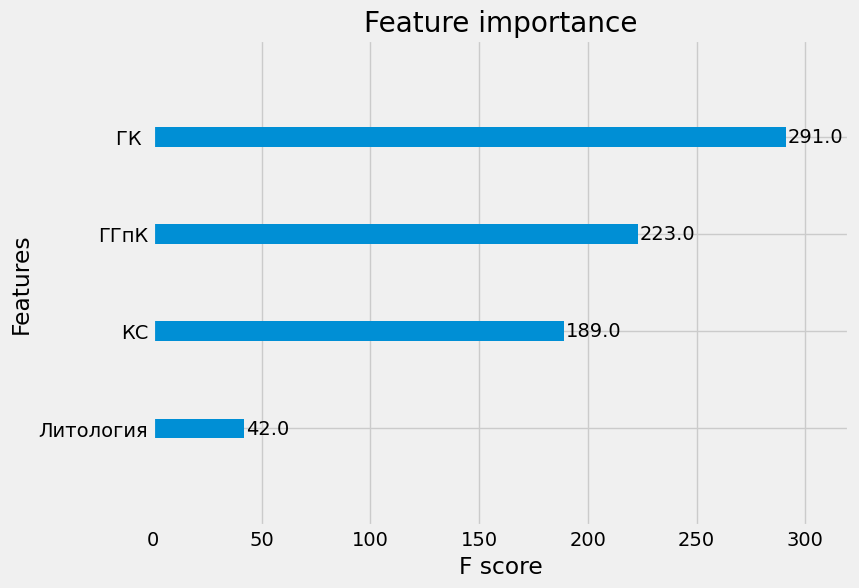

Pearson correlation coefficient (R): 0.783


(1.5, 4.0)

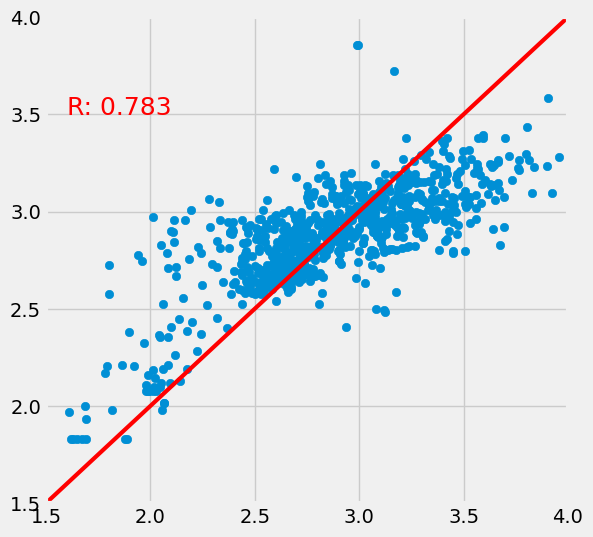

In [ ]:
# the feature importance for xgb!
from xgboost import plot_importance


best_xgb_regressor=xgb.XGBRegressor(
                          learning_rate = 0.115,
                          n_estimators  = 22,
                          eval_metric='rmse')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
best_xgb_regressor.fit(X_train, y_train)
predictions = best_xgb_regressor.predict(X_test)
print('Test R^2:', round(r2_score(y_test, predictions), 2))

# plot
# plt.style.use('fivethirtyeight')
# plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize=(8,6))
plot_importance(best_xgb_regressor, max_num_features=5, ax=ax)
plt.show();


# prediction for the whole dataset
y_pred = best_xgb_regressor.predict(X)

fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(y, y_pred)

x_line = np.linspace(1.5, 4, 100)
y_line = x_line
plt.plot(x_axis, x_line, color='red', label='Regression Line', lw=3)
corr, _ = pearsonr(y, y_pred)
print(f'Pearson correlation coefficient (R): {corr:.3f}')

# Add correlation coefficient to the plot
ax.text(1.6, 3.5, f'R: {corr:.3f}', fontsize=18, color='red')

plt.xlim(1.5, 4)
plt.ylim(1.5, 4)

## Best model

In [ ]:
result_new

Глубина Литология    ГК       ГГпК      ПС       КС  Lithology Index  \
0        12.8    Гнейсы  17.27     37.18  3.6066   474.61          0         
1        12.9    Гнейсы  16.55  37.31333  3.6258    416.4          0         
2        13.0    Гнейсы  17.76    36.765  3.7374   452.74          0         
3        13.3    Гнейсы  20.77  37.88667  3.7362   511.12          0         
4        13.4    Гнейсы  21.58  37.17333  3.8441    443.1          0         
...       ...       ...    ...       ...     ...      ...        ...   ...   
1076    163.6    Гнейсы  22.32    32.135  4.4133  2747.14          0         
1077    163.8    Гнейсы   22.5    33.155  4.0983  2904.53          0         
1078    163.9    Гнейсы  21.41    33.695  3.9994  2989.96          0         
1079    164.0    Гнейсы  20.49  33.65333  3.8284  3060.61          0         
1080    164.1    Гнейсы   20.9  32.99333  3.6754  3224.52          0         

        Color  
0     #bebebe  
1     #bebebe  
2     #bebebe  
3     #bebebe  
4     #bebebe  
...       ...  
1076  #bebebe  
1077  #bebebe  
1078  #bebebe  
1079  #bebebe  
1080  #bebebe  

[1081 rows x 9 columns]

In [ ]:
result_new_full = pd.DataFrame()
new_dataframe = result_new_full

new_depths = np.arange(12.8, 164.101, 0.001)

interpolation(result_new['Глубина'], result_new['ГК '], new_dataframe, new_depths) # ГК
interpolation(result_new['Глубина'], result_new['ГГпК'], new_dataframe, new_depths) # ГГпК
interpolation(result_new['Глубина'], result_new['ПС'], new_dataframe, new_depths) # ПС
interpolation(result_new['Глубина'], result_new['КС'], new_dataframe, new_depths) # КС

# interpolated_df_full.drop(['Depth_TC'], axis=1, inplace=True)
# interpolated_df_full.rename(columns={'TC filt tri': 'TC initial'}, inplace=True)
result_new_full

Глубина      ГК        ГГпК        ПС         КС
0        12.800  17.2700  37.180000  3.606600   474.6100
1        12.801  17.2628  37.181333  3.606792   474.0279
2        12.802  17.2556  37.182667  3.606984   473.4458
3        12.803  17.2484  37.184000  3.607176   472.8637
4        12.804  17.2412  37.185333  3.607368   472.2816
...         ...      ...        ...       ...        ...
151296  164.096  20.8836  33.019730  3.681520  3217.9636
151297  164.097  20.8877  33.013130  3.679990  3219.6027
151298  164.098  20.8918  33.006530  3.678460  3221.2418
151299  164.099  20.8959  32.999930  3.676930  3222.8809
151300  164.100  20.9000  32.993330  3.675400  3224.5200

[151301 rows x 5 columns]

In [ ]:
path_to_ser = Path(output_file)
data_initial_lithology = pd.read_excel(path_to_ser, sheet_name='Lithology', skiprows=0)
data_lithology = data_initial_lithology.copy()

In [ ]:
lithology = data_lithology[['Кровля', 'Подошва','Литология']].dropna()

In [ ]:
interpolated_result_new_full_lith = pd.merge(
    lit_func(lithology, result_new_full),
    result_new_full ,
    on='Глубина',
    how='inner'
)

In [ ]:
interpolated_result_new_full_lith.columns

Index(['Глубина', 'Литология', 'ГК ', 'ГГпК', 'ПС', 'КС'], dtype='object')

In [ ]:
X_full = interpolated_result_new_full_lith[['ГК ', 'ГГпК', 'ПС', 'КС', 'Литология']]
# y_full = interpolated_df_lith['TC initial']

In [ ]:
categorical_clmn = X_full.select_dtypes(include='object').columns
# Apply Label Encoding to each categorical column
for col in categorical_clmn:
    X_full[col] = LabelEncoder().fit_transform(X_full[col])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = ['ГК ', 'ГГпК', 'ПС', 'КС']
X_full[numerical_columns] = scaler.fit_transform(X_full[numerical_columns])
print(X_full)

             ГК       ГГпК        ПС        КС  Литология
0       0.355601  0.577730  0.226897  0.084310          1
1       0.355391  0.577826  0.226938  0.084157          1
2       0.355181  0.577922  0.226978  0.084004          1
3       0.354971  0.578019  0.227018  0.083850          1
4       0.354761  0.578115  0.227059  0.083697          1
...          ...       ...       ...       ...        ...
151296  0.461015  0.276915  0.242643  0.807260          1
151297  0.461135  0.276437  0.242322  0.807691          1
151298  0.461254  0.275960  0.242000  0.808123          1
151299  0.461374  0.275483  0.241678  0.808555          1
151300  0.461494  0.275006  0.241357  0.808987          1

[151301 rows x 5 columns]


In [ ]:
X_train.shape

(458, 5)

In [ ]:
# Define the parameter grid based on previous setup
# param_grid = {
#     'learning_rate': [0.0316],
#     'max_depth': [6],
#     'n_estimators': [200]
# }

param_grid = {
    'learning_rate': [0.1],
    'depth': [10],
    'iterations': [200]
}

# best_model = GradientBoostingRegressor(random_state=0xC0FFEE)
best_model = CatBoostRegressor(silent=True, random_state=0xC0FFEE)

# Setup GridSearchCV
gs = GridSearchCV(best_model, param_grid=param_grid, n_jobs=-1, cv=5, scoring='neg_mean_squared_error')
gs.fit(X_val, y_val)  # Fit on validation set, or use another appropriate subset

# Extract the best parameters and fit on the entire dataset
best_params = gs.best_params_
best_model.fit(X_train, y_train)  # Fit on the entire dataset
print(best_params)


# Predict the values of y
y_pred = best_model.predict(X)
y_pred_full = best_model.predict(X_full)


# y_pred_val = best_extra_trees.predict(X_val)
# y_pred_train = best_extra_trees.predict(X_train)
# y_pred_test = best_extra_trees.predict(X_test)

# print(len(y_pred_val), len(y_pred_train), len(y_pred_test))

{'depth': 8, 'iterations': 100, 'learning_rate': 1.0}


### DataFrame with the predicted TC, litology and depth

In [ ]:
dataset_predicted = pd.DataFrame()

# dataset_predicted[['Глубина', 'Литология', 'НТПК']] =  data_set[['Глубина', 'Литология', 'НТПК']]
# dataset_predicted[['Литология', 'TC']] =  data_set[['Глубина', 'Литология', 'TC']]

dataset_predicted[['Литология', 'TC']] =  data_set[['Литология', 'TC']]
dataset_predicted['Predicted TC'] = y_pred
dataset_predicted['Глубина'] = work_layers_initial_new['Глубина']
dataset_predicted['Diff, %'] = ((dataset_predicted['TC'] - dataset_predicted['Predicted TC'])/dataset_predicted['TC'])*100

dataset_predicted

Литология        TC  Predicted TC  Глубина   Diff, %
0         Гнейсы  2.752760      2.609559   36.525  5.202091
1         Гнейсы  2.752708      2.609481   36.526  5.203109
2         Гнейсы  2.752665      2.609481   36.527  5.201649
3         Гнейсы  2.752687      2.617097   36.528  4.925755
4         Гнейсы  2.752713      2.624844   36.529  4.645197
...          ...       ...           ...      ...       ...
128449    Гнейсы  2.806873      2.821506  164.974 -0.521355
128450    Гнейсы  2.806968      2.821506  164.975 -0.517957
128451    Гнейсы  2.807056      2.821506  164.976 -0.514790
128452    Гнейсы  2.807137      2.821506  164.977 -0.511894
128453    Гнейсы  2.807213      2.821506  164.978 -0.509162

[128454 rows x 5 columns]

Pearson correlation coefficient (R): 0.992


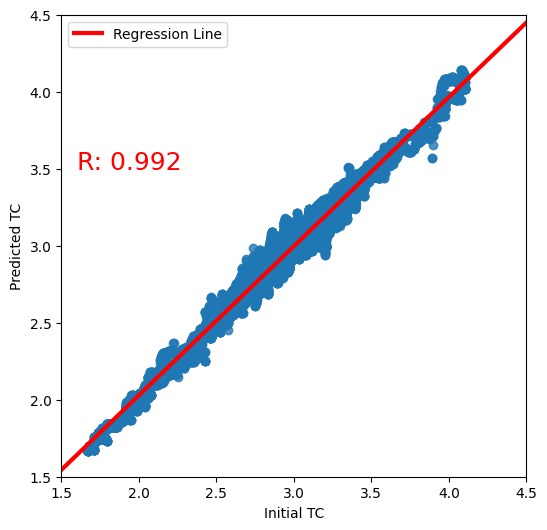

In [ ]:
from scipy.stats import pearsonr

y_initial = dataset_predicted["TC"].astype(float)
# y_initial = dataset_predicted["НТПК"].astype(float)
y_pred = dataset_predicted['Predicted TC']

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(y_initial, y_pred, alpha=0.8)
ax.set_xlim(1.5, 4.5)
ax.set_ylim(1.5, 4.5)

# Fit a linear regression line
coefficients = np.polyfit(y_initial, y_pred, 1)
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(1.5, 6, 100)
y_line = polynomial(x_axis)
ax.plot(x_axis, y_line, color='red', label='Regression Line', lw=3)

# Calculate Pearson correlation coefficient
corr, _ = pearsonr(y_initial, y_pred)
print(f'Pearson correlation coefficient (R): {corr:.3f}')

# Add correlation coefficient to the plot
ax.text(1.6, 3.5, f'R: {corr:.3f}', fontsize=18, color='red')

ax.set_xlabel('Initial TC')
ax.set_ylabel('Predicted TC')
ax.legend()

plt.show()

Pearson correlation coefficient (R): 0.992


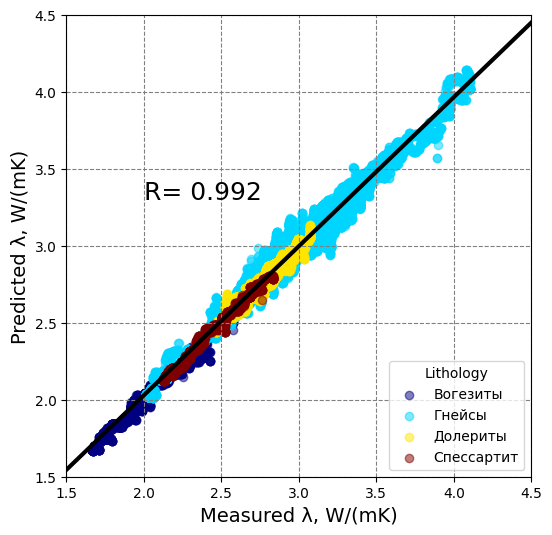

In [ ]:
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

# Assuming dataset_predicted is already defined and includes 'НТПК', 'Predicted TC', and 'Литология'
y_initial = dataset_predicted["TC"].astype(float)
y_pred = dataset_predicted['Predicted TC']
lithology = dataset_predicted['Литология']

# Apply Label Encoding to lithology
le = LabelEncoder()
lithology_encoded = le.fit_transform(lithology)
unique_lithology = le.classes_

# Create a color map with a jet colormap
colors = plt.cm.jet(np.linspace(0, 1, len(unique_lithology)))
color_map = dict(zip(unique_lithology, colors))

fig, ax = plt.subplots(figsize=(6,6))

# Plot each lithology type with a different color
for lith in unique_lithology:
    mask = lithology == lith
    ax.scatter(y_initial[mask], y_pred[mask], alpha=0.5, color=color_map[lith],
               label=lith)

# Fit a linear regression line
coefficients = np.polyfit(y_initial, y_pred, 1)
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(1.5, 4.5, 100)
y_line = polynomial(x_axis)
ax.plot(x_axis, y_line, color='black', lw=3)

# Calculate Pearson correlation coefficient
corr, _ = pearsonr(y_initial, y_pred)
print(f'Pearson correlation coefficient (R): {corr:.3f}')

# Add correlation coefficient to the plot
ax.text(2, 3.3, f'R= {corr:.3f}', fontsize=18, color='black')

ax.set_xlabel('Measured λ, W/(mK)', fontsize=14)
ax.set_ylabel('Predicted λ, W/(mK)', fontsize=14)
ax.set_xlim(1.5, 4.5)
ax.set_ylim(1.5, 4.5)
ax.grid(color='gray', linestyle='--')
ax.legend(title='Lithology', loc='lower right')

plt.show()

In [ ]:
data_tc_filtered

Depth_TC TC filt tri
0        30.525    2.809183
1        30.526    2.808834
2        30.527    2.808649
3        30.528    2.808604
4        30.529    2.808745
...         ...         ...
97762   164.974    2.806873
97763   164.975    2.806968
97764   164.976    2.807056
97765   164.977    2.807137
97766   164.978    2.807213

[97767 rows x 2 columns]

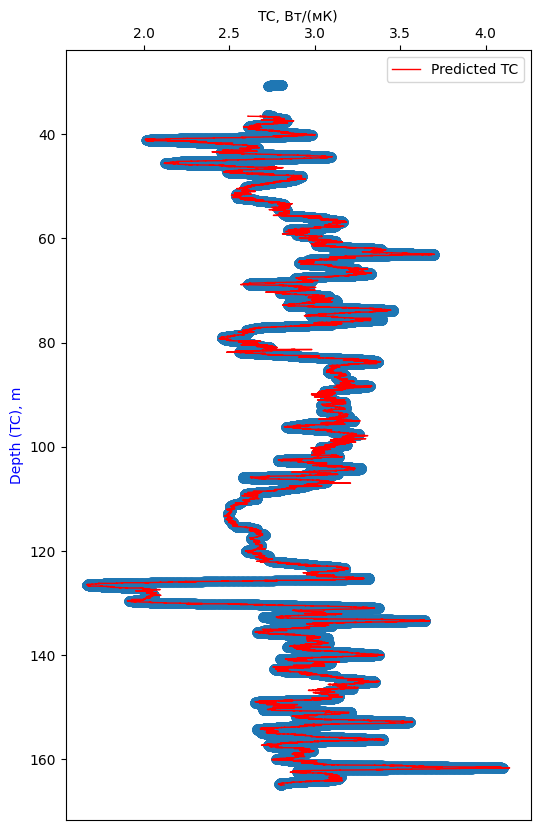

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 10))

# Data for the first plot
# x1, y1 = data_set["НТПК"], data_set["Глубина"]

x1, y1 = dataset_predicted["TC"], dataset_predicted["Глубина"]
ax1.plot(x1, y1, 'b-', label='Measured TC', lw=1)


x1, y1 = y_pred, dataset_predicted["Глубина"]
ax1.plot(x1, y1, 'r-', label='Predicted TC', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')

# x1, y1 = y_pred_full, work_layers_initial["Глубина"]
# ax1.plot(x1, y1, 'r-', label='Predicted TC', lw=1)
# ax1.set_ylabel('Depth (TC), m', color='b')


# # Data for the first plot
# x1, y1 = thermal_logs_scaled['TC initial'], thermal_logs_scaled["Глубина"]
# # x1, y1 = thermal_logs['TC avg'], thermal_logs['Depth TC avg']
# ax1.plot(x1, y1, 'b-', label='Measured TC', lw=1)

# x1, y1 = y_pred, work_layers_initial["Глубина"]
# ax1.plot(x1, y1, 'r-', label='Predicted TC', lw=1)


ax1.set_ylabel('Depth (TC), m', color='b')

ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')
ax1.legend()

plt.show()

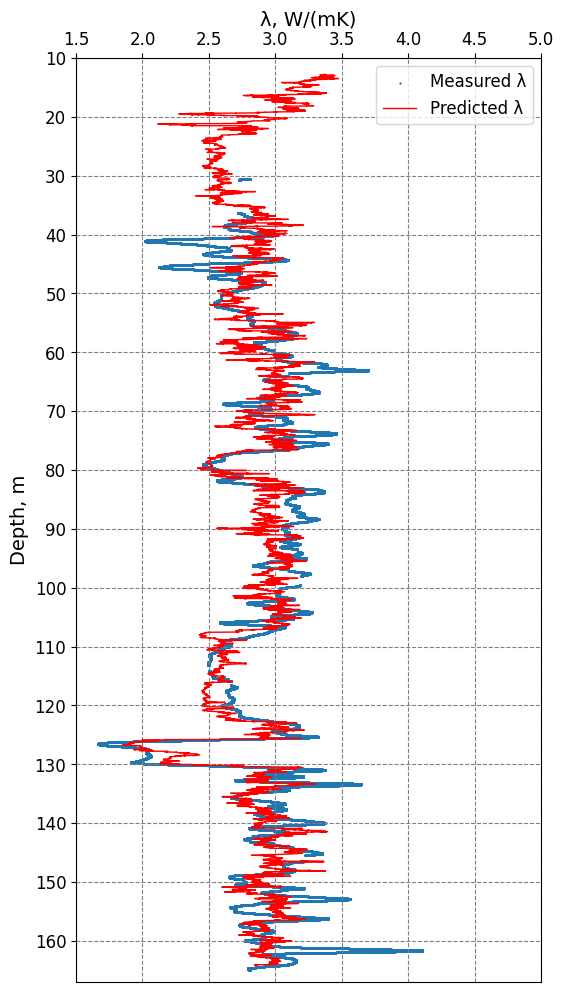

In [ ]:
# Assuming data_set, y_pred, y_pred_full, and work_layers_initial are defined

X_full = interpolated_df_lith[['ГК ', 'ГГпК', 'ПС', 'КС', 'Литология']]
y_full = interpolated_df_lith['TC initial']

fig, ax1 = plt.subplots(figsize=(6, 12))

# Data for the first plot
window_parm = 8

# Ensure data is in the correct format
measured_tc = pd.to_numeric(interpolated_df_lith['TC initial'], errors='coerce')
measured_depth = pd.to_numeric(interpolated_df_lith["Глубина"], errors='coerce')

y_pred = pd.Series(y_pred)
y_pred_full_series = pd.Series(y_pred_full)

# Rolling mean for measured TC
x1 =  data_tc_filtered['TC filt tri']
y1 = data_tc_filtered['Depth_TC']
ax1.scatter(x1, y1, marker='o', s=0.5, label='Measured λ')

x2 = y_pred_full_series
y2 = interpolated_result_new_full_lith['Глубина']
ax1.plot(x2, y2, 'r-', label='Predicted λ', lw=1)

# Set labels and grid
ax1.set_ylabel('Depth, m', fontsize=14)
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('λ, W/(mK)', fontsize=14)
ax1.grid(color='gray', linestyle='--')

# Set axis limits and ticks
ax1.set_xlim(1.5, 5)
ax1.set_ylim(10, 167)
ax1.set_yticks(np.arange(10, 165, 10))
ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top

# Increase font size for tick labels
ax1.tick_params(axis='both', which='major', labelsize=12)

# Set legend with increased font size
ax1.legend(fontsize=12)

plt.show()

KeyError: 'НТПК'

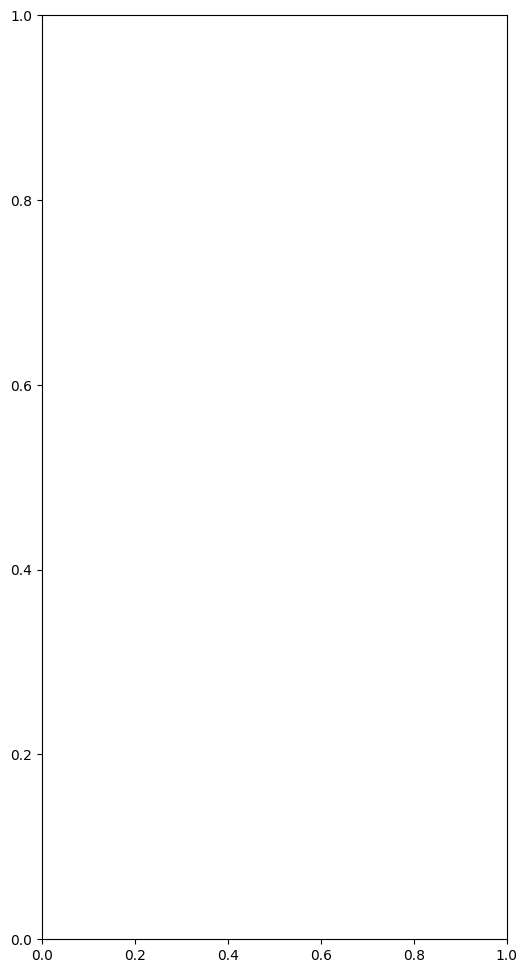

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming data_set, y_pred, y_pred_full, and work_layers_initial are defined

fig, ax1 = plt.subplots(figsize=(6, 12))

# Data for the first plot
window_parm = 8

# Ensure data is in the correct format
data_set["НТПК"] = pd.to_numeric(data_set["НТПК"], errors='coerce')
data_set["Глубина"] = pd.to_numeric(data_set["Глубина"], errors='coerce')

y_pred = pd.Series(y_pred)
y_pred_full_series = pd.Series(y_pred_full)

# Rolling mean for measured TC
x1 = data_set["НТПК"].rolling(window=window_parm).mean()
y1 = data_set["Глубина"].rolling(window=window_parm).mean()
ax1.plot(x1, y1, 'b-', label='Measured λ', lw=2)

# Rolling mean for predicted TC (full prediction)
x3 = y_pred_full_series.rolling(window=window_parm).mean()
work_layers_initial_series = pd.Series(work_layers_initial["Глубина"])
y3 = work_layers_initial_series.rolling(window=window_parm).mean()
ax1.plot(x3, y3, 'r-', label='Predicted λ', lw=2)

# Set labels and grid
ax1.set_ylabel('Depth, m', fontsize=14)
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('λ, W/(mK)', fontsize=14)
ax1.grid(color='gray', linestyle='--')

# Set axis limits and ticks
ax1.set_xlim(1.5, 5)
ax1.set_ylim(10, 165)
ax1.set_yticks(np.arange(10, 165, 10))
ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top

# Increase font size for tick labels
ax1.tick_params(axis='both', which='major', labelsize=12)

# Set legend with increased font size
ax1.legend(fontsize=12)

plt.show()

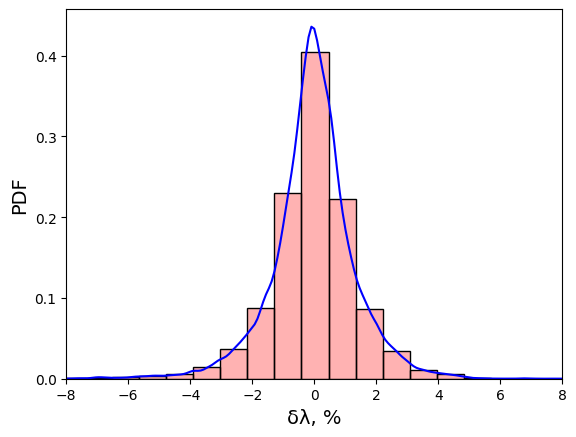

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming x1, x2 are defined and data_set is available
# x1 = data_set["НТПК"]
x2 = y_pred
x3 = dataset_predicted['Diff, %']

fig, ax = plt.subplots()

# Normalized histogram
sns.histplot(x3, bins=20, ax=ax, stat="density", color="red", alpha=0.3)
sns.kdeplot(x3, ax=ax, color="blue")
ax.set_xlim(-8, 8)
# ax.legend()
ax.set_xlabel('δλ, %', fontsize=14)
ax.set_ylabel('PDF', fontsize=14)
plt.show()

TypeError: can't get common type for non-numeric array

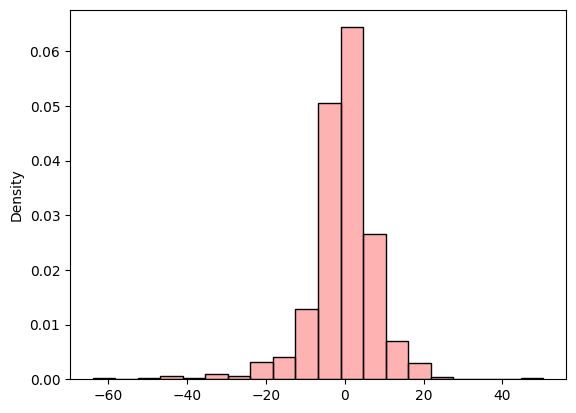

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde

# Assuming x1, x2 are defined and data_set is available
x1 = data_set["НТПК"]
x2 = y_pred
x3 = (x1 - x2) / x1 * 100

fig, ax = plt.subplots()

# Normalized histogram
sns.histplot(x3, bins=20, ax=ax, stat="density", color="red", alpha=0.3, label='ML Normalized Histogram')

# KDE plot
kde = gaussian_kde(x3)
x_vals = np.linspace(min(x3), max(x3), 5000)
kde_vals = kde(x_vals)
ax.plot(x_vals, kde_vals, color="blue", label='ML KDE')

# Calculate the 2.5th and 97.5th percentiles to cover 95% of the distribution
lower_bound, upper_bound = np.percentile(x3, [2.5, 97.5])

# Highlight the 95% of the distribution
x_fill = np.linspace(lower_bound, upper_bound, 300)
y_fill = kde(x_fill)
ax.fill_between(x_fill, y_fill, color='green', alpha=0.2, label='95% of Distribution')

ax.legend()

ax.set_xlabel('δλ, %')
ax.set_xlim(-60, 60)

# Show the plot
plt.show()

In [ ]:
data_set

Глубина  Diff, % Литология  Predicted TC
0      100       10     Type1      2.757541
1      200       15     Type2      2.718215
2      300       10     Type3      2.854340
3      400        5     Type4      2.771642

In [ ]:
data_set['Predicted TC'] = y_pred
data_set['Diff, %'] = ((data_set['НТПК'] - y_pred)/data_set['НТПК'])*100
data_set



KeyError: 'НТПК'

In [ ]:
data_set.columns

Index(['Глубина', 'Diff, %', 'Литология'], dtype='object')

In [ ]:
Index(['Глубина', 'ГК ', 'ГГпК', 'ПС', 'КС', 'Литология', 'НТПК', 'Lithology',
       'Index', 'Color', 'Predicted TC', 'Diff, %'],
      dtype='object')

In [ ]:
data_set_new = data_set[['Глубина', 'Diff, %', 'Литология']]

In [ ]:
data_set_new

Глубина  Diff, % Литология
0      100       10     Type1
1      200       15     Type2
2      300       10     Type3
3      400        5     Type4

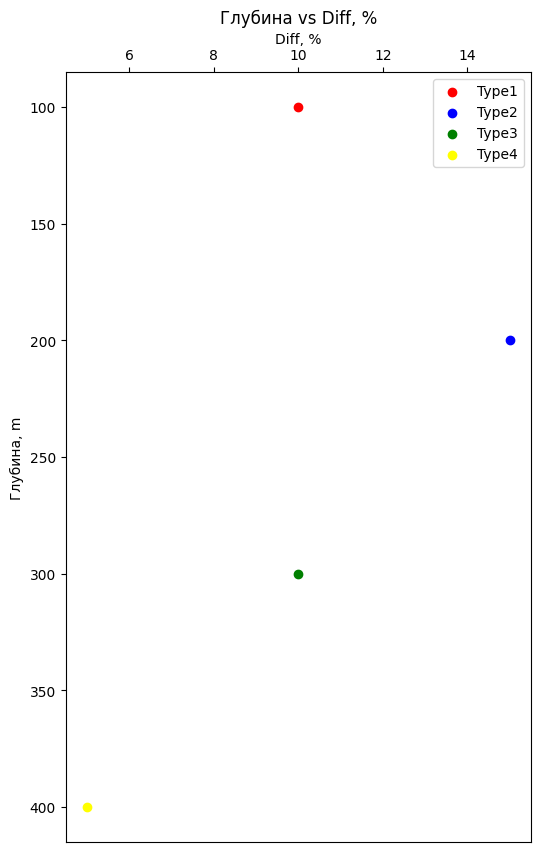

In [ ]:

# Assuming data_set is your DataFrame and it's already loaded
# Example data_set creation for demonstration (you should use your actual DataFrame)
data_set_new = data_set[['Глубина', 'Diff, %', 'Литология']]

# Mapping of lithology types to colors
color_map = {
    'Type1': 'red',
    'Type2': 'blue',
    'Type3': 'green',
    'Type4': 'yellow'
}

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(6, 10))

# Scatter plot
for lithology, color in color_map.items():
    # Select data for each lithology
    subset = data_set_new [data_set_new ['Литология'] == lithology]
    ax.scatter(subset['Diff, %'], subset['Глубина'], color=color, label=lithology)

# Set labels and title
ax.set_xlabel('Diff, %')
ax.set_ylabel('Глубина, m')
ax.set_title('Глубина vs Diff, %')

# Invert the y-axis to have depth increase downwards
ax.invert_yaxis()

# Move the x-axis to the top
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

# Add a legend
ax.legend()

# Show the plot
plt.show()

### Merge data

In [ ]:
merged_data = pd.merge(
    data[['TC, Вт/(мК)', 'Depth (TC), m']],
    data[['ГК, мкР/час', 'Глубина (ГК),м']],
    left_on='Depth (TC), m',
    right_on='Глубина (ГК),м',
    how='inner'
)

In [ ]:
merged_data = merged_data.dropna(subset=['TC, Вт/(мК)'])
merged_data.drop(columns=['Глубина (ГК),м'], inplace=True)

In [ ]:
merged_data = pd.merge(
    merged_data,
    data[['ГГК-п имп/мин', 'Глубина (ГГК-п), м']],
    left_on='Depth (TC), m',
    right_on='Глубина (ГГК-п), м',
    how='inner'
)

merged_data.drop(columns=['Глубина (ГГК-п), м'], inplace=True)


# Rename columns for clarity if necessary
merged_data.rename(columns={
    'TC, Вт/(мК)': 'TC Value',
    'ГК, мкР/час': 'ГК Value',
    'ГГК-п имп/мин': 'ГГК-п Value',
    'Depth (TC), m': 'Common Depth'
}, inplace=True)

merged_data

TC Value  Common Depth  ГК Value  ГГК-п Value
0    2.815388          37.1     21.82     35620.00
1    2.666176          38.2     28.83     36133.33
2    2.598122          38.6     24.24     35565.00
3    2.623626          38.7     24.42     35685.00
4    2.627114          39.2     22.39     36366.67
..        ...           ...       ...          ...
545  3.129074         163.3     21.05     32780.00
546  3.136196         163.7     22.99     32540.00
547  3.134156         163.8     22.50     33155.00
548  3.153052         163.9     21.41     33695.00
549  3.141634         164.0     20.49     33653.33

[550 rows x 4 columns]

### Lithology

In [ ]:
lithology = data[['Кровля', 'Подошва','Литология']].dropna()

In [ ]:
def lit_func(lithology, merged_data):

  corresponding_lit = pd.DataFrame(columns=['Common Depth', 'Lithology'])

  for index, row in merged_data.iterrows():
      common_depth = row['Common Depth']
      mask = (lithology['Кровля'] <= common_depth) & (lithology['Подошва'] >= common_depth)
      filtered_lithology = lithology[mask]
      # print(common_depth, filtered_lithology )

      # if not filtered_lithology.empty:

      for _, lit_row in filtered_lithology.iterrows():
          new_row = pd.DataFrame({
              'Common Depth': [common_depth],
              'Lithology': [lit_row['Литология']]
          })
          corresponding_lit = pd.concat([corresponding_lit, new_row], ignore_index=True)

  return corresponding_lit

In [ ]:
result_new = pd.merge(
    lit_func(lithology, merged_data),
    merged_data,
    left_on='Common Depth',
    right_on='Common Depth',
    how='inner'
)

In [ ]:
result_new.columns

Index(['Common Depth', 'Lithology', 'TC Value', 'ГК Value', 'ГГК-п Value'], dtype='object')

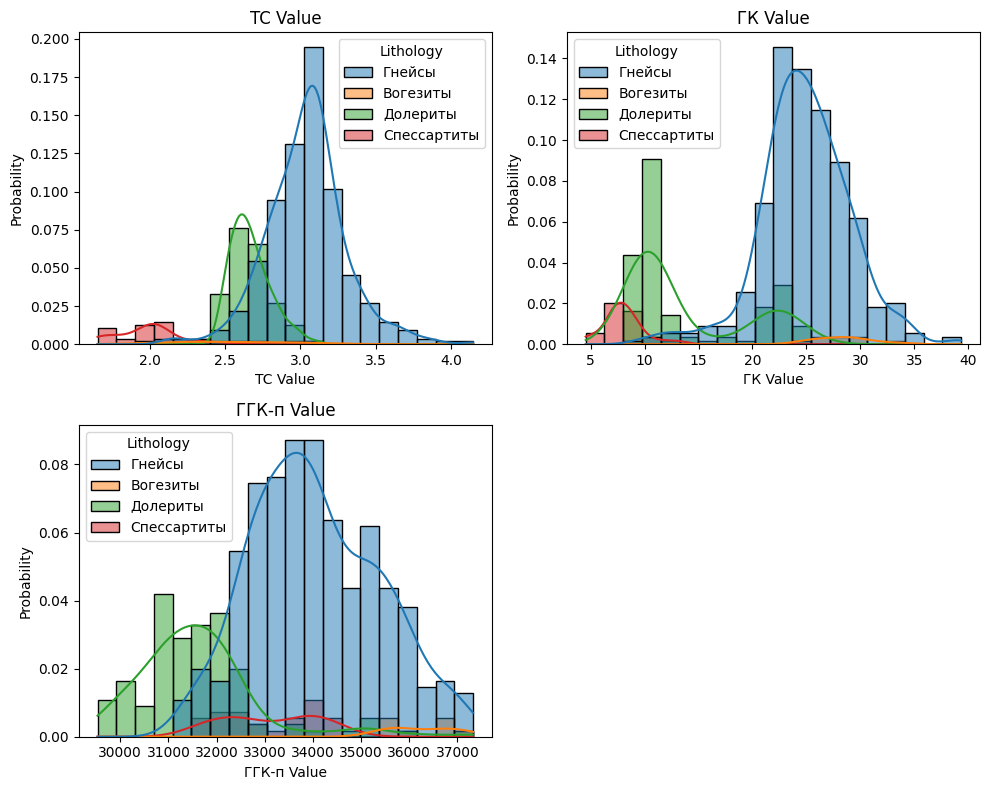

In [ ]:
# Assuming 'data' is your DataFrame and it's already defined

fig = plt.figure(figsize=(10, 8))

parameters_list = [ 'TC Value',
                   'ГК Value',
                   'ГГК-п Value'
]

# Calculate appropriate subplot grid size
rows = 2
cols = (len(parameters_list) + 1) // rows

for index, param in enumerate(parameters_list):
    ax = plt.subplot(rows, cols, index + 1)
    sns.histplot(data=result_new, x=param, hue='Lithology', stat="probability", kde=True, bins=20)
    plt.title(f'{param}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

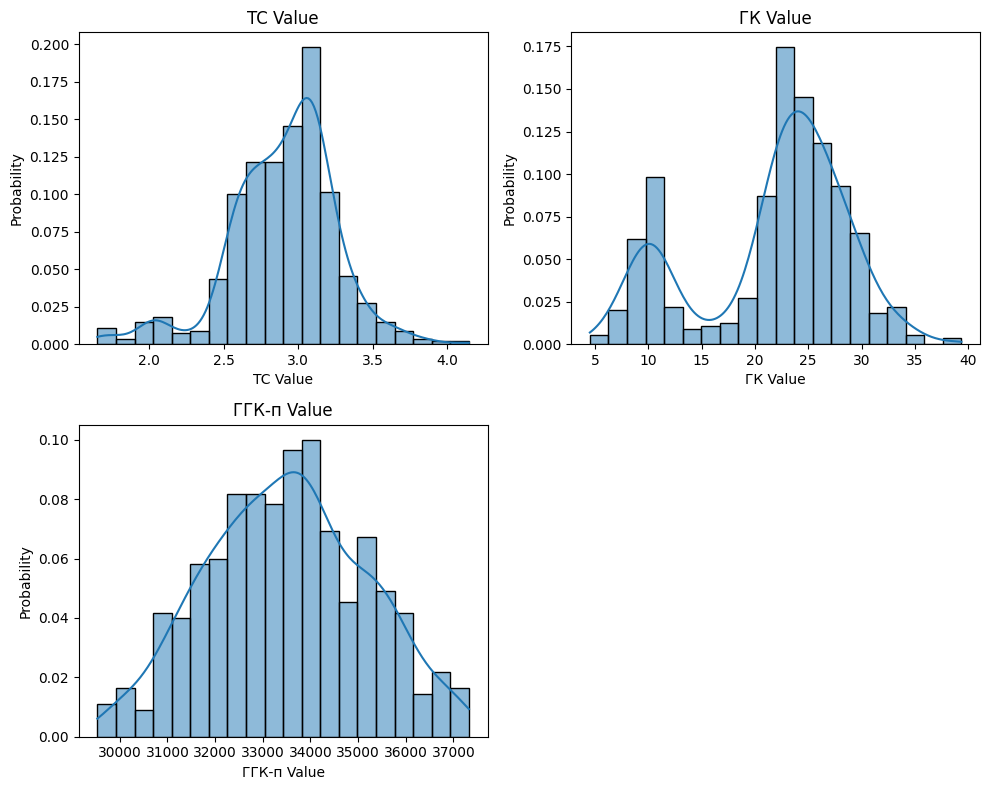

In [ ]:
# Assuming 'data' is your DataFrame and it's already defined

fig = plt.figure(figsize=(10, 8))

parameters_list = [ 'TC Value',
                   'ГК Value',
                   'ГГК-п Value'
]

# Calculate appropriate subplot grid size
rows = 2
cols = (len(parameters_list) + 1) // rows

for index, param in enumerate(parameters_list):
    ax = plt.subplot(rows, cols, index + 1)
    sns.histplot(data=result_new, x=param, stat="probability", kde=True, bins=20)
    plt.title(f'{param}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

In [ ]:
result_new.columns

Index(['Common Depth', 'Lithology', 'TC Value', 'ГК Value', 'ГГК-п Value'], dtype='object')

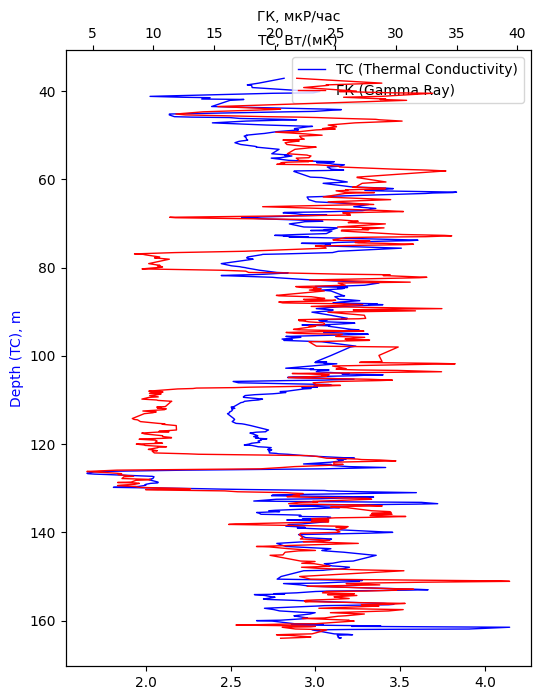

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 8))

data = result_new

# Data for the first plot
x1, y1 = data["TC Value"], data["Common Depth"]
ax1.plot(x1, y1, 'b-', label='TC (Thermal Conductivity)', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')
ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')

# Create a second x-axis for the second plot
ax2 = ax1.twiny()  # This creates a new x-axis that shares the y-axis with ax1
x2, y2 = data["ГК Value"], data["Common Depth"]
ax2.plot(x2, y2, 'r-', label='ГК (Gamma Ray)', lw=1)
ax2.set_xlabel('ГК, мкР/час')

# Set y-axis label for the second plot (optional if you want separate y-axis labels)
ax2.set_ylabel('Глубина (ГК),м', color='r')

# Add legends to the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

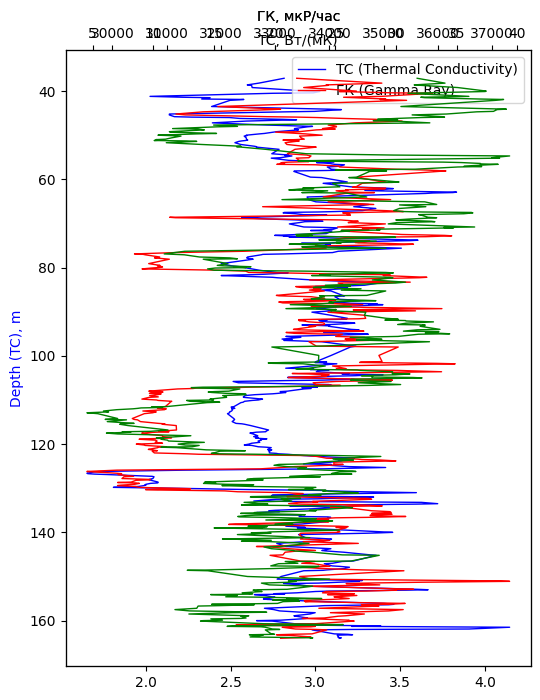

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 8))

data = merged_data

# Data for the first plot
x1, y1 = data["TC Value"], data["Common Depth"]
ax1.plot(x1, y1, 'b-', label='TC (Thermal Conductivity)', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')
ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')

# Create a second x-axis for the second plot
ax2 = ax1.twiny()  # This creates a new x-axis that shares the y-axis with ax1
x2, y2 = data["ГК Value"], data["Common Depth"]
ax2.plot(x2, y2, 'r-', label='ГК (Gamma Ray)', lw=1)
ax2.set_xlabel('ГК, мкР/час')

# Set y-axis label for the second plot (optional if you want separate y-axis labels)
ax2.set_ylabel('Глубина (ГК),м', color='r')

ax3 = ax1.twiny()  # This creates a new x-axis that shares the y-axis with ax1
x3, y3 = data["ГГК-п Value"], data["Common Depth"]
ax3.plot(x3, y3, 'g-', label='ГК (Gamma Ray)', lw=1)
ax3.set_xlabel('ГК, мкР/час')

# Add legends to the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

In [ ]:
X = result_new.drop('TC Value', axis=1)
y = result_new["TC Value"]
n = len(X)

Label encoding and normalization

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_clmn = X.select_dtypes(include='object').columns
# Apply Label Encoding to each categorical column
for col in categorical_clmn:
    X[col] = LabelEncoder().fit_transform(X[col])

<Axes: >

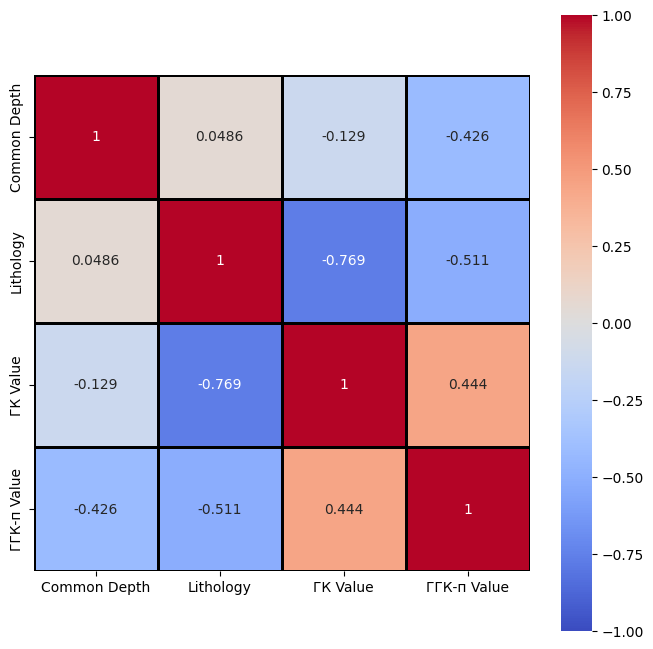

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(X.corr(),fmt = '.3g', square=True, annot = True,
            vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',
            linewidths=1, linecolor='black')

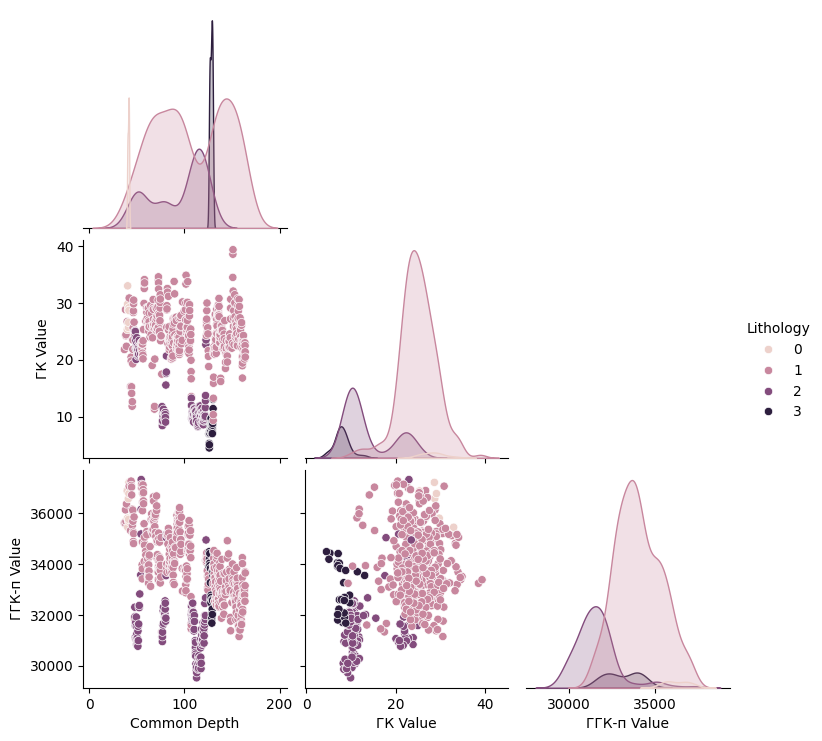

In [ ]:
sns.pairplot(data=X,hue='Lithology', corner=True)

In [ ]:
# Normalization of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_name = X.select_dtypes(include='float64')
X_numerical = X[['Common Depth', 'ГК Value', 'ГГК-п Value']]
X[list(columns_name)] = scaler.fit_transform(X_numerical[list(columns_name)])

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=int(n*0.15), random_state=0xC0FFEE)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=int(n*0.15), random_state=0xC0FFEE)

In [ ]:
X.shape

(550, 4)

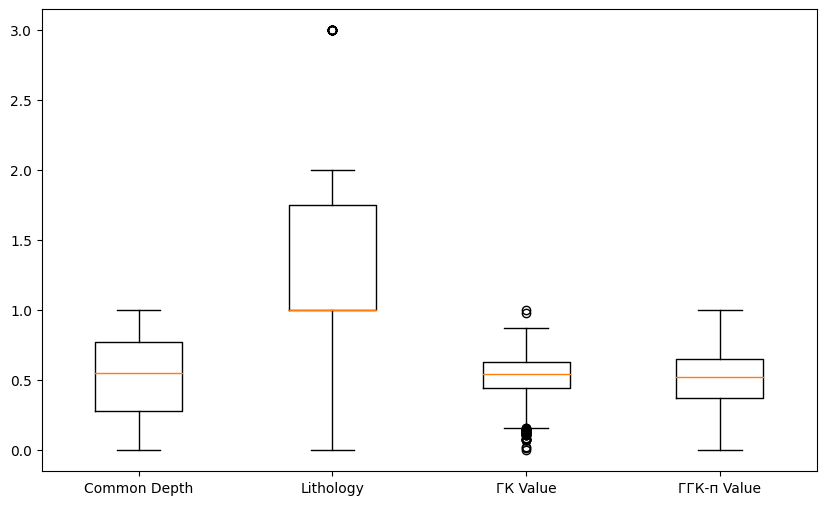

RandomForestRegressor:
Train mse: 0.02
Train R^2: 0.88
Validation: 0.04
Validation R^2: 0.5
Test: 0.03
Test  R^2: 0.77
{'max_features': 2, 'min_samples_split': 8, 'n_estimators': 10} 

ExtraTreesRegressor:
Train mse: 0.01
Train R^2: 0.91
Validation: 0.03
Validation R^2: 0.57
Test: 0.03
Test  R^2: 0.7
{'max_features': 3, 'min_samples_split': 6, 'n_estimators': 4} 

XGBRegressor:
Train mse: 0.04
Train R^2: 0.68
Validation: 0.04
Validation R^2: 0.39
Test: 0.03
Test  R^2: 0.65
{'learning_rate': 0.5025, 'max_depth': 1, 'n_estimators': 27} 

LinearRegression:
Train mse: 0.08
Train R^2: 0.44
Validation: 0.06
Validation R^2: -0.18
Test: 0.04
Test  R^2: 0.19
{} 

Ridge:
Train mse: 0.08
Train R^2: 0.44
Validation: 0.06
Validation R^2: -0.19
Test: 0.04
Test  R^2: 0.17
{} 

KNeighborsRegressor:
Train mse: 0.03
Train R^2: 0.79
Validation: 0.05
Validation R^2: 0.35
Test: 0.03
Test  R^2: 0.75
{} 

DecisionTreeRegressor:
Train mse: 0.0
Train R^2: 1.0
Validation: 0.05
Validation R^2: 0.51
Test: 0.03
Te

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor



RMSE_validation, RMSE_test = [], []
R2_validation, R2_test = [], []
model_name = []

plt.figure(figsize=(10, 6))

# Assuming X_train is defined and is a DataFrame
data = [X_train[i] for i in X_train.columns]

plt.boxplot(data, labels=X_train.columns)
plt.show()

models_list = [
    RandomForestRegressor(random_state=0xC0FFEE),
    ExtraTreesRegressor(random_state=0xC0FFEE),
    xgb.XGBRegressor(random_state=0xC0FFEE),
    LinearRegression(),
    Ridge(),
    KNeighborsRegressor(),
    DecisionTreeRegressor()
]

# names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
#          'K Neighbors Regressor', 'Decision Tree Regressor',
#          'Random Forest Regressor', 'Gradient Boosting Regressor',
#          'Adaboost Regressor']
# models = [LinearRegression(), Ridge(), Lasso(),
#           KNeighborsRegressor(), DecisionTreeRegressor(),
#           RandomForestRegressor(), GradientBoostingRegressor(),
#           AdaBoostRegressor()]

# Ensure that the range for max_features is valid
min_features = min(1, X_train.shape[1])
max_features = max(1, X_train.shape[1])

p_g1 = {
    'max_features': np.arange(min_features, max_features + 1),
    'n_estimators': np.linspace(2, 10, 4, dtype=int),
    'min_samples_split': np.arange(2, 10, 2),
}

p_g2 = {
    'max_features': np.arange(min_features, max_features + 1),
    'n_estimators': np.linspace(2, 10, 4, dtype=int),
    'min_samples_split': np.arange(2, 10, 2),
}

p_g3 = {
    "max_depth": np.arange(min_features, max_features + 1),
    'n_estimators': np.linspace(2, 40, 4, dtype=int),
    "learning_rate": np.linspace(0.005, 1 , 5),
}

p_g4 = {
}



params_list = [p_g1, p_g2, p_g3, p_g4, p_g4, p_g4, p_g4]

for reg, grid in zip(models_list, params_list):

    model_name.append(type(reg).__name__)

  # search for the optimal hyperparameters
    gs = GridSearchCV(reg, param_grid=grid, n_jobs=-1)
    gs.fit(X_val, y_val)
    best_reg = reg.__class__(**gs.best_params_)
    print(f'{type(reg).__name__}:')


  # use these values for our hyperparameters in the final calculation
    best_reg.fit(X_train, y_train)
    y_pred = best_reg.predict(X_train)
    print('Train mse:', mean_squared_error(y_pred, y_train).round(2))
    print('Train R^2:', r2_score(y_train, y_pred).round(2))

    y_pred = best_reg.predict(X_val)
    print('Validation:', mean_squared_error(y_pred, y_val).round(2))
    print('Validation R^2:', r2_score(y_pred, y_val).round(2))
    RMSE_validation.append(mean_squared_error(y_pred, y_val).round(2))
    R2_validation.append(r2_score(y_pred, y_val).round(2))

    y_pred = best_reg.predict(X_test)
    print('Test:', mean_squared_error(y_pred, y_test).round(2))
    print('Test  R^2:', r2_score(y_pred, y_test).round(2))
    RMSE_test.append(mean_squared_error(y_pred,y_test).round(2))
    R2_test.append(r2_score(y_pred,y_test).round(2))
    print(gs.best_params_, '\n')

In [ ]:
evaluation = pd.DataFrame({'Model': model_name,
                           'RMSE val': RMSE_validation,
                           'R2 val': R2_validation,
                           'RMSE test': RMSE_test,
                           'R2 test': R2_test})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


Model  RMSE val  R2 val  RMSE test  R2 test
0  RandomForestRegressor      0.04    0.50       0.03     0.77
1    ExtraTreesRegressor      0.03    0.57       0.03     0.70
2           XGBRegressor      0.04    0.39       0.03     0.65
3       LinearRegression      0.06   -0.18       0.04     0.19
4                  Ridge      0.06   -0.19       0.04     0.17
5    KNeighborsRegressor      0.05    0.35       0.03     0.75
6  DecisionTreeRegressor      0.05    0.51       0.03     0.77

Train R^2: 0.65


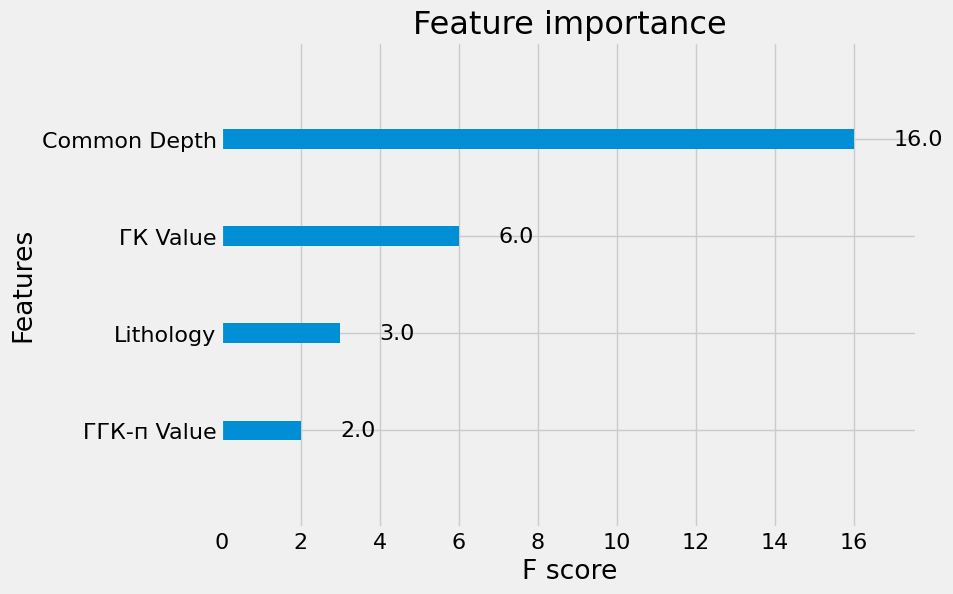

(1.5, 4.0)

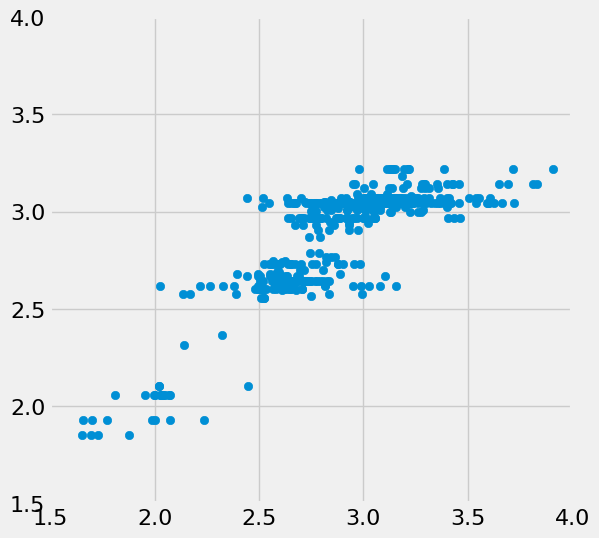

In [ ]:
best_xgb_regressor=xgb.XGBRegressor(
                          learning_rate = 0.5025,
                          n_estimators  = 27,
                          max_depth     = 1,
                          eval_metric='rmse')

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.12)
best_xgb_regressor.fit(X_train, y_train)
predictions = best_xgb_regressor.predict(X_test)
print('Train R^2:', r2_score(y_test, predictions).round(2))


# the feature importance for xgb!
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(8,6))
plot_importance(best_xgb_regressor, max_num_features=4, ax=ax)
plt.show();


# prediction for the whole dataset
y_pred = best_xgb_regressor.predict(X)

fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(y, y_pred)
plt.xlim(1.5, 4)
plt.ylim(1.5, 4)

In [ ]:

# Assuming X and y are defined and are your full dataset and targets
# Assuming X_train, X_val, y_train, y_val are subsets used for the grid search

# Define the parameter grid based on previous setup
param_grid = {
    'max_features': np.arange(min(1, X_train.shape[1]), max(1, X_train.shape[1]) + 1),
    'n_estimators': np.linspace(2, 20, 4, dtype=int),
    'min_samples_split': np.arange(2, 10, 2),
}

# Initialize the ExtraTreesRegressor with a fixed random state
# extra_trees = ExtraTreesRegressor(random_state=0xC0FFEE)
extra_trees = RandomForestRegressor(random_state=0xC0FFEE)


# Setup GridSearchCV
gs = GridSearchCV(extra_trees, param_grid=param_grid, n_jobs=-1)
gs.fit(X_val, y_val)  # Fit on validation set, or use another appropriate subset

# Extract the best parameters and fit on the entire dataset
best_params = gs.best_params_
best_extra_trees = ExtraTreesRegressor(**best_params, random_state=0xC0FFEE)
best_extra_trees.fit(X, y)  # Fit on the entire dataset
print(best_params)

# Predict the values of y
y_pred = best_extra_trees.predict(X)

{'max_features': 2, 'min_samples_split': 8, 'n_estimators': 20}


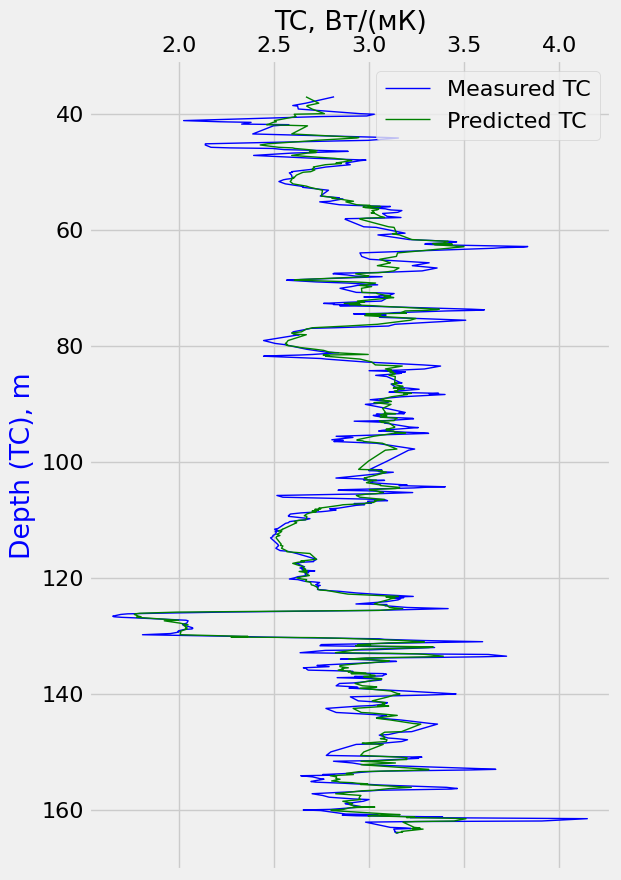

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 10))

# Data for the first plot
x1, y1 = merged_data["TC Value"], merged_data["Common Depth"]
ax1.plot(x1, y1, 'b-', label='Measured TC', lw=1)
x1, y1 = y_pred, merged_data["Common Depth"]
ax1.plot(x1, y1, 'g-', label='Predicted TC', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')

ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')
ax1.legend()

plt.show()

### Reg vs ML

In [ ]:
path_to_ser = Path('/content/Ros.xlsx')
data_reg = pd.read_excel(path_to_ser, skiprows=0)

In [ ]:
data_reg.columns

Index([6, '25-30', 'TC Exp', 'GK', 'TC pred', 'diff'], dtype='object')

In [ ]:
merged_data[10::]

TC Value  Common Depth  ГК Value  ГГК-п Value
10   2.218660          41.4     25.68     35686.67
11   2.378956          41.5     26.57     35760.00
12   2.329364          41.8     29.15     36773.33
13   2.577912          41.9     28.69     37213.33
14   2.496474          42.1     30.87     37065.00
..        ...           ...       ...          ...
545  3.129074         163.3     21.05     32780.00
546  3.136196         163.7     22.99     32540.00
547  3.134156         163.8     22.50     33155.00
548  3.153052         163.9     21.41     33695.00
549  3.141634         164.0     20.49     33653.33

[540 rows x 4 columns]

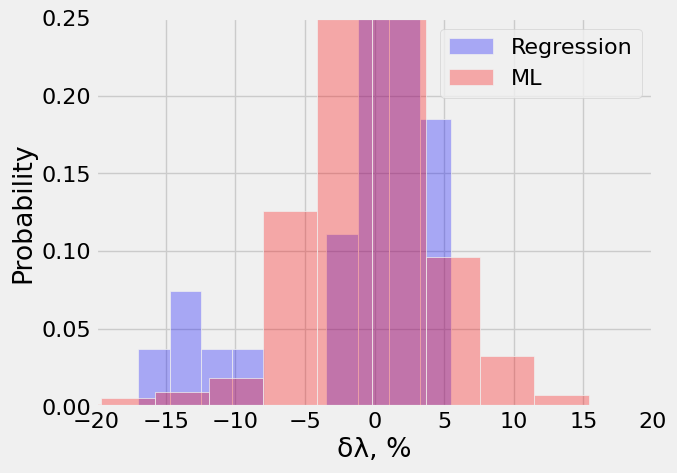

In [ ]:
fig, ax = plt.subplots()

x1 = merged_data["TC Value"]
x2 = y_pred
x3 = (x1-x2)/x1*100

# Plot both histograms on the same Axes
# sns.histplot(data=x1, bins=20, ax=ax, color="blue", label="Data X1")
sns.histplot(data=data_reg['diff'], bins=10, ax=ax, stat="probability", color="blue", alpha=0.3, label='Regression')
sns.histplot(data=x3, bins=10, ax=ax, stat="probability", color="red", alpha=0.3, label='ML')

# Add legend to distinguish the histograms
ax.legend()
ax.set_xlim(-20, 20)
ax.set_ylim(0, 0.25)

ax.set_xlabel('δλ, %')


# Show the plot
plt.show()

### Application to the whole subset

In [ ]:
path_to_ser = Path('/content/Rosatom/Data/Rosatom.xlsx')
data = pd.read_excel(path_to_ser, skiprows=0)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
new_data = data[["ГК, мкР/час", "Глубина (ГК),м", "ГГК-п имп/мин", "Глубина (ГГК-п), м"]]
new_data = new_data.dropna(subset=['ГК, мкР/час', 'ГГК-п имп/мин'])

In [ ]:
new_merged_data = pd.merge(
    new_data,
    new_data[['ГГК-п имп/мин', 'Глубина (ГГК-п), м']],
    left_on='Глубина (ГК),м',
    right_on='Глубина (ГГК-п), м',
    how='inner'
)

In [ ]:
new_merged_data

ГК, мкР/час  Глубина (ГК),м  ГГК-п имп/мин_x  Глубина (ГГК-п), м_x  \
0           11.41             1.9         52880.00                   3.7   
1           11.17             2.0         52813.33                   3.8   
2           11.66             2.1         53106.67                   3.9   
3           11.15             2.2         53235.00                   4.0   
4           10.11             2.3         53535.00                   4.1   
...           ...             ...              ...                   ...   
1609        25.39           162.8         32830.00                 164.6   
1610        24.24           162.9         32795.00                 164.7   
1611        23.08           163.0         32250.00                 164.8   
1612        21.38           163.1         31820.00                 164.9   
1613        20.15           163.2         29530.00                 165.0   

      ГГК-п имп/мин_y  Глубина (ГГК-п), м_y  
0            48640.00                   1.9  
1            50190.00                   2.0  
2            50580.00                   2.1  
3            50580.00                   2.2  
4            51220.00                   2.3  
...               ...                   ...  
1609         33106.67                 162.8  
1610         33320.00                 162.9  
1611         32930.00                 163.0  
1612         32990.00                 163.1  
1613         32525.00                 163.2  

[1614 rows x 6 columns]

In [ ]:
data_to_use = new_merged_data[['ГК, мкР/час',	'Глубина (ГК),м',	'ГГК-п имп/мин_x']]

In [ ]:
data_to_use.rename(columns={
    'Глубина (ГК),м': 'Common Depth',
    'ГГК-п имп/мин_x': 'ГГК-п Value',
    'ГК, мкР/час': 'ГК Value'
}, inplace=True)

In [ ]:
X = data_to_use.copy()
n = len(X)

In [ ]:
# Normalization of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_name = X.select_dtypes(include='float64')
X[list(columns_name)] = scaler.fit_transform(X[list(columns_name)])

In [ ]:
X

ГК Value  Common Depth  ГГК-п Value
0     0.197531       0.00000     0.581445
1     0.190640       0.00062     0.579808
2     0.204709       0.00124     0.587008
3     0.190066       0.00186     0.590158
4     0.160207       0.00248     0.597521
...        ...           ...          ...
1609  0.598909       0.99752     0.089340
1610  0.565891       0.99814     0.088481
1611  0.532587       0.99876     0.075104
1612  0.483778       0.99938     0.064550
1613  0.448464       1.00000     0.008345

[1614 rows x 3 columns]

In [ ]:

X_order = X[['Common Depth', 'ГК Value', 'ГГК-п Value']]
X_order

Common Depth  ГК Value  ГГК-п Value
0          0.00000  0.197531     0.581445
1          0.00062  0.190640     0.579808
2          0.00124  0.204709     0.587008
3          0.00186  0.190066     0.590158
4          0.00248  0.160207     0.597521
...            ...       ...          ...
1609       0.99752  0.598909     0.089340
1610       0.99814  0.565891     0.088481
1611       0.99876  0.532587     0.075104
1612       0.99938  0.483778     0.064550
1613       1.00000  0.448464     0.008345

[1614 rows x 3 columns]

In [ ]:
# Predict the values of y
y_pred = best_extra_trees.predict(X_order)

In [ ]:
y_pred.shape

(1614,)

In [ ]:
path_to_ser = Path('/content/Rosatom/Data/Rosatom.xlsx')
data = pd.read_excel(path_to_ser, skiprows=0)

In [ ]:
y = data['TC, Вт/(мК)']
yy = data["Depth (TC), m"]

In [ ]:
df_new = pd.DataFrame()
df_new['TC avg'] = data['TC, Вт/(мК)'].rolling(window=1000).mean()
df_new['Depth TC avg'] = data["Depth (TC), m"].rolling(window=1000).mean()

In [ ]:
y.shape, yy.shape

((97768,), (97768,))

In [ ]:
df_new = df_new.dropna(subset='TC avg')
df_new.shape

(96269, 2)

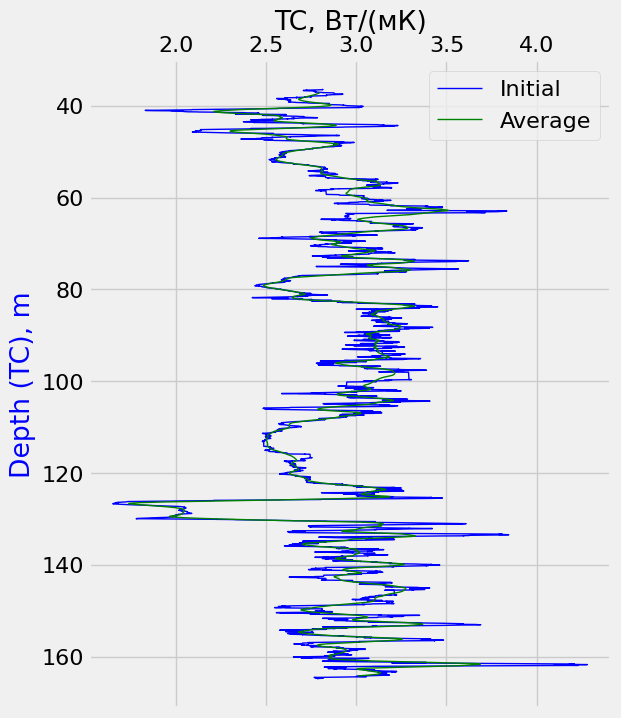

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 8))


# Data for the first plot
x1, y1 = y, yy
ax1.plot(x1, y1, 'b-', label='Initial', lw=1)

x1, y1 = df_new['TC avg'], df_new['Depth TC avg']
ax1.plot(x1, y1, 'g-', label='Average', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')

ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')
ax1.legend()

plt.show()

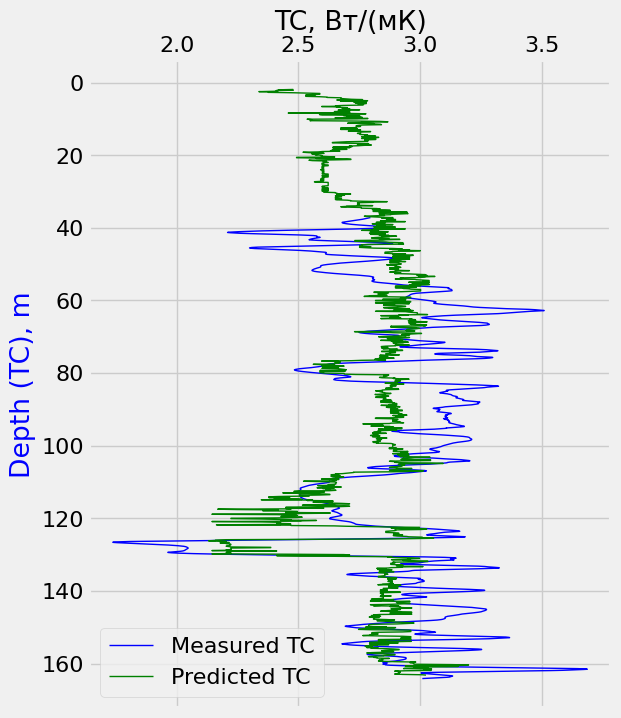

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 8))

data = merged_data

# Data for the first plot
# x1, y1 = y, yy
x1, y1 = df_new['TC avg'], df_new['Depth TC avg']
ax1.plot(x1, y1, 'b-', label='Measured TC', lw=1)
x1, y1 = y_pred, data_to_use["Common Depth"]
ax1.plot(x1, y1, 'g-', label='Predicted TC', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')

ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')
ax1.legend()

plt.show()

In [ ]:
path_to_ser = Path('/content/Rosatom/Data/Rosatom.xlsx')
data = pd.read_excel(path_to_ser, skiprows=0)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
data.columns

Index(['Sample ID', 'Depth (TC), m', 'TC, Вт/(мК)', 'Глубина (ГК),м',
       'ГК, мкР/час', 'Глубина (ГГК-п), м', 'ГГК-п имп/мин', 'Unnamed: 7',
       'Глубина (ПС), м', 'ПС', '№ образца', 'Глубина', '№ ящика', 'Интервал',
       'Top, m', 'Bot, m', 'L, m', 'Lcorr', 'Примечание',
       'Литологическое описание'],
      dtype='object')

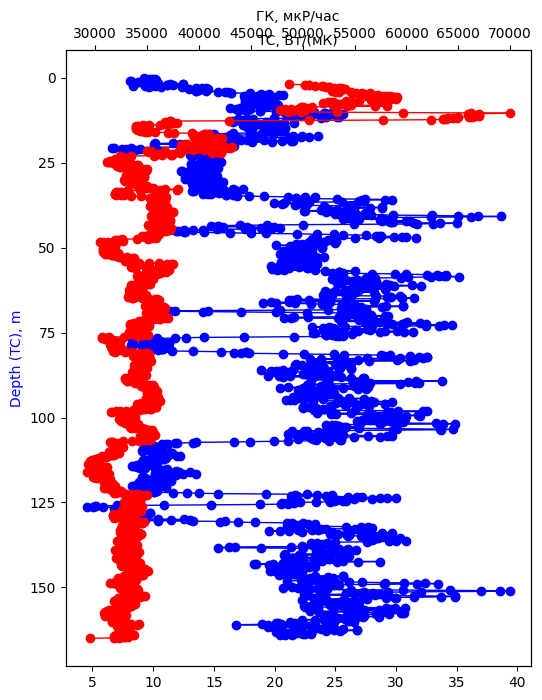

In [ ]:
# Data for the first plot
fig, ax1 = plt.subplots(figsize=(6, 8))
x1, y1 = data["ГК, мкР/час"], data["Глубина (ГК),м"]
ax1.plot(x1, y1, 'b-', label='TC (Thermal Conductivity)', marker='o', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')
ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')

# Create a second x-axis for the second plot
ax2 = ax1.twiny()  # This creates a new x-axis that shares the y-axis with ax1
x2, y2 = data["ГГК-п имп/мин"], data["Глубина (ГГК-п), м"]
ax2.plot(x2, y2, 'r-', label='ГК (Gamma Ray)', marker='o', lw=1)
ax2.set_xlabel('ГК, мкР/час')

# Set y-axis label for the second plot (optional if you want separate y-axis labels)
ax2.set_ylabel('Глубина (ГК),м', color='r')
plt.show()

In [ ]:
X = data[["ГК, мкР/час", "Глубина (ГК),м", "ГГК-п имп/мин", "Глубина (ГГК-п), м"]]
n = len(X)

In [ ]:
# Normalization of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_name = X.select_dtypes(include='float64')
X[list(columns_name)] = scaler.fit_transform(X[list(columns_name)])

<ipython-input-13-40c11b84dd77>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[list(columns_name)] = scaler.fit_transform(X[list(columns_name)])


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np

# Parameters
max_features = 2
n_estimators = 10
min_samples_split = 6

# Create the ExtraTreesRegressor object with specified parameters
etr = ExtraTreesRegressor(max_features=max_features, n_estimators=n_estimators, min_samples_split=min_samples_split, random_state=0xC0FFEE)

# Assuming X_train and y_train are defined and contain the training data
etr.fit(X_train, y_train)  # Fit the model with training data

# Assuming X contains the new data you want to predict
y_pred = etr.predict(X)  # Make predictions on new data

NotFittedError: This ExtraTreesRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### With Lithology

In [ ]:
X = result_new.drop('TC Value', axis=1)
y = result_new["TC Value"]
n = len(X)

In [ ]:
X.head()

Common Depth Lithology  ГК Value  ГГК-п Value
0          37.1    Гнейсы     21.82     35620.00
1          38.2    Гнейсы     28.83     36133.33
2          38.6    Гнейсы     24.24     35565.00
3          38.7    Гнейсы     24.42     35685.00
4          39.2    Гнейсы     22.39     36366.67

### Categorical to label encoding and drop columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_clmn = X.select_dtypes(include='object').columns
# Apply Label Encoding to each categorical column
for col in categorical_clmn:
    X[col] = LabelEncoder().fit_transform(X[col])

<Axes: >

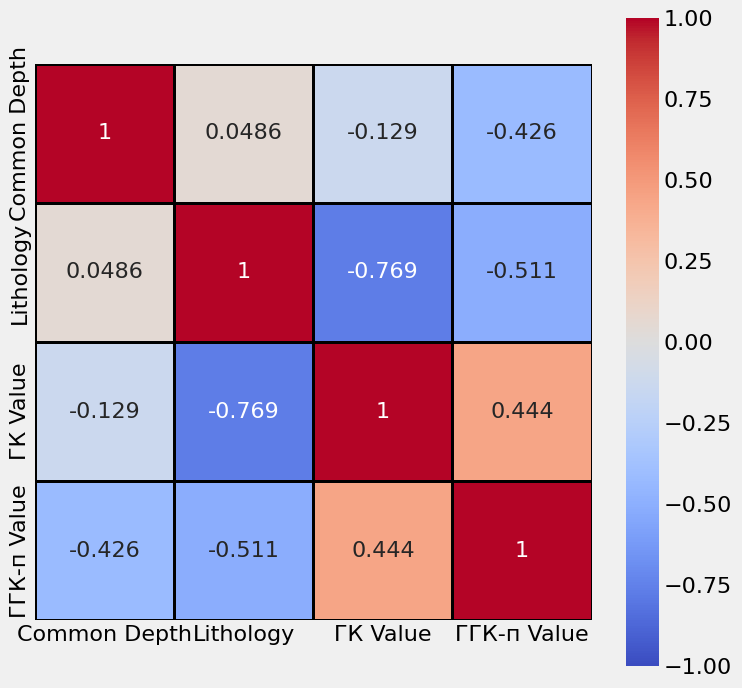

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(X.corr(),fmt = '.3g', square=True, annot = True,
            vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',
            linewidths=1, linecolor='black')

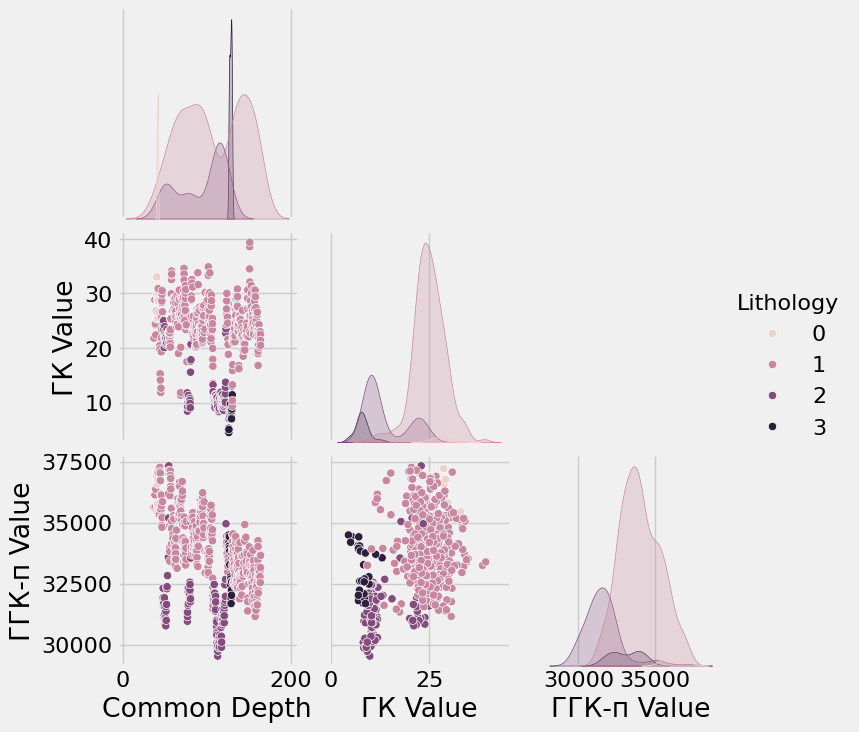

In [ ]:
sns.pairplot(data=X,hue='Lithology', corner=True)

In [ ]:
X.columns

Index(['Common Depth', 'Lithology', 'ГК Value', 'ГГК-п Value'], dtype='object')

In [ ]:
# Normalization of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_name = X.select_dtypes(include='float64')
X_numerical = X[['Common Depth', 'ГК Value', 'ГГК-п Value']]
X[list(columns_name)] = scaler.fit_transform(X_numerical[list(columns_name)])

In [ ]:
X

Common Depth  Lithology  ГК Value  ГГК-п Value
0        0.000000          1  0.496411     0.781270
1        0.008668          1  0.697674     0.847124
2        0.011820          1  0.565891     0.774214
3        0.012608          1  0.571059     0.789609
4        0.016548          1  0.512776     0.877058
..            ...        ...       ...          ...
545      0.994484          1  0.474304     0.416934
546      0.997636          1  0.530003     0.386145
547      0.998424          1  0.515935     0.465042
548      0.999212          1  0.484640     0.534317
549      1.000000          1  0.458226     0.528971

[550 rows x 4 columns]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=int(n*0.15), random_state=0xC0FFEE)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=int(n*0.15), random_state=0xC0FFEE)

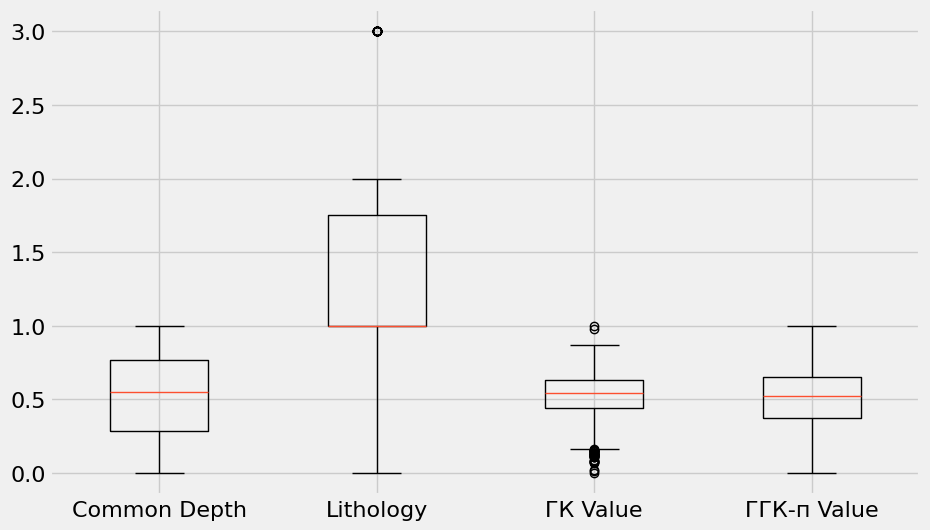

RandomForestRegressor:
Train mse: 0.02
Train R^2: 0.88
Validation: 0.04
Validation R^2: 0.46
Test: 0.03
Test  R^2: 0.76
{'max_features': 2, 'min_samples_split': 8, 'n_estimators': 10} 

ExtraTreesRegressor:
Train mse: 0.01
Train R^2: 0.91
Validation: 0.04
Validation R^2: 0.41
Test: 0.03
Test  R^2: 0.69
{'max_features': 3, 'min_samples_split': 6, 'n_estimators': 4} 

XGBRegressor:
Train mse: 0.04
Train R^2: 0.68
Validation: 0.04
Validation R^2: 0.39
Test: 0.03
Test  R^2: 0.65
{'learning_rate': 0.5025, 'max_depth': 1, 'n_estimators': 27} 

LinearRegression:
Train mse: 0.08
Train R^2: 0.44
Validation: 0.06
Validation R^2: -0.18
Test: 0.04
Test  R^2: 0.19
{} 

Ridge:
Train mse: 0.08
Train R^2: 0.44
Validation: 0.06
Validation R^2: -0.19
Test: 0.04
Test  R^2: 0.17
{} 

KNeighborsRegressor:
Train mse: 0.03
Train R^2: 0.79
Validation: 0.05
Validation R^2: 0.35
Test: 0.03
Test  R^2: 0.75
{} 

DecisionTreeRegressor:
Train mse: 0.0
Train R^2: 1.0
Validation: 0.05
Validation R^2: 0.55
Test: 0.03


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

RMSE_validation, RMSE_test = [], []
R2_validation, R2_test = [], []
model_name = []

plt.figure(figsize=(10, 6))

# Assuming X_train is defined and is a DataFrame
data = [X_train[i] for i in X_train.columns]

plt.boxplot(data, labels=X_train.columns)
plt.show()

models_list = [
    RandomForestRegressor(random_state=0xC0FFEE),
    ExtraTreesRegressor(random_state=0xC0FFEE),
    xgb.XGBRegressor(random_state=0xC0FFEE),
    LinearRegression(),
    Ridge(),
    KNeighborsRegressor(),
    DecisionTreeRegressor()
]

# names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
#          'K Neighbors Regressor', 'Decision Tree Regressor',
#          'Random Forest Regressor', 'Gradient Boosting Regressor',
#          'Adaboost Regressor']
# models = [LinearRegression(), Ridge(), Lasso(),
#           KNeighborsRegressor(), DecisionTreeRegressor(),
#           RandomForestRegressor(), GradientBoostingRegressor(),
#           AdaBoostRegressor()]

# Ensure that the range for max_features is valid
min_features = min(1, X_train.shape[1])
max_features = max(1, X_train.shape[1])

p_g1 = {
    'max_features': np.arange(min_features, max_features + 1),
    'n_estimators': np.linspace(2, 10, 4, dtype=int),
    'min_samples_split': np.arange(2, 10, 2),
}

p_g2 = {
    'max_features': np.arange(min_features, max_features + 1),
    'n_estimators': np.linspace(2, 10, 4, dtype=int),
    'min_samples_split': np.arange(2, 10, 2),
}

p_g3 = {
    "max_depth": np.arange(min_features, max_features + 1),
    'n_estimators': np.linspace(2, 40, 4, dtype=int),
    "learning_rate": np.linspace(0.005, 1 , 5),
}

p_g4 = {
}



params_list = [p_g1, p_g2, p_g3, p_g4, p_g4, p_g4, p_g4]

for reg, grid in zip(models_list, params_list):

    model_name.append(type(reg).__name__)

  # search for the optimal hyperparameters
    gs = GridSearchCV(reg, param_grid=grid, n_jobs=-1)
    gs.fit(X_val, y_val)
    best_reg = reg.__class__(**gs.best_params_)
    print(f'{type(reg).__name__}:')


  # use these values for our hyperparameters in the final calculation
    best_reg.fit(X_train, y_train)
    y_pred = best_reg.predict(X_train)
    print('Train mse:', mean_squared_error(y_pred, y_train).round(2))
    print('Train R^2:', r2_score(y_train, y_pred).round(2))

    y_pred = best_reg.predict(X_val)
    print('Validation:', mean_squared_error(y_pred, y_val).round(2))
    print('Validation R^2:', r2_score(y_pred, y_val).round(2))
    RMSE_validation.append(mean_squared_error(y_pred, y_val).round(2))
    R2_validation.append(r2_score(y_pred, y_val).round(2))

    y_pred = best_reg.predict(X_test)
    print('Test:', mean_squared_error(y_pred, y_test).round(2))
    print('Test  R^2:', r2_score(y_pred, y_test).round(2))
    RMSE_test.append(mean_squared_error(y_pred,y_test).round(2))
    R2_test.append(r2_score(y_pred,y_test).round(2))
    print(gs.best_params_, '\n')

In [ ]:
evaluation = pd.DataFrame({'Model': model_name,
                           'RMSE val': RMSE_validation,
                           'R2 val': R2_validation,
                           'RMSE test': RMSE_test,
                           'R2 test': R2_test})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


Model  RMSE val  R2 val  RMSE test  R2 test
0  RandomForestRegressor      0.04    0.46       0.03     0.76
1    ExtraTreesRegressor      0.04    0.41       0.03     0.69
2           XGBRegressor      0.04    0.39       0.03     0.65
3       LinearRegression      0.06   -0.18       0.04     0.19
4                  Ridge      0.06   -0.19       0.04     0.17
5    KNeighborsRegressor      0.05    0.35       0.03     0.75
6  DecisionTreeRegressor      0.05    0.55       0.03     0.75

In [ ]:

# Assuming X and y are defined and are your full dataset and targets
# Assuming X_train, X_val, y_train, y_val are subsets used for the grid search

# Define the parameter grid based on previous setup
param_grid = {
    'max_features': np.arange(min(1, X_train.shape[1]), max(1, X_train.shape[1]) + 1),
    'n_estimators': np.linspace(2, 10, 4, dtype=int),
    'min_samples_split': np.arange(2, 10, 2),
}

# Initialize the ExtraTreesRegressor with a fixed random state
# extra_trees = ExtraTreesRegressor(random_state=0xC0FFEE)
extra_trees = RandomForestRegressor(random_state=0xC0FFEE)


# Setup GridSearchCV
gs = GridSearchCV(extra_trees, param_grid=param_grid, n_jobs=-1)
gs.fit(X_val, y_val)  # Fit on validation set, or use another appropriate subset

# Extract the best parameters and fit on the entire dataset
best_params = gs.best_params_
best_extra_trees = ExtraTreesRegressor(**best_params, random_state=0xC0FFEE)
best_extra_trees.fit(X, y)  # Fit on the entire dataset
print(best_params)

# Predict the values of y
y_pred = best_extra_trees.predict(X)

{'max_features': 2, 'min_samples_split': 8, 'n_estimators': 10}


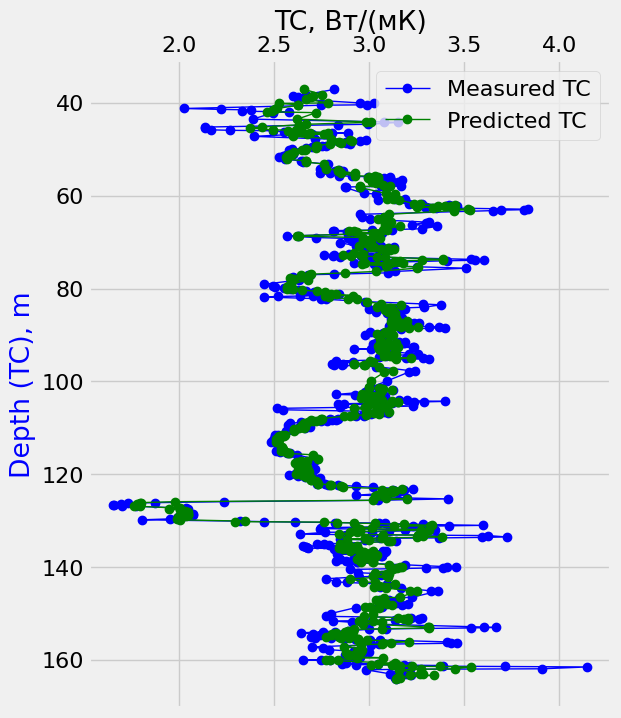

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 8))

# Data for the first plot
x1, y1 = merged_data["TC Value"], merged_data["Common Depth"]
ax1.plot(x1, y1, 'b-', label='Measured TC', marker='o', lw=1)
x1, y1 = y_pred, merged_data["Common Depth"]
ax1.plot(x1, y1, 'g-', label='Predicted TC', marker='o', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')

ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')
ax1.legend()

plt.show()

Train R^2: 0.52


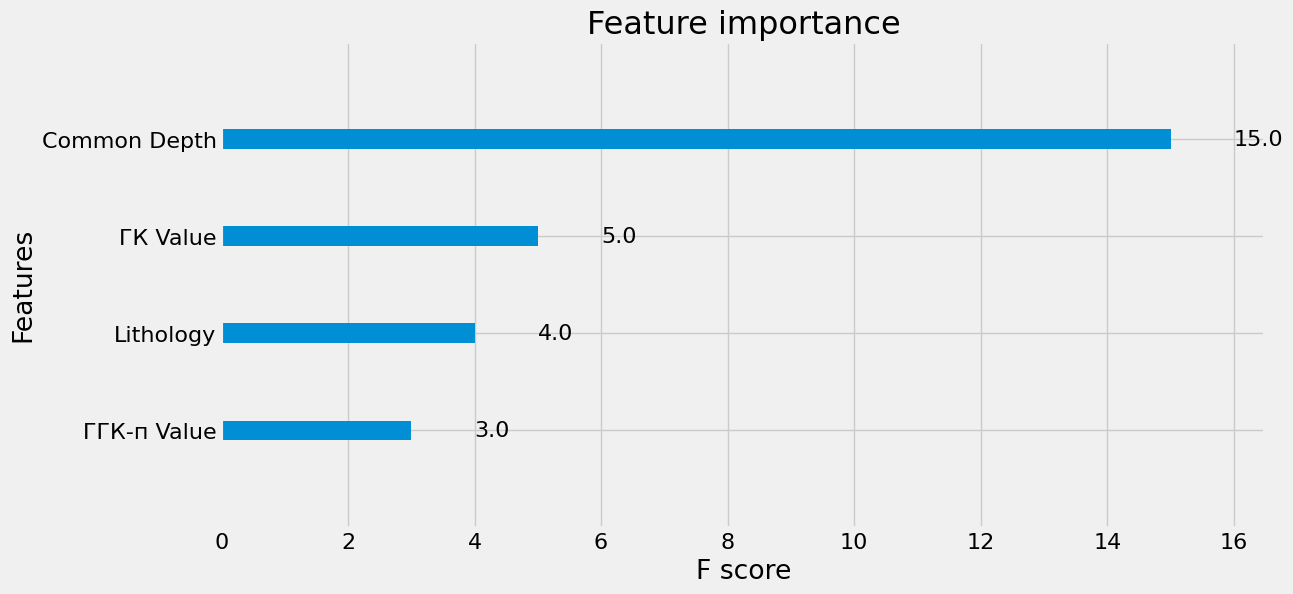

(1.5, 4.0)

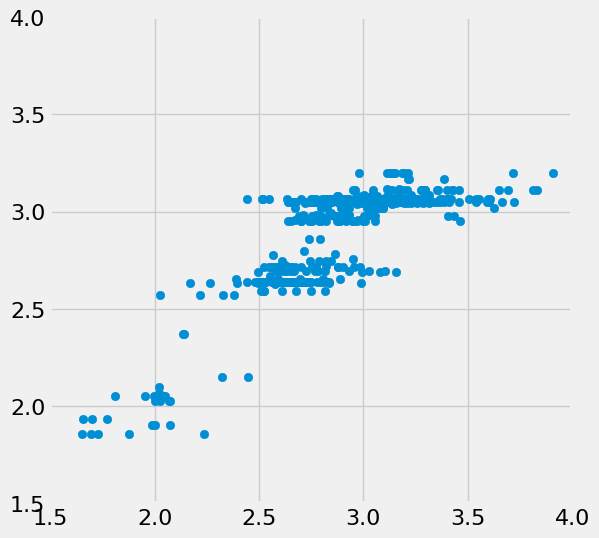

In [ ]:
best_xgb_regressor=xgb.XGBRegressor(
                          learning_rate = 0.5025,
                          n_estimators  = 27,
                          max_depth     = 1,
                          eval_metric='rmse')

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.12)
best_xgb_regressor.fit(X_train, y_train)
predictions = best_xgb_regressor.predict(X_test)
print('Train R^2:', r2_score(y_test, predictions).round(2))


# the feature importance for xgb!
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(best_xgb_regressor, max_num_features=4, ax=ax)
plt.show();


# prediction for the whole dataset
y_pred = best_xgb_regressor.predict(X)

fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(y, y_pred)
plt.xlim(1.5, 4)
plt.ylim(1.5, 4)

In [ ]:
path_to_ser = Path('/content/Rosatom/Data/Rosatom.xlsx')
data = pd.read_excel(path_to_ser, skiprows=0)

In [ ]:
new_data = data[["ГК, мкР/час", "Глубина (ГК),м", "ГГК-п имп/мин", "Глубина (ГГК-п), м"]]
new_data = new_data.dropna(subset=['ГК, мкР/час', 'ГГК-п имп/мин'])

In [ ]:
new_merged_data = pd.merge(
    new_data,
    new_data[['ГГК-п имп/мин', 'Глубина (ГГК-п), м']],
    left_on='Глубина (ГК),м',
    right_on='Глубина (ГГК-п), м',
    how='inner'
)

In [ ]:
new_merged_data

ГК, мкР/час  Глубина (ГК),м  ГГК-п имп/мин_x  Глубина (ГГК-п), м_x  \
0           11.41             1.9         52880.00                   3.7   
1           11.17             2.0         52813.33                   3.8   
2           11.66             2.1         53106.67                   3.9   
3           11.15             2.2         53235.00                   4.0   
4           10.11             2.3         53535.00                   4.1   
...           ...             ...              ...                   ...   
1609        25.39           162.8         32830.00                 164.6   
1610        24.24           162.9         32795.00                 164.7   
1611        23.08           163.0         32250.00                 164.8   
1612        21.38           163.1         31820.00                 164.9   
1613        20.15           163.2         29530.00                 165.0   

      ГГК-п имп/мин_y  Глубина (ГГК-п), м_y  
0            48640.00                   1.9  
1            50190.00                   2.0  
2            50580.00                   2.1  
3            50580.00                   2.2  
4            51220.00                   2.3  
...               ...                   ...  
1609         33106.67                 162.8  
1610         33320.00                 162.9  
1611         32930.00                 163.0  
1612         32990.00                 163.1  
1613         32525.00                 163.2  

[1614 rows x 6 columns]

In [ ]:
data_to_use = new_merged_data[['ГК, мкР/час',	'Глубина (ГК),м',	'ГГК-п имп/мин_x']]

In [ ]:
lithology = data[['Кровля', 'Подошва','Литология']].dropna()

In [ ]:
lithology

Кровля  Подошва    Литология
0      5.0     19.0       Гнейсы
1     19.1     21.5     Вогезиты
2     21.6     35.1     Долериты
3     35.2     40.0       Гнейсы
4     40.1     42.0     Вогезиты
5     42.1     47.7       Гнейсы
6     47.8     55.0     Долериты
7     55.1     76.5       Гнейсы
8     76.6     81.3     Долериты
9     81.4    107.3       Гнейсы
10   107.4    123.1     Долериты
11   123.2    125.8       Гнейсы
12   125.9    130.2  Спессартиты
13   130.3    165.0       Гнейсы

In [ ]:
data_to_use

ГК, мкР/час  Глубина (ГК),м  ГГК-п имп/мин_x
0           11.41             1.9         52880.00
1           11.17             2.0         52813.33
2           11.66             2.1         53106.67
3           11.15             2.2         53235.00
4           10.11             2.3         53535.00
...           ...             ...              ...
1609        25.39           162.8         32830.00
1610        24.24           162.9         32795.00
1611        23.08           163.0         32250.00
1612        21.38           163.1         31820.00
1613        20.15           163.2         29530.00

[1614 rows x 3 columns]

In [ ]:
data_to_use.rename(columns={
    'Глубина (ГК),м': 'Common Depth',
    'ГГК-п имп/мин_x': 'ГГК-п Value',
    'ГК, мкР/час': 'ГК Value'
}, inplace=True)

In [ ]:
data_copy = data_to_use.copy()

In [ ]:
data_copy

ГК Value  Common Depth  ГГК-п Value
0        11.41           1.9     52880.00
1        11.17           2.0     52813.33
2        11.66           2.1     53106.67
3        11.15           2.2     53235.00
4        10.11           2.3     53535.00
...        ...           ...          ...
1609     25.39         162.8     32830.00
1610     24.24         162.9     32795.00
1611     23.08         163.0     32250.00
1612     21.38         163.1     31820.00
1613     20.15         163.2     29530.00

[1614 rows x 3 columns]

In [ ]:
def lit_func(lithology, merged_data):

  corresponding_lit = pd.DataFrame(columns=['Common Depth', 'Lithology'])

  for index, row in merged_data.iterrows():
      common_depth = row['Common Depth']
      mask = (lithology['Кровля'] <= common_depth) & (lithology['Подошва'] >= common_depth)
      filtered_lithology = lithology[mask]
      # print(common_depth, filtered_lithology )

      # if not filtered_lithology.empty:

      for _, lit_row in filtered_lithology.iterrows():
          new_row = pd.DataFrame({
              'Common Depth': [common_depth],
              'Lithology': [lit_row['Литология']]
          })
          corresponding_lit = pd.concat([corresponding_lit, new_row], ignore_index=True)

  return corresponding_lit

In [ ]:
lit_func(lithology, data_to_use)

Common Depth Lithology
0              5.0    Гнейсы
1              5.1    Гнейсы
2              5.2    Гнейсы
3              5.3    Гнейсы
4              5.4    Гнейсы
...            ...       ...
1578         162.8    Гнейсы
1579         162.9    Гнейсы
1580         163.0    Гнейсы
1581         163.1    Гнейсы
1582         163.2    Гнейсы

[1583 rows x 2 columns]

In [ ]:
result_new_pr = pd.merge(
    lit_func(lithology, data_to_use),
    data_to_use,
    left_on='Common Depth',
    right_on='Common Depth',
    how='inner'
)

# merged_data.drop(columns=['Глубина (ГГК-п), м'], inplace=True)

In [ ]:
data_copy = result_new_pr

In [ ]:
depth_tc = result_new_pr.copy()

In [ ]:
result_new_pr

Common Depth Lithology  ГК Value  ГГК-п Value
0              5.0    Гнейсы     20.38     54695.00
1              5.1    Гнейсы     19.37     54126.67
2              5.2    Гнейсы     18.56     52950.00
3              5.3    Гнейсы     17.48     52640.00
4              5.4    Гнейсы     17.66     52453.33
...            ...       ...       ...          ...
1578         162.8    Гнейсы     25.39     32830.00
1579         162.9    Гнейсы     24.24     32795.00
1580         163.0    Гнейсы     23.08     32250.00
1581         163.1    Гнейсы     21.38     31820.00
1582         163.2    Гнейсы     20.15     29530.00

[1583 rows x 4 columns]

In [ ]:
X = result_new_pr
n = len(X)

In [ ]:
X.head()

Common Depth Lithology  ГК Value  ГГК-п Value
0           5.0    Гнейсы     20.38     54695.00
1           5.1    Гнейсы     19.37     54126.67
2           5.2    Гнейсы     18.56     52950.00
3           5.3    Гнейсы     17.48     52640.00
4           5.4    Гнейсы     17.66     52453.33

In [ ]:
categorical_clmn = X.select_dtypes(include='object').columns
# Apply Label Encoding to each categorical column
for col in categorical_clmn:
    X[col] = LabelEncoder().fit_transform(X[col])

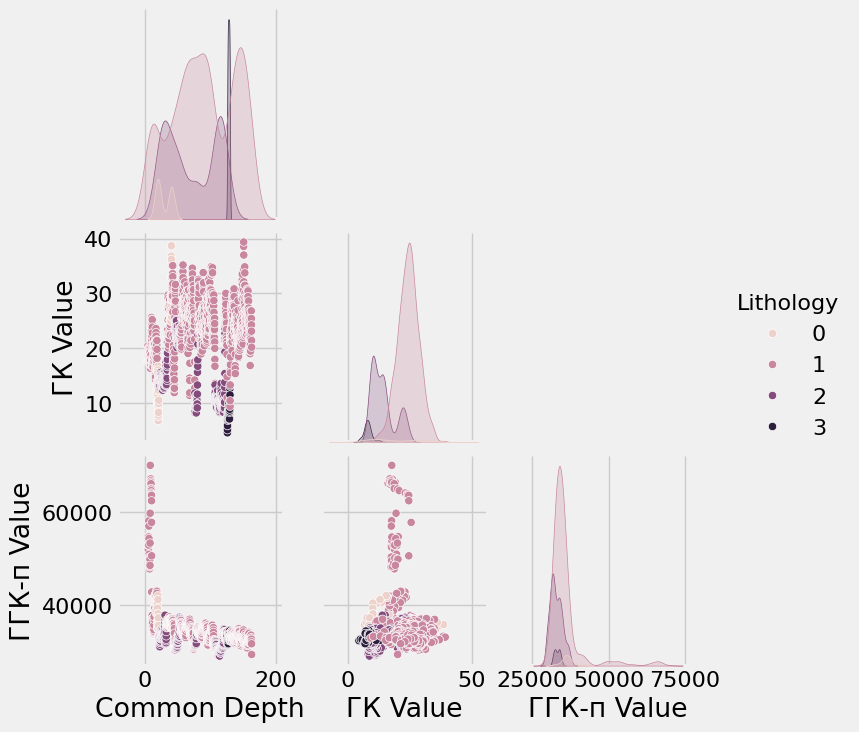

In [ ]:
sns.pairplot(data=X,hue='Lithology', corner=True)

In [ ]:
X.columns

Index(['Common Depth', 'Lithology', 'ГК Value', 'ГГК-п Value'], dtype='object')

In [ ]:
# Normalization of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_name = X.select_dtypes(include='float64')
X_numerical = X[['Common Depth', 'ГК Value', 'ГГК-п Value']]
X[list(columns_name)] = scaler.fit_transform(X_numerical[list(columns_name)])

In [ ]:
X

Common Depth  Lithology  ГК Value  ГГК-п Value
0         0.000000          1  0.455067     0.625992
1         0.000632          1  0.426069     0.612043
2         0.001264          1  0.402814     0.583163
3         0.001896          1  0.371806     0.575554
4         0.002528          1  0.376974     0.570973
...            ...        ...       ...          ...
1578      0.997472          1  0.598909     0.089340
1579      0.998104          1  0.565891     0.088481
1580      0.998736          1  0.532587     0.075104
1581      0.999368          1  0.483778     0.064550
1582      1.000000          1  0.448464     0.008345

[1583 rows x 4 columns]

In [ ]:
y_pred_new = best_extra_trees.predict(X)

In [ ]:
data_to_use = new_merged_data[['ГК, мкР/час',	'Глубина (ГК),м',	'ГГК-п имп/мин_x']]

In [ ]:
data_to_use.columns

Index(['ГК, мкР/час', 'Глубина (ГК),м', 'ГГК-п имп/мин_x'], dtype='object')

In [ ]:
path_to_ser = Path('/content/Rosatom/Data/Rosatom.xlsx')
data = pd.read_excel(path_to_ser, skiprows=0)

In [ ]:
y = data['TC, Вт/(мК)']
yy = data["Depth (TC), m"]

In [ ]:
df_new = pd.DataFrame()
n_average = 1000
df_new['TC avg'] = data['TC, Вт/(мК)'].rolling(window=n_average).mean()
df_new['Depth TC avg'] = data["Depth (TC), m"].rolling(window=n_average).mean()

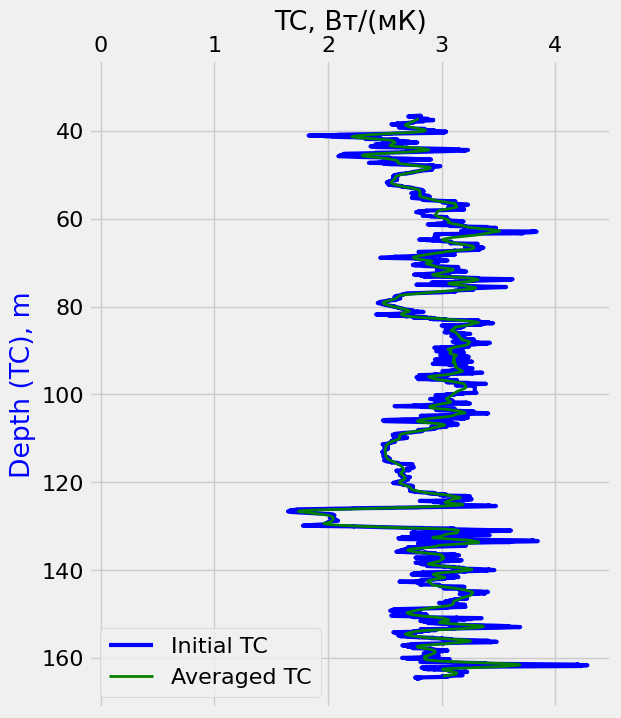

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 8))

data = merged_data

# Data for the first plot
x1, y1 = y, yy
ax1.plot(x1, y1, 'b-', label='Initial TC', lw=3)

x1, y1 = df_new['TC avg'], df_new['Depth TC avg']
ax1.plot(x1, y1, 'g-', label='Averaged TC', lw=2)
ax1.set_ylabel('Depth (TC), m', color='b')

ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')
ax1.legend()

plt.show()

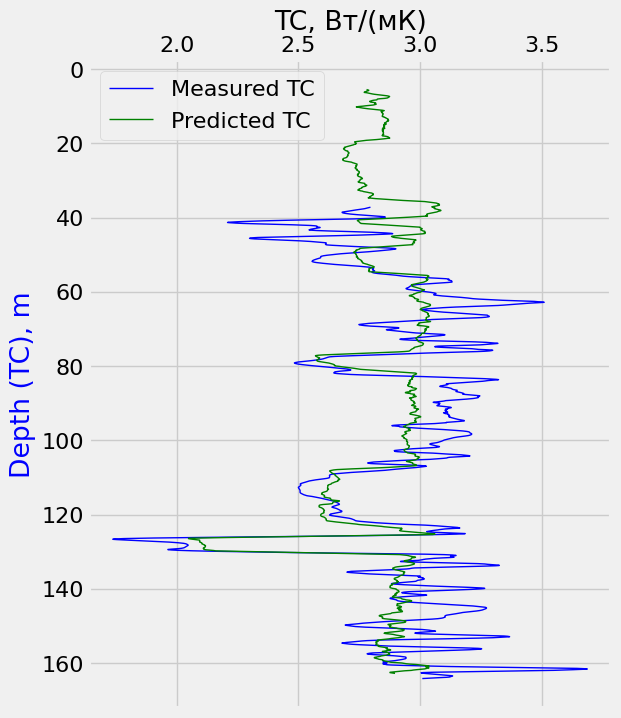

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 8))

data = merged_data

# Data for the first plot
x1, y1 = y, yy
x1, y1 = df_new['TC avg'], df_new['Depth TC avg']
ax1.plot(x1, y1, 'b-', label='Measured TC', lw=1)

x2 = pd.DataFrame(y_pred_new).rolling(window=10).mean()
y2 = depth_tc["Common Depth"].rolling(window=10).mean()

# x1, y1 = y_pred_new , depth_tc["Common Depth"]
ax1.plot(x2, y2, 'g-', label='Predicted TC', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')

ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')
ax1.legend()

plt.show()

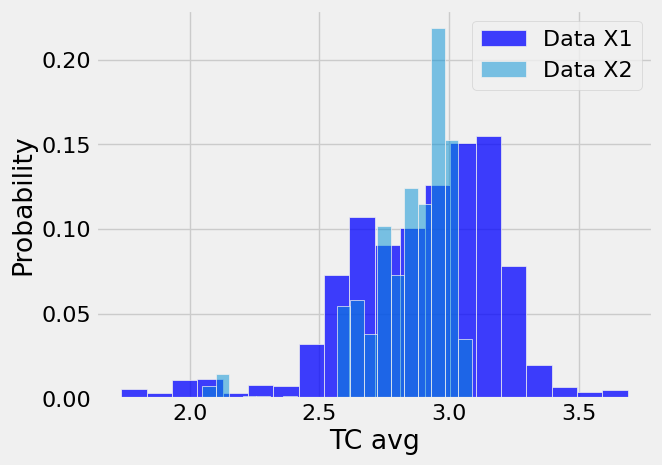

In [ ]:
# Create a figure and a single axes object
fig, ax = plt.subplots()

# Plot both histograms on the same Axes
sns.histplot(data=x1, stat="probability", bins=20, ax=ax, color="blue", label="Data X1")
sns.histplot(data=x2, stat="probability", bins=20, ax=ax, color="red", label="Data X2")

# Add legend to distinguish the histograms
ax.legend()

# Show the plot
plt.show()